In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import sys  
sys.path.insert(0, '../../')
import RadonDF_Handler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
D003_df = pd.read_csv('./../../../../../Data/SensorsData/interpolated_D003_data.csv')
D003_df = pd.DataFrame(D003_df)
D003_df['time'] =  pd.to_datetime(D003_df['time'], format='%Y-%m-%d %H:%M:%S')
D003_df.index = D003_df['time']
D003_df = D003_df.drop(['time'],axis = 1)

In [3]:
def df_to_X_y(df,hoursToPredict, windowSize):
        hoursToPredict = hoursToPredict - 1
        df_as_np = df.to_numpy() # converts the dataframe to a numpy array
        #Initialized  arrays to append X and Y values 
        X = []
        y = []
        for i in range(len(df_as_np)):
            if((i + hoursToPredict + windowSize)< len(df_as_np)):
                #Takes values from i to i + win size
                row =  [r for r in df_as_np[i:i+windowSize]]
                X.append(row)
                label = df_as_np[i + hoursToPredict + windowSize ][1]
                y.append(label)
        return np.array(X), np.array(y)

In [4]:
def DataHandler(hoursToPredict,windowSize):
    X1, y1 = df_to_X_y(D003_df,hoursToPredict,windowSize)

    return X1, y1

In [5]:
plt.style.use('seaborn')

In [6]:
def Trainer(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        model = Sequential()
        model.add(InputLayer((windowSize, 5)))
        model.add(LSTM(64))
        model.add(Dense(8, 'relu'))
        model.add(Dense(1, 'linear'))

        model.summary()
        X, y = DataHandler(time,windowSize)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle= False) 

        X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
        
        cp1= ModelCheckpoint(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/", save_best_only=True)
        model.compile(loss=MeanSquaredError(), 
                   optimizer=Adam(learning_rate=0.0001), 
                   metrics=[MeanAbsoluteError()])
    
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])
        windowSize += 1
        print()
        print("-----------------------------------------------------------------------------------------------------------")
        print()

In [7]:
def modelsEvaluator(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        X, y = DataHandler(time,windowSize)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
        
        print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
       
        print("Loading: "+ str(time)+"H_Forecast/" + str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model = load_model(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model.evaluate(X_test,y_test)
        
        test_predictions = model.predict(X_test).flatten()
        test_results = pd.DataFrame(data={'Test Predictions '+str(time) + ' hour model':test_predictions, 'Actuals':y_test})
        
        windowSize += 1

In [47]:
%%time

Trainer(1,6,12)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 11ms/step - loss: 252285.4844 - mean_absolute_error: 412.4823 - val_loss: 367718.1250 - val_mean_absolute_error: 492.9907
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 11ms/step - loss: 249277.5000 - mean_absolute_error: 408.7805 - val_loss: 362426.6562 - val_mean_absolute_error: 487.6078
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 9ms/step - loss: 244465.4688 - mean_absolute_error: 403.1420 - val_loss: 356544.9062 - val_mean_absolute_error: 481.8017
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 239948.8281 - mean_absolute_error: 397.8508 - val_loss: 351406.5000 - val_mean_absolute_error: 476.5993
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 9ms/step - loss: 235411.9062 - mean_absolute_error: 392.5508 - val_loss: 345546.2188 - val_mean_absolute_error: 470.8004
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 230445.5469 - mean_absolute_error: 386.9333 - val_loss: 339522.1562 - val_mean_absolute_error: 464.979319 - mean_absolute_error
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 225494.9219 - mean_absolute_error: 381.3344 - val_loss: 332966.4062 - val_mean_absolute_error: 458.6344
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 219856.1094 - mean_absolute_error: 374.8796 - val_loss: 326157.8438 - val_mean_absolute_error: 452.0848
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 214233.5938 - mean_absolute_error: 368.4643 - val_loss: 319299.1250 - val_mean_absolute_error: 445.5137
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 208541.7188 - mean_absolute_error: 361.9219 - val_loss: 312239.0625 - val_mean_absolute_error: 438.7157
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 202712.1875 - mean_absolute_error: 355.2162 - val_loss: 304985.0625 - val_mean_absolute_error: 431.7234
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 196743.6562 - mean_absolute_error: 348.3301 - val_loss: 297534.5938 - val_mean_absolute_error: 424.6329
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 190655.8125 - mean_absolute_error: 341.3480 - val_loss: 289906.6562 - val_mean_absolute_error: 417.1570
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 184467.9531 - mean_absolute_error: 334.0190 - val_loss: 282133.9375 - val_mean_absolute_error: 409.4132
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 178200.2969 - mean_absolute_error: 326.4347 - val_loss: 274253.6875 - val_mean_absolute_error: 401.5013
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 171873.4375 - mean_absolute_error: 318.8557 - val_loss: 266281.3750 - val_mean_absolute_error: 393.4679
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 165506.8750 - mean_absolute_error: 311.0865 - val_loss: 258209.7812 - val_mean_absolute_error: 385.1603
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 158837.2812 - mean_absolute_error: 302.7194 - val_loss: 249608.5625 - val_mean_absolute_error: 375.9174
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 152288.8281 - mean_absolute_error: 294.1311 - val_loss: 241303.6562 - val_mean_absolute_error: 367.1781
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 145834.2344 - mean_absolute_error: 285.8715 - val_loss: 233053.2031 - val_mean_absolute_error: 358.1693
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 139422.9531 - mean_absolute_error: 277.2704 - val_loss: 224804.3438 - val_mean_absolute_error: 349.1895
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 133063.0000 - mean_absolute_error: 268.7697 - val_loss: 216592.2656 - val_mean_absolute_error: 339.7234
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 126776.5156 - mean_absolute_error: 259.9960 - val_loss: 208417.7188 - val_mean_absolute_error: 330.2833
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 120388.6875 - mean_absolute_error: 250.9777 - val_loss: 199936.1875 - val_mean_absolute_error: 320.2238
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 114146.8438 - mean_absolute_error: 241.9967 - val_loss: 191780.2656 - val_mean_absolute_error: 310.5865
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 108094.9688 - mean_absolute_error: 233.3680 - val_loss: 183763.5000 - val_mean_absolute_error: 301.0195
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 102196.0000 - mean_absolute_error: 224.6912 - val_loss: 175898.5781 - val_mean_absolute_error: 291.6274
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 96450.3203 - mean_absolute_error: 216.2039 - val_loss: 168186.9531 - val_mean_absolute_error: 282.1703
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 9ms/step - loss: 90873.9688 - mean_absolute_error: 207.6734 - val_loss: 160627.9062 - val_mean_absolute_error: 272.8782
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 85450.9219 - mean_absolute_error: 199.2758 - val_loss: 153224.7812 - val_mean_absolute_error: 263.5425
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 80207.2188 - mean_absolute_error: 191.0089 - val_loss: 145976.5000 - val_mean_absolute_error: 254.5128
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 75167.3906 - mean_absolute_error: 182.9823 - val_loss: 138957.1875 - val_mean_absolute_error: 245.8111
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 70332.2734 - mean_absolute_error: 175.2849 - val_loss: 132146.1719 - val_mean_absolute_error: 237.1763
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 65698.8906 - mean_absolute_error: 167.6443 - val_loss: 125538.2422 - val_mean_absolute_error: 228.7187
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 61268.6445 - mean_absolute_error: 160.2370 - val_loss: 119135.0078 - val_mean_absolute_error: 220.4356
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 56998.1406 - mean_absolute_error: 153.0251 - val_loss: 112804.4062 - val_mean_absolute_error: 212.0483
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 9ms/step - loss: 52923.5469 - mean_absolute_error: 145.8793 - val_loss: 106809.5078 - val_mean_absolute_error: 204.1237
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 49100.7891 - mean_absolute_error: 139.0773 - val_loss: 101051.1328 - val_mean_absolute_error: 196.1314
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 12ms/step - loss: 45494.3750 - mean_absolute_error: 132.5059 - val_loss: 95541.0938 - val_mean_absolute_error: 188.6577
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 42101.9531 - mean_absolute_error: 126.0590 - val_loss: 90255.8828 - val_mean_absolute_error: 181.3367
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 38933.1055 - mean_absolute_error: 120.0134 - val_loss: 85201.6406 - val_mean_absolute_error: 174.2341
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 35989.9844 - mean_absolute_error: 114.4528 - val_loss: 80423.9375 - val_mean_absolute_error: 167.4413
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 33245.6016 - mean_absolute_error: 108.9810 - val_loss: 75864.8203 - val_mean_absolute_error: 161.1829
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 30700.1133 - mean_absolute_error: 103.8917 - val_loss: 71502.8750 - val_mean_absolute_error: 154.8704
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 28341.5098 - mean_absolute_error: 98.9877 - val_loss: 67400.3672 - val_mean_absolute_error: 149.1954
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 26170.5508 - mean_absolute_error: 94.4110 - val_loss: 63510.6992 - val_mean_absolute_error: 143.4953
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 24176.6270 - mean_absolute_error: 90.1787 - val_loss: 59819.2266 - val_mean_absolute_error: 138.2557
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 22352.3828 - mean_absolute_error: 86.3372 - val_loss: 56361.2383 - val_mean_absolute_error: 133.3891
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 10ms/step - loss: 20674.8125 - mean_absolute_error: 82.7376 - val_loss: 53069.6289 - val_mean_absolute_error: 128.6210
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 19161.0195 - mean_absolute_error: 79.3441 - val_loss: 50005.8281 - val_mean_absolute_error: 123.8661
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 17783.9941 - mean_absolute_error: 76.2943 - val_loss: 47142.0234 - val_mean_absolute_error: 119.4433
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 16533.1289 - mean_absolute_error: 73.4890 - val_loss: 44441.8398 - val_mean_absolute_error: 115.3844
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 15399.9482 - mean_absolute_error: 70.8439 - val_loss: 41972.3359 - val_mean_absolute_error: 111.7665
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 14388.3262 - mean_absolute_error: 68.5401 - val_loss: 39579.8789 - val_mean_absolute_error: 107.7334
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 13470.7354 - mean_absolute_error: 66.4671 - val_loss: 37561.9766 - val_mean_absolute_error: 104.8642
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 12644.2617 - mean_absolute_error: 64.5668 - val_loss: 35359.9414 - val_mean_absolute_error: 101.4786
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 11893.3486 - mean_absolute_error: 62.8973 - val_loss: 33499.4844 - val_mean_absolute_error: 98.5237
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 11212.4834 - mean_absolute_error: 61.2505 - val_loss: 31651.8926 - val_mean_absolute_error: 95.7026
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 10ms/step - loss: 10595.7354 - mean_absolute_error: 59.7134 - val_loss: 30009.0156 - val_mean_absolute_error: 93.0171
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 10037.9941 - mean_absolute_error: 58.1616 - val_loss: 28432.8496 - val_mean_absolute_error: 90.2624
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 9524.8945 - mean_absolute_error: 56.8134 - val_loss: 26935.4473 - val_mean_absolute_error: 87.7953
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 9068.0195 - mean_absolute_error: 55.6972 - val_loss: 25640.8301 - val_mean_absolute_error: 86.2371
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 8661.9678 - mean_absolute_error: 54.7370 - val_loss: 24400.3379 - val_mean_absolute_error: 83.9453
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 8294.2930 - mean_absolute_error: 53.7004 - val_loss: 23249.7637 - val_mean_absolute_error: 82.0023
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 7987.2168 - mean_absolute_error: 52.9832 - val_loss: 22144.9043 - val_mean_absolute_error: 80.0975
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 7672.5649 - mean_absolute_error: 52.1294 - val_loss: 21257.4434 - val_mean_absolute_error: 78.9933
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 7418.7744 - mean_absolute_error: 51.6039 - val_loss: 20199.0762 - val_mean_absolute_error: 77.1834
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 7182.8691 - mean_absolute_error: 50.9518 - val_loss: 19419.4688 - val_mean_absolute_error: 76.0312
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 6954.1182 - mean_absolute_error: 50.3776 - val_loss: 18584.3223 - val_mean_absolute_error: 74.6231
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 6767.8174 - mean_absolute_error: 50.0549 - val_loss: 17841.5273 - val_mean_absolute_error: 73.1555
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 6591.7324 - mean_absolute_error: 49.5773 - val_loss: 17215.4238 - val_mean_absolute_error: 72.3599
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 6445.0449 - mean_absolute_error: 49.3059 - val_loss: 16545.4531 - val_mean_absolute_error: 71.0350
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 6290.3467 - mean_absolute_error: 48.8866 - val_loss: 15965.2549 - val_mean_absolute_error: 70.3100
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 6168.0952 - mean_absolute_error: 48.5098 - val_loss: 15455.4102 - val_mean_absolute_error: 69.34042969 - mean_absolute_err
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 6056.7192 - mean_absolute_error: 48.3335 - val_loss: 14993.7354 - val_mean_absolute_error: 68.4185
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 5944.8193 - mean_absolute_error: 47.9830 - val_loss: 14572.9131 - val_mean_absolute_error: 67.8789
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 5841.3511 - mean_absolute_error: 47.7813 - val_loss: 14130.0645 - val_mean_absolute_error: 67.3290
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 4s 10ms/step - loss: 5769.1719 - mean_absolute_error: 47.5797 - val_loss: 13767.3975 - val_mean_absolute_error: 66.9565
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 5670.0176 - mean_absolute_error: 47.3480 - val_loss: 13382.9189 - val_mean_absolute_error: 66.0121
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 5604.4297 - mean_absolute_error: 47.1571 - val_loss: 13045.2939 - val_mean_absolute_error: 65.4444
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 5542.7192 - mean_absolute_error: 47.0945 - val_loss: 12753.0625 - val_mean_absolute_error: 64.7287
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 5478.9980 - mean_absolute_error: 46.9007 - val_loss: 12455.1133 - val_mean_absolute_error: 64.14325619.8135 -
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 5432.2686 - mean_absolute_error: 46.8162 - val_loss: 12252.1250 - val_mean_absolute_error: 64.2006
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 5389.7012 - mean_absolute_error: 46.7154 - val_loss: 11943.6689 - val_mean_absolute_error: 63.8045
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 5323.4995 - mean_absolute_error: 46.5993 - val_loss: 11680.7686 - val_mean_absolute_error: 62.8159- mean_absolu
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 5284.9590 - mean_absolute_error: 46.5175 - val_loss: 11530.0156 - val_mean_absolute_error: 62.4891
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 5242.8433 - mean_absolute_error: 46.2894 - val_loss: 11360.9199 - val_mean_absolute_error: 62.6052
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 5223.4512 - mean_absolute_error: 46.2402 - val_loss: 11075.7393 - val_mean_absolute_error: 61.6775
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 4s 9ms/step - loss: 5183.9814 - mean_absolute_error: 46.2031 - val_loss: 10995.3184 - val_mean_absolute_error: 61.7331
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 5143.3516 - mean_absolute_error: 45.8945 - val_loss: 10868.6182 - val_mean_absolute_error: 61.4374
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 5117.4766 - mean_absolute_error: 45.9206 - val_loss: 10675.0996 - val_mean_absolute_error: 61.7748
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 5087.6245 - mean_absolute_error: 45.7848 - val_loss: 10491.0303 - val_mean_absolute_error: 60.9706
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 5070.2144 - mean_absolute_error: 45.7217 - val_loss: 10401.1943 - val_mean_absolute_error: 60.9982
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 5032.7134 - mean_absolute_error: 45.6517 - val_loss: 10226.0020 - val_mean_absolute_error: 60.6073
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 5006.3760 - mean_absolute_error: 45.6519 - val_loss: 10111.5010 - val_mean_absolute_error: 60.4495
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 7ms/step - loss: 5006.8535 - mean_absolute_error: 45.5533 - val_loss: 10000.8506 - val_mean_absolute_error: 60.1479
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 4984.8354 - mean_absolute_error: 45.5059 - val_loss: 9919.7686 - val_mean_absolute_error: 59.9595
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 4959.3379 - mean_absolute_error: 45.4763 - val_loss: 9814.7148 - val_mean_absolute_error: 60.0645
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 4929.9595 - mean_absolute_error: 45.3005 - val_loss: 9674.6172 - val_mean_absolute_error: 59.1013
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 4927.7085 - mean_absolute_error: 45.3085 - val_loss: 9672.4834 - val_mean_absolute_error: 59.8565
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 10ms/step - loss: 252127.7188 - mean_absolute_error: 412.3022 - val_loss: 367169.2500 - val_mean_absolute_error: 492.3510
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 246760.3594 - mean_absolute_error: 405.5889 - val_loss: 356762.4062 - val_mean_absolute_error: 481.7819
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 237747.0625 - mean_absolute_error: 395.1846 - val_loss: 345670.4062 - val_mean_absolute_error: 470.9249
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 229085.8281 - mean_absolute_error: 385.3419 - val_loss: 336136.9062 - val_mean_absolute_error: 461.6489
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 220856.9531 - mean_absolute_error: 376.0235 - val_loss: 325238.5938 - val_mean_absolute_error: 451.1052
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 211268.8906 - mean_absolute_error: 365.0336 - val_loss: 313208.4062 - val_mean_absolute_error: 439.5138
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 9ms/step - loss: 201189.2500 - mean_absolute_error: 353.4331 - val_loss: 300757.8750 - val_mean_absolute_error: 427.5416
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 12ms/step - loss: 191214.5469 - mean_absolute_error: 341.7469 - val_loss: 288459.1875 - val_mean_absolute_error: 415.4388
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 12ms/step - loss: 181219.3281 - mean_absolute_error: 329.8657 - val_loss: 275938.6250 - val_mean_absolute_error: 402.6824
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 171143.3281 - mean_absolute_error: 317.3402 - val_loss: 263275.7188 - val_mean_absolute_error: 389.9019: 0s - loss: 172139.2188 -
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 161058.6406 - mean_absolute_error: 304.8827 - val_loss: 250543.3438 - val_mean_absolute_error: 376.4621
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 151038.5469 - mean_absolute_error: 292.1344 - val_loss: 237828.0469 - val_mean_absolute_error: 362.7057
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 141123.4219 - mean_absolute_error: 278.9781 - val_loss: 225145.4375 - val_mean_absolute_error: 348.8168
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 131400.7344 - mean_absolute_error: 265.8879 - val_loss: 212629.5625 - val_mean_absolute_error: 334.7122
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 9ms/step - loss: 121907.9219 - mean_absolute_error: 252.8778 - val_loss: 200342.9844 - val_mean_absolute_error: 320.5167
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 112720.5469 - mean_absolute_error: 239.9831 - val_loss: 188338.7500 - val_mean_absolute_error: 306.4449
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 103857.8203 - mean_absolute_error: 227.2952 - val_loss: 176620.0156 - val_mean_absolute_error: 292.5237
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 95373.5234 - mean_absolute_error: 214.9071 - val_loss: 165284.9062 - val_mean_absolute_error: 278.7813
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 87308.9766 - mean_absolute_error: 202.6376 - val_loss: 154361.3438 - val_mean_absolute_error: 264.9910
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 79626.6016 - mean_absolute_error: 190.4964 - val_loss: 143852.3594 - val_mean_absolute_error: 251.9924
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 72407.2734 - mean_absolute_error: 179.0868 - val_loss: 133820.5469 - val_mean_absolute_error: 239.5029
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 65653.8047 - mean_absolute_error: 168.0181 - val_loss: 124321.3438 - val_mean_absolute_error: 227.5383
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 59370.4414 - mean_absolute_error: 157.5386 - val_loss: 115257.7734 - val_mean_absolute_error: 215.7018
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 53536.1719 - mean_absolute_error: 147.3959 - val_loss: 106728.6953 - val_mean_absolute_error: 204.1796
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 47990.8281 - mean_absolute_error: 137.2737 - val_loss: 97200.6406 - val_mean_absolute_error: 191.5345
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 42317.7422 - mean_absolute_error: 127.0580 - val_loss: 89618.0625 - val_mean_absolute_error: 181.0590
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 37870.5156 - mean_absolute_error: 118.6894 - val_loss: 82653.2500 - val_mean_absolute_error: 171.6457
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 11ms/step - loss: 33876.5781 - mean_absolute_error: 110.8509 - val_loss: 76142.0391 - val_mean_absolute_error: 162.4747
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 11ms/step - loss: 30312.9648 - mean_absolute_error: 103.7008 - val_loss: 70066.6172 - val_mean_absolute_error: 153.6677
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 27134.9824 - mean_absolute_error: 96.9980 - val_loss: 64514.3359 - val_mean_absolute_error: 145.7459
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 24299.9531 - mean_absolute_error: 90.8489 - val_loss: 59416.8633 - val_mean_absolute_error: 138.2815
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 9ms/step - loss: 21808.6523 - mean_absolute_error: 85.2994 - val_loss: 54699.8438 - val_mean_absolute_error: 131.3370
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 19635.8359 - mean_absolute_error: 80.7407 - val_loss: 50432.0547 - val_mean_absolute_error: 125.4102
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 12ms/step - loss: 17738.9551 - mean_absolute_error: 76.6522 - val_loss: 46569.8789 - val_mean_absolute_error: 119.6170
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 12ms/step - loss: 16077.8740 - mean_absolute_error: 72.9971 - val_loss: 42999.6055 - val_mean_absolute_error: 114.2032
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 14646.1221 - mean_absolute_error: 69.9019 - val_loss: 39770.0469 - val_mean_absolute_error: 108.8979
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 13378.6221 - mean_absolute_error: 66.6620 - val_loss: 36792.9727 - val_mean_absolute_error: 103.8571
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 12264.5166 - mean_absolute_error: 63.9191 - val_loss: 34068.6328 - val_mean_absolute_error: 99.6957
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 11309.1660 - mean_absolute_error: 61.5691 - val_loss: 31595.4961 - val_mean_absolute_error: 96.1844
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 5s 12ms/step - loss: 10451.5928 - mean_absolute_error: 59.5310 - val_loss: 29394.4395 - val_mean_absolute_error: 92.4728
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 9ms/step - loss: 9733.3418 - mean_absolute_error: 57.7832 - val_loss: 27337.7617 - val_mean_absolute_error: 89.4417
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 10ms/step - loss: 9118.4170 - mean_absolute_error: 56.4509 - val_loss: 25559.2227 - val_mean_absolute_error: 86.7306
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 8571.4668 - mean_absolute_error: 54.9024 - val_loss: 23900.6328 - val_mean_absolute_error: 84.1746
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 8104.9233 - mean_absolute_error: 53.8827 - val_loss: 22414.5117 - val_mean_absolute_error: 81.9809
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 7705.9951 - mean_absolute_error: 52.9487 - val_loss: 21009.4883 - val_mean_absolute_error: 79.3593
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 7363.9985 - mean_absolute_error: 52.2361 - val_loss: 19794.3809 - val_mean_absolute_error: 77.5540
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 7036.2075 - mean_absolute_error: 51.0881 - val_loss: 18709.7793 - val_mean_absolute_error: 75.7811
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 6761.3682 - mean_absolute_error: 50.3288 - val_loss: 17693.8340 - val_mean_absolute_error: 73.3731
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 6525.8740 - mean_absolute_error: 49.7185 - val_loss: 16825.3438 - val_mean_absolute_error: 72.2261
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 6317.8398 - mean_absolute_error: 49.3404 - val_loss: 16007.3682 - val_mean_absolute_error: 70.7128
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 6141.5044 - mean_absolute_error: 48.8883 - val_loss: 15292.9668 - val_mean_absolute_error: 69.9563
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 5982.0986 - mean_absolute_error: 48.4708 - val_loss: 14772.9180 - val_mean_absolute_error: 68.8581
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 5857.9404 - mean_absolute_error: 48.2400 - val_loss: 14075.0801 - val_mean_absolute_error: 67.4531
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 5745.1738 - mean_absolute_error: 47.9233 - val_loss: 13638.2627 - val_mean_absolute_error: 67.8966
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 5614.4463 - mean_absolute_error: 47.4552 - val_loss: 13178.7988 - val_mean_absolute_error: 66.0403
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 5524.6211 - mean_absolute_error: 47.2350 - val_loss: 12808.3105 - val_mean_absolute_error: 66.2581
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 5437.3604 - mean_absolute_error: 46.9480 - val_loss: 12290.8359 - val_mean_absolute_error: 64.6495
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 9ms/step - loss: 5401.2104 - mean_absolute_error: 46.8570 - val_loss: 11930.4521 - val_mean_absolute_error: 63.6173
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 5330.7510 - mean_absolute_error: 46.7348 - val_loss: 11638.2783 - val_mean_absolute_error: 63.3297
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 5256.7026 - mean_absolute_error: 46.4403 - val_loss: 11481.8447 - val_mean_absolute_error: 62.9132
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 5220.2944 - mean_absolute_error: 46.3745 - val_loss: 11079.7412 - val_mean_absolute_error: 62.1997
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 5182.4624 - mean_absolute_error: 46.2490 - val_loss: 10843.8311 - val_mean_absolute_error: 62.0294
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 5135.9106 - mean_absolute_error: 46.0786 - val_loss: 10644.5029 - val_mean_absolute_error: 61.6750
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 5090.8320 - mean_absolute_error: 46.0738 - val_loss: 10494.3535 - val_mean_absolute_error: 61.0333
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 6s 15ms/step - loss: 5061.5034 - mean_absolute_error: 45.8421 - val_loss: 10448.2637 - val_mean_absolute_error: 61.1137
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 10ms/step - loss: 5022.6299 - mean_absolute_error: 45.6410 - val_loss: 10100.1562 - val_mean_absolute_error: 60.7493
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 5007.9253 - mean_absolute_error: 45.7937 - val_loss: 9946.8408 - val_mean_absolute_error: 60.8896
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 4975.2461 - mean_absolute_error: 45.4215 - val_loss: 9908.6758 - val_mean_absolute_error: 60.3740
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 12ms/step - loss: 4955.7373 - mean_absolute_error: 45.5207 - val_loss: 9712.5137 - val_mean_absolute_error: 60.7065
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 4934.9565 - mean_absolute_error: 45.3647 - val_loss: 9545.5820 - val_mean_absolute_error: 59.9704
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 4919.3926 - mean_absolute_error: 45.3966 - val_loss: 9398.2568 - val_mean_absolute_error: 59.3692
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 10ms/step - loss: 4893.0327 - mean_absolute_error: 45.2541 - val_loss: 9364.0059 - val_mean_absolute_error: 59.5998
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 11ms/step - loss: 4885.5410 - mean_absolute_error: 45.3294 - val_loss: 9234.7881 - val_mean_absolute_error: 59.5913
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 12ms/step - loss: 4857.4312 - mean_absolute_error: 45.0636 - val_loss: 9093.0303 - val_mean_absolute_error: 58.9664
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 11ms/step - loss: 4842.6182 - mean_absolute_error: 45.0972 - val_loss: 9062.1631 - val_mean_absolute_error: 59.0187
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 5s 14ms/step - loss: 4823.7612 - mean_absolute_error: 45.0352 - val_loss: 8961.9775 - val_mean_absolute_error: 59.1421
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 4815.8149 - mean_absolute_error: 44.9157 - val_loss: 8933.2158 - val_mean_absolute_error: 58.7454
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 4820.0771 - mean_absolute_error: 44.9379 - val_loss: 8816.2529 - val_mean_absolute_error: 58.6787
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 4785.6802 - mean_absolute_error: 44.8461 - val_loss: 8763.7812 - val_mean_absolute_error: 58.0477
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 4791.5708 - mean_absolute_error: 44.8283 - val_loss: 8753.3389 - val_mean_absolute_error: 58.1982
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 4764.6904 - mean_absolute_error: 44.8470 - val_loss: 8558.1816 - val_mean_absolute_error: 57.7279
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 5s 13ms/step - loss: 4757.9688 - mean_absolute_error: 44.7717 - val_loss: 8524.9580 - val_mean_absolute_error: 58.1533
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 4740.5972 - mean_absolute_error: 44.5705 - val_loss: 8447.9365 - val_mean_absolute_error: 57.5981
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 4740.0098 - mean_absolute_error: 44.8540 - val_loss: 8428.8467 - val_mean_absolute_error: 57.9556
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 4722.7168 - mean_absolute_error: 44.5006 - val_loss: 8351.2227 - val_mean_absolute_error: 57.4768
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 4722.0962 - mean_absolute_error: 44.6882 - val_loss: 8300.9365 - val_mean_absolute_error: 57.4685
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 4709.7046 - mean_absolute_error: 44.5877 - val_loss: 8260.0576 - val_mean_absolute_error: 57.3818
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 4712.9351 - mean_absolute_error: 44.5830 - val_loss: 8237.8389 - val_mean_absolute_error: 57.7576
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 4693.9170 - mean_absolute_error: 44.5292 - val_loss: 8134.6416 - val_mean_absolute_error: 56.7328
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 4691.7690 - mean_absolute_error: 44.4972 - val_loss: 8159.7515 - val_mean_absolute_error: 57.2897
Epoch 91/100
376/376 [==============================] - 3s 9ms/step - loss: 4679.3198 - mean_absolute_error: 44.4687 - val_loss: 8140.5562 - val_mean_absolute_error: 56.9518
Epoch 92/100
376/376 [==============================] - 4s 11ms/step - loss: 4683.0879 - mean_absolute_error: 44.4330 - val_loss: 8082.6943 - val_mean_absolute_error: 56.7544
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 4677.2153 - mean_absolute_error: 44.4543 - val_loss: 8102.8062 - val_mean_absolute_error: 57.5226 0s - loss: 4670.1558 - mean_absolute_error: 44.430
Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 4667.2646 - mean_absolute_error: 44.3259 - val_loss: 7972.5464 - val_mean_absolute_error: 56.6269
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 4648.7217 - mean_absolute_error: 44.4062 - val_loss: 7922.8901 - val_mean_absolute_error: 56.6959
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 4645.4497 - mean_absolute_error: 44.3573 - val_loss: 7999.3481 - val_mean_absolute_error: 56.9575
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 4638.5044 - mean_absolute_error: 44.2762 - val_loss: 7907.0913 - val_mean_absolute_error: 56.7715
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 4630.9902 - mean_absolute_error: 44.2541 - val_loss: 7894.8364 - val_mean_absolute_error: 57.1012
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 9ms/step - loss: 4637.4136 - mean_absolute_error: 44.2853 - val_loss: 7876.6626 - val_mean_absolute_error: 57.3151
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 4606.9614 - mean_absolute_error: 44.0948 - val_loss: 7884.6187 - val_mean_absolute_error: 57.0686

-----------------------------------------------------------------------------------------------------------

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 10ms/step - loss: 252590.8906 - mean

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 250468.2500 - mean_absolute_error: 410.2220 - val_loss: 363799.8438 - val_mean_absolute_error: 489.2098
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 246070.4688 - mean_absolute_error: 405.0217 - val_loss: 357995.9375 - val_mean_absolute_error: 483.3702
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 8s 20ms/step - loss: 241223.1719 - mean_absolute_error: 399.2602 - val_loss: 351811.5312 - val_mean_absolute_error: 477.1717
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 11ms/step - loss: 235967.5938 - mean_absolute_error: 393.1748 - val_loss: 345372.5938 - val_mean_absolute_error: 470.7744
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 230399.7656 - mean_absolute_error: 386.8296 - val_loss: 338395.6875 - val_mean_absolute_error: 463.9846
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 6s 16ms/step - loss: 224407.2031 - mean_absolute_error: 380.0057 - val_loss: 330890.7812 - val_mean_absolute_error: 456.7192
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 218034.8594 - mean_absolute_error: 372.6944 - val_loss: 322917.0938 - val_mean_absolute_error: 449.0532
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 211331.0625 - mean_absolute_error: 365.0496 - val_loss: 314561.0312 - val_mean_absolute_error: 441.0687
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 9ms/step - loss: 204347.6250 - mean_absolute_error: 356.9995 - val_loss: 305848.5938 - val_mean_absolute_error: 432.7454
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 12ms/step - loss: 197142.0469 - mean_absolute_error: 348.7333 - val_loss: 296838.5625 - val_mean_absolute_error: 423.9912
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 189743.0469 - mean_absolute_error: 339.8825 - val_loss: 287516.0938 - val_mean_absolute_error: 414.6829
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 13ms/step - loss: 182009.2656 - mean_absolute_error: 330.6796 - val_loss: 277771.3125 - val_mean_absolute_error: 405.0146
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 12ms/step - loss: 174206.0156 - mean_absolute_error: 321.3142 - val_loss: 267977.7500 - val_mean_absolute_error: 395.1088
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 14ms/step - loss: 166363.7656 - mean_absolute_error: 311.6307 - val_loss: 258061.2500 - val_mean_absolute_error: 384.6430
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 9ms/step - loss: 158504.3281 - mean_absolute_error: 301.7087 - val_loss: 248107.4531 - val_mean_absolute_error: 374.2476
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 17ms/step - loss: 150657.2969 - mean_absolute_error: 291.6290 - val_loss: 238102.8906 - val_mean_absolute_error: 363.6396
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 16ms/step - loss: 142858.9531 - mean_absolute_error: 281.4577 - val_loss: 228125.1094 - val_mean_absolute_error: 352.4191
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 14ms/step - loss: 135135.0938 - mean_absolute_error: 270.9159 - val_loss: 218161.9062 - val_mean_absolute_error: 341.1687
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 15ms/step - loss: 127520.8750 - mean_absolute_error: 260.5218 - val_loss: 208311.2969 - val_mean_absolute_error: 329.8512
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 11ms/step - loss: 120038.4922 - mean_absolute_error: 250.0827 - val_loss: 198554.3125 - val_mean_absolute_error: 318.4597
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 12ms/step - loss: 112735.9688 - mean_absolute_error: 239.7117 - val_loss: 188961.7812 - val_mean_absolute_error: 307.1949
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 13ms/step - loss: 105625.1562 - mean_absolute_error: 229.5094 - val_loss: 179525.8594 - val_mean_absolute_error: 295.9209
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 14ms/step - loss: 98739.9375 - mean_absolute_error: 219.4989 - val_loss: 170187.7031 - val_mean_absolute_error: 284.4506
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 13ms/step - loss: 91222.3672 - mean_absolute_error: 208.4760 - val_loss: 160009.9375 - val_mean_absolute_error: 272.3428
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 84694.5859 - mean_absolute_error: 198.4972 - val_loss: 151197.6406 - val_mean_absolute_error: 261.4096
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 13ms/step - loss: 78503.6094 - mean_absolute_error: 188.7809 - val_loss: 142686.1562 - val_mean_absolute_error: 250.8569
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 12ms/step - loss: 72610.0156 - mean_absolute_error: 179.3200 - val_loss: 134446.1562 - val_mean_absolute_error: 240.7049
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 11ms/step - loss: 67003.5625 - mean_absolute_error: 170.1953 - val_loss: 126508.6016 - val_mean_absolute_error: 230.3397
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 12ms/step - loss: 61690.8633 - mean_absolute_error: 161.1202 - val_loss: 118900.4688 - val_mean_absolute_error: 220.4774
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 56680.7656 - mean_absolute_error: 152.4751 - val_loss: 111585.5391 - val_mean_absolute_error: 210.7994
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 51978.9375 - mean_absolute_error: 144.2146 - val_loss: 104644.2031 - val_mean_absolute_error: 201.8287
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 11ms/step - loss: 47585.0000 - mean_absolute_error: 136.5285 - val_loss: 98014.3125 - val_mean_absolute_error: 192.8000
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 5s 12ms/step - loss: 43518.8359 - mean_absolute_error: 129.0925 - val_loss: 91743.3984 - val_mean_absolute_error: 184.1024
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 11ms/step - loss: 39738.5469 - mean_absolute_error: 121.9808 - val_loss: 85795.1250 - val_mean_absolute_error: 175.6348
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 12ms/step - loss: 36249.0781 - mean_absolute_error: 115.1487 - val_loss: 80189.1797 - val_mean_absolute_error: 168.1196
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 33043.7305 - mean_absolute_error: 108.7812 - val_loss: 74907.7812 - val_mean_absolute_error: 160.5126
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 30111.8984 - mean_absolute_error: 102.7389 - val_loss: 69931.7656 - val_mean_absolute_error: 153.4011
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 13ms/step - loss: 27438.4238 - mean_absolute_error: 97.1561 - val_loss: 65254.3359 - val_mean_absolute_error: 146.5052
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 5s 14ms/step - loss: 25019.1211 - mean_absolute_error: 91.9848 - val_loss: 60926.8945 - val_mean_absolute_error: 140.7273
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 22840.4590 - mean_absolute_error: 87.4319 - val_loss: 56846.2383 - val_mean_absolute_error: 134.6655
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 10ms/step - loss: 20887.9492 - mean_absolute_error: 83.1078 - val_loss: 53050.4180 - val_mean_absolute_error: 129.0446
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 19127.3516 - mean_absolute_error: 79.3790 - val_loss: 49524.3984 - val_mean_absolute_error: 123.6550
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 11ms/step - loss: 17562.8047 - mean_absolute_error: 75.8257 - val_loss: 46257.1562 - val_mean_absolute_error: 118.9577
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 16157.6963 - mean_absolute_error: 72.8418 - val_loss: 43257.4727 - val_mean_absolute_error: 114.0907
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 14894.4824 - mean_absolute_error: 69.6565 - val_loss: 40492.5625 - val_mean_absolute_error: 110.2571
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 13778.1787 - mean_absolute_error: 66.9620 - val_loss: 37874.2148 - val_mean_absolute_error: 106.1440
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 15ms/step - loss: 12793.8379 - mean_absolute_error: 64.7824 - val_loss: 35471.1836 - val_mean_absolute_error: 102.0612
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 11907.7988 - mean_absolute_error: 62.7108 - val_loss: 33266.4141 - val_mean_absolute_error: 98.8352
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 11ms/step - loss: 11126.1465 - mean_absolute_error: 60.8406 - val_loss: 31215.5645 - val_mean_absolute_error: 95.2364
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 10442.9502 - mean_absolute_error: 59.2831 - val_loss: 29320.2051 - val_mean_absolute_error: 92.3836
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 9824.8037 - mean_absolute_error: 57.6217 - val_loss: 27578.8770 - val_mean_absolute_error: 89.6772
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 12ms/step - loss: 9263.2500 - mean_absolute_error: 56.3050 - val_loss: 25981.1797 - val_mean_absolute_error: 87.2123
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 8786.7969 - mean_absolute_error: 55.2107 - val_loss: 24613.3145 - val_mean_absolute_error: 85.8332
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 13ms/step - loss: 8359.0303 - mean_absolute_error: 54.1567 - val_loss: 23220.5078 - val_mean_absolute_error: 83.2544
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 7982.2593 - mean_absolute_error: 53.3741 - val_loss: 21938.2910 - val_mean_absolute_error: 80.8358
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 7639.5322 - mean_absolute_error: 52.3747 - val_loss: 20860.2891 - val_mean_absolute_error: 78.9865
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 11ms/step - loss: 7350.5898 - mean_absolute_error: 51.8255 - val_loss: 19824.4707 - val_mean_absolute_error: 77.4754
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 11ms/step - loss: 7080.9146 - mean_absolute_error: 51.0060 - val_loss: 18883.4062 - val_mean_absolute_error: 75.5561
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 9ms/step - loss: 6845.3745 - mean_absolute_error: 50.3452 - val_loss: 18008.3184 - val_mean_absolute_error: 74.7921
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 6621.7085 - mean_absolute_error: 49.8588 - val_loss: 17191.4629 - val_mean_absolute_error: 73.037670.7744 - 
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 6430.9653 - mean_absolute_error: 49.3180 - val_loss: 16513.3496 - val_mean_absolute_error: 72.6814
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 6265.8784 - mean_absolute_error: 49.0420 - val_loss: 15868.3545 - val_mean_absolute_error: 70.7674
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 6122.0391 - mean_absolute_error: 48.7139 - val_loss: 15296.5215 - val_mean_absolute_error: 70.2408
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 12ms/step - loss: 5978.5752 - mean_absolute_error: 48.3598 - val_loss: 14664.1270 - val_mean_absolute_error: 69.1585
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 11ms/step - loss: 5872.5444 - mean_absolute_error: 48.1578 - val_loss: 14175.8857 - val_mean_absolute_error: 68.4789
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 5763.9951 - mean_absolute_error: 47.7273 - val_loss: 13715.5625 - val_mean_absolute_error: 67.7080
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 5669.8521 - mean_absolute_error: 47.6436 - val_loss: 13413.4932 - val_mean_absolute_error: 67.3041
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 5575.1978 - mean_absolute_error: 47.4001 - val_loss: 13142.4941 - val_mean_absolute_error: 66.9855
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 5519.3965 - mean_absolute_error: 47.1792 - val_loss: 12547.9971 - val_mean_absolute_error: 64.7804
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 5427.0386 - mean_absolute_error: 46.7866 - val_loss: 12400.3301 - val_mean_absolute_error: 64.9684
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 11ms/step - loss: 5363.5581 - mean_absolute_error: 46.6833 - val_loss: 11888.6445 - val_mean_absolute_error: 64.1358
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 11ms/step - loss: 5301.5391 - mean_absolute_error: 46.5406 - val_loss: 12092.3037 - val_mean_absolute_error: 64.0250
Epoch 74/100
376/376 [==============================] - 5s 14ms/step - loss: 5269.5010 - mean_absolute_error: 46.3778 - val_loss: 11568.2031 - val_mean_absolute_error: 63.6372
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 12ms/step - loss: 5225.7925 - mean_absolute_error: 46.3129 - val_loss: 11178.3115 - val_mean_absolute_error: 62.9094
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 5176.5527 - mean_absolute_error: 46.1585 - val_loss: 10964.4443 - val_mean_absolute_error: 62.2213
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 5123.9556 - mean_absolute_error: 46.0237 - val_loss: 10835.3066 - val_mean_absolute_error: 61.9963
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 5095.9165 - mean_absolute_error: 46.0534 - val_loss: 10771.5127 - val_mean_absolute_error: 62.5307
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 5066.8403 - mean_absolute_error: 45.8797 - val_loss: 10606.9102 - val_mean_absolute_error: 61.1589
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 4s 9ms/step - loss: 5033.1309 - mean_absolute_error: 45.8547 - val_loss: 10391.2207 - val_mean_absolute_error: 61.1520
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 5021.4043 - mean_absolute_error: 45.6866 - val_loss: 10287.0693 - val_mean_absolute_error: 61.0551
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 4991.5254 - mean_absolute_error: 45.6286 - val_loss: 10140.4297 - val_mean_absolute_error: 61.0146
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 4s 9ms/step - loss: 4970.9492 - mean_absolute_error: 45.6377 - val_loss: 10077.3398 - val_mean_absolute_error: 61.2205
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 4s 11ms/step - loss: 4949.1523 - mean_absolute_error: 45.5303 - val_loss: 9929.5137 - val_mean_absolute_error: 60.1471
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 4s 12ms/step - loss: 4925.5684 - mean_absolute_error: 45.4180 - val_loss: 9827.1338 - val_mean_absolute_error: 60.4847
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 11ms/step - loss: 4913.2656 - mean_absolute_error: 45.4575 - val_loss: 9629.2852 - val_mean_absolute_error: 59.9826
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 4s 12ms/step - loss: 4898.2808 - mean_absolute_error: 45.3745 - val_loss: 9709.8936 - val_mean_absolute_error: 59.9731
Epoch 88/100
376/376 [==============================] - 4s 11ms/step - loss: 4876.8594 - mean_absolute_error: 45.2283 - val_loss: 9656.9072 - val_mean_absolute_error: 59.7762
Epoch 89/100
376/376 [==============================] - 4s 12ms/step - loss: 4869.1421 - mean_absolute_error: 45.2347 - val_loss: 9374.4395 - val_mean_absolute_error: 59.4383
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 4838.9814 - mean_absolute_error: 45.0917 - val_loss: 9368.3301 - val_mean_absolute_error: 59.7941
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 4834.0942 - mean_absolute_error: 45.0880 - val_loss: 9205.7988 - val_mean_absolute_error: 59.2284
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 9ms/step - loss: 4826.7759 - mean_absolute_error: 45.1949 - val_loss: 9145.3662 - val_mean_absolute_error: 58.9643
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 4799.2881 - mean_absolute_error: 44.9377 - val_loss: 9227.4062 - val_mean_absolute_error: 59.3234
Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 4800.4214 - mean_absolute_error: 45.0572 - val_loss: 8951.2998 - val_mean_absolute_error: 58.5152
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 4784.4785 - mean_absolute_error: 44.9384 - val_loss: 8945.4424 - val_mean_absolute_error: 58.3542
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 4s 11ms/step - loss: 4781.0161 - mean_absolute_error: 44.9188 - val_loss: 8841.4971 - val_mean_absolute_error: 58.3614
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 4758.9780 - mean_absolute_error: 44.9461 - val_loss: 8778.0127 - val_mean_absolute_error: 58.2839
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 4760.7446 - mean_absolute_error: 44.9149 - val_loss: 8743.8545 - val_mean_absolute_error: 58.3407
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 4s 10ms/step - loss: 4749.2246 - mean_absolute_error: 44.7405 - val_loss: 9152.8857 - val_mean_absolute_error: 58.8588
Epoch 100/100
376/376 [==============================] - 4s 10ms/step - loss: 4742.2339 - mean_absolute_error: 44.8021 - val_loss: 8796.7764 - val_mean_absolute_error: 59.7738

-----------------------------------------------------------------------------------------------------------

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trai

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 13ms/step - loss: 238517.4062 - mean_absolute_error: 395.6891 - val_loss: 344036.6250 - val_mean_absolute_error: 469.3836
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 11ms/step - loss: 226905.7812 - mean_absolute_error: 382.7314 - val_loss: 330371.8438 - val_mean_absolute_error: 456.2403
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 216081.4531 - mean_absolute_error: 370.4819 - val_loss: 318105.6250 - val_mean_absolute_error: 444.4807
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 11ms/step - loss: 205909.4688 - mean_absolute_error: 358.8457 - val_loss: 305595.6562 - val_mean_absolute_error: 432.5498
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 195745.9219 - mean_absolute_error: 347.1254 - val_loss: 293038.5312 - val_mean_absolute_error: 420.4100
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 13ms/step - loss: 185460.5781 - mean_absolute_error: 335.0590 - val_loss: 279833.0625 - val_mean_absolute_error: 407.1996
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 9ms/step - loss: 174306.0781 - mean_absolute_error: 321.6527 - val_loss: 265793.5312 - val_mean_absolute_error: 393.0550
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 163395.5938 - mean_absolute_error: 308.3363 - val_loss: 252327.2812 - val_mean_absolute_error: 378.8949
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 152776.2500 - mean_absolute_error: 294.7070 - val_loss: 238934.2969 - val_mean_absolute_error: 364.7520
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 142359.0156 - mean_absolute_error: 281.1324 - val_loss: 225686.4219 - val_mean_absolute_error: 350.2126
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 13ms/step - loss: 132194.7344 - mean_absolute_error: 267.5679 - val_loss: 212666.9844 - val_mean_absolute_error: 335.7156
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 13ms/step - loss: 122344.5703 - mean_absolute_error: 254.2743 - val_loss: 199939.2656 - val_mean_absolute_error: 321.0923
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 11ms/step - loss: 112803.1875 - mean_absolute_error: 240.8984 - val_loss: 187502.7812 - val_mean_absolute_error: 306.2881
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 11ms/step - loss: 103647.1797 - mean_absolute_error: 227.7904 - val_loss: 175440.9531 - val_mean_absolute_error: 292.0716
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 12ms/step - loss: 94900.8047 - mean_absolute_error: 214.9705 - val_loss: 163760.6094 - val_mean_absolute_error: 277.7242
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 12ms/step - loss: 86589.8828 - mean_absolute_error: 202.3816 - val_loss: 152589.6250 - val_mean_absolute_error: 264.1179
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 12ms/step - loss: 78755.0859 - mean_absolute_error: 190.1090 - val_loss: 141886.5469 - val_mean_absolute_error: 250.6576
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 12ms/step - loss: 71383.4531 - mean_absolute_error: 177.9061 - val_loss: 131668.5312 - val_mean_absolute_error: 237.2231
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 12ms/step - loss: 64496.9375 - mean_absolute_error: 166.3530 - val_loss: 121983.7031 - val_mean_absolute_error: 224.7307
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 14ms/step - loss: 58114.6328 - mean_absolute_error: 155.6001 - val_loss: 112824.6484 - val_mean_absolute_error: 212.7144
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 16ms/step - loss: 52235.6328 - mean_absolute_error: 145.4529 - val_loss: 104191.3672 - val_mean_absolute_error: 201.3125
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 46868.7852 - mean_absolute_error: 135.9626 - val_loss: 96169.6250 - val_mean_absolute_error: 190.4433
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 41985.1680 - mean_absolute_error: 127.1212 - val_loss: 88666.2109 - val_mean_absolute_error: 180.1561
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 37569.5938 - mean_absolute_error: 118.9964 - val_loss: 81699.9219 - val_mean_absolute_error: 170.6813
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 33586.9922 - mean_absolute_error: 111.1933 - val_loss: 75182.8125 - val_mean_absolute_error: 160.9787
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 29991.0371 - mean_absolute_error: 103.3552 - val_loss: 69198.3594 - val_mean_absolute_error: 152.5816
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 9ms/step - loss: 26829.2559 - mean_absolute_error: 96.8989 - val_loss: 63691.1250 - val_mean_absolute_error: 144.8867
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 24042.5938 - mean_absolute_error: 91.1123 - val_loss: 58563.5430 - val_mean_absolute_error: 137.2278
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 9ms/step - loss: 21526.2734 - mean_absolute_error: 85.6922 - val_loss: 53775.8984 - val_mean_absolute_error: 130.4401
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 19331.2891 - mean_absolute_error: 80.8299 - val_loss: 49489.8594 - val_mean_absolute_error: 124.5687
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 17349.8418 - mean_absolute_error: 76.5936 - val_loss: 45176.7422 - val_mean_absolute_error: 118.2752
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 15670.3916 - mean_absolute_error: 72.8384 - val_loss: 41670.9727 - val_mean_absolute_error: 112.6887
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 14278.8232 - mean_absolute_error: 69.8115 - val_loss: 38629.4375 - val_mean_absolute_error: 108.2522
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 13072.3740 - mean_absolute_error: 67.0614 - val_loss: 35684.7852 - val_mean_absolute_error: 103.5466
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 11993.5898 - mean_absolute_error: 64.5213 - val_loss: 32977.5781 - val_mean_absolute_error: 99.7256
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 9ms/step - loss: 11045.5830 - mean_absolute_error: 62.1940 - val_loss: 30498.1641 - val_mean_absolute_error: 95.1478
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 10243.5791 - mean_absolute_error: 60.1606 - val_loss: 28375.5117 - val_mean_absolute_error: 91.7390
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 9ms/step - loss: 9556.8125 - mean_absolute_error: 58.5117 - val_loss: 26460.1992 - val_mean_absolute_error: 88.8174
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 8923.3252 - mean_absolute_error: 56.3640 - val_loss: 25383.9297 - val_mean_absolute_error: 86.4379
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 8417.9150 - mean_absolute_error: 55.3293 - val_loss: 23046.9766 - val_mean_absolute_error: 83.2694
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 7966.2773 - mean_absolute_error: 54.2278 - val_loss: 21599.2441 - val_mean_absolute_error: 80.7606
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 7572.0176 - mean_absolute_error: 53.3107 - val_loss: 20428.7754 - val_mean_absolute_error: 78.9831
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 10ms/step - loss: 7231.9136 - mean_absolute_error: 52.3832 - val_loss: 19152.6523 - val_mean_absolute_error: 76.7775
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 6925.2812 - mean_absolute_error: 51.1766 - val_loss: 18190.3633 - val_mean_absolute_error: 74.9412
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 6670.9517 - mean_absolute_error: 50.6051 - val_loss: 17224.6113 - val_mean_absolute_error: 73.0789
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 6442.5596 - mean_absolute_error: 49.9253 - val_loss: 16370.0264 - val_mean_absolute_error: 71.6722
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 6249.7495 - mean_absolute_error: 49.5354 - val_loss: 15665.2139 - val_mean_absolute_error: 70.5135
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 6080.1978 - mean_absolute_error: 49.1880 - val_loss: 15163.8623 - val_mean_absolute_error: 69.4551
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 5941.2163 - mean_absolute_error: 48.8379 - val_loss: 14552.7900 - val_mean_absolute_error: 68.5217
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 5809.0117 - mean_absolute_error: 48.4893 - val_loss: 13889.5938 - val_mean_absolute_error: 67.2634
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 5700.7412 - mean_absolute_error: 48.2408 - val_loss: 13333.2129 - val_mean_absolute_error: 66.1526
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 9ms/step - loss: 5596.2090 - mean_absolute_error: 47.9265 - val_loss: 12989.8389 - val_mean_absolute_error: 65.5461
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 5519.1694 - mean_absolute_error: 47.7541 - val_loss: 12487.4834 - val_mean_absolute_error: 64.7941
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 5426.3628 - mean_absolute_error: 47.3967 - val_loss: 12206.2334 - val_mean_absolute_error: 64.0089
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 11ms/step - loss: 5372.2646 - mean_absolute_error: 47.1483 - val_loss: 11787.4043 - val_mean_absolute_error: 63.5646
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 5292.7109 - mean_absolute_error: 46.9848 - val_loss: 11587.9219 - val_mean_absolute_error: 62.8306
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 5252.3970 - mean_absolute_error: 46.7695 - val_loss: 11247.9824 - val_mean_absolute_error: 62.4277
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 13ms/step - loss: 5190.4951 - mean_absolute_error: 46.6372 - val_loss: 11072.1143 - val_mean_absolute_error: 61.8801
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 5s 13ms/step - loss: 5182.6353 - mean_absolute_error: 46.5504 - val_loss: 11385.1777 - val_mean_absolute_error: 62.8832
Epoch 61/100
376/376 [==============================] - 5s 13ms/step - loss: 5122.8843 - mean_absolute_error: 46.3743 - val_loss: 11106.0576 - val_mean_absolute_error: 61.8691
Epoch 62/100
376/376 [==============================] - 4s 11ms/step - loss: 5079.3428 - mean_absolute_error: 46.0306 - val_loss: 11224.0664 - val_mean_absolute_error: 61.7538
Epoch 63/100
376/376 [==============================] - 4s 10ms/step - loss: 5045.4336 - mean_absolute_error: 46.0854 - val_loss: 10769.5020 - val_mean_absolute_error: 61.0903
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 5015.9521 - mean_absolute_error: 45.9322 - val_loss: 10487.6006 - val_mean_absolute_error: 60.4864
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 4991.8911 - mean_absolute_error: 45.7566 - val_loss: 10638.0420 - val_mean_absolute_error: 60.6824
Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 4965.4897 - mean_absolute_error: 45.7459 - val_loss: 10448.9951 - val_mean_absolute_error: 61.2860
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 4941.2275 - mean_absolute_error: 45.6169 - val_loss: 10249.4932 - val_mean_absolute_error: 60.4054
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 4909.7158 - mean_absolute_error: 45.4915 - val_loss: 10234.0439 - val_mean_absolute_error: 59.8480
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 4913.7266 - mean_absolute_error: 45.4462 - val_loss: 9864.4023 - val_mean_absolute_error: 59.3928
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 4870.2632 - mean_absolute_error: 45.2731 - val_loss: 10219.5625 - val_mean_absolute_error: 60.0873
Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 4853.1372 - mean_absolute_error: 45.2395 - val_loss: 10423.9580 - val_mean_absolute_error: 59.8808
Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 4838.6602 - mean_absolute_error: 45.0965 - val_loss: 10132.6797 - val_mean_absolute_error: 59.7363
Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 4838.5190 - mean_absolute_error: 45.2132 - val_loss: 9886.9766 - val_mean_absolute_error: 59.3670
Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 4826.6465 - mean_absolute_error: 45.0741 - val_loss: 10196.1377 - val_mean_absolute_error: 59.5080
Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 4844.4575 - mean_absolute_error: 45.0413 - val_los

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 4765.0840 - mean_absolute_error: 44.7710 - val_loss: 9406.4619 - val_mean_absolute_error: 58.5610
Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 4758.7671 - mean_absolute_error: 44.7511 - val_loss: 9768.1973 - val_mean_absolute_error: 58.9977
Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 4742.1582 - mean_absolute_error: 44.7151 - val_loss: 10180.7812 - val_mean_absolute_error: 59.5193
Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 4725.0713 - mean_absolute_error: 44.6759 - val_loss: 9521.7383 - val_mean_absolute_error: 58.6548
Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 4720.3809 - mean_absolute_error: 44.6560 - val_loss: 10742.8965 - val_mean_absolute_error: 60.4204
Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 4716.6284 - mean_absolute_error: 44.6338 - val_loss

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 11ms/step - loss: 4670.3696 - mean_absolute_error: 44.4150 - val_loss: 9239.3018 - val_mean_absolute_error: 57.8933
Epoch 87/100
376/376 [==============================] - 5s 13ms/step - loss: 4680.2456 - mean_absolute_error: 44.5303 - val_loss: 9850.2832 - val_mean_absolute_error: 59.0824
Epoch 88/100
376/376 [==============================] - 5s 13ms/step - loss: 4644.1763 - mean_absolute_error: 44.4453 - val_loss: 9364.7344 - val_mean_absolute_error: 58.4292
Epoch 89/100
376/376 [==============================] - 5s 13ms/step - loss: 4654.9526 - mean_absolute_error: 44.3828 - val_loss: 9108.3838 - val_mean_absolute_error: 58.1924
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 4s 10ms/step - loss: 4632.6953 - mean_absolute_error: 44.2155 - val_loss: 8895.0293 - val_mean_absolute_error: 57.7651
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 4s 11ms/step - loss: 4631.4795 - mean_absolute_error: 44.2823 - val_loss: 8827.6055 - val_mean_absolute_error: 57.6244
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 4613.5410 - mean_absolute_error: 44.2086 - val_loss: 9382.1045 - val_mean_absolute_error: 58.1589
Epoch 93/100
376/376 [==============================] - 4s 9ms/step - loss: 4618.7339 - mean_absolute_error: 44.2877 - val_loss: 8686.4912 - val_mean_absolute_error: 57.4648
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 4593.1533 - mean_absolute_error: 43.9753 - val_loss: 8684.0322 - val_mean_absolute_error: 57.5940
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 4605.9497 - mean_absolute_error: 44.2355 - val_loss: 8882.3350 - val_mean_absolute_error: 57.6021
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 4590.8857 - mean_absolute_error: 44.2347 - val_loss: 9005.0752 - val_mean_absolute_error: 58.3616
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 4589.0327 - mean_absolute_error: 44.1247 - val_loss: 8477.2812 - val_mean_absolute_error: 57.3662
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 4577.8926 - mean_absolute_error: 43.9859 - val_loss: 8606.8809 - val_mean_absolute_error: 57.1282
Epoch 99/100
376/376 [==============================] - 4s 11ms/step - loss: 4581.6602 - mean_absolute_error: 44.1059 - val_loss: 9099.8633 - val_mean_absolute_error: 57.6255
Epoch 100/100
376/376 [==============================] - 4s 10ms/step - loss: 4566.2930 - mean_absolute_error: 43.9488 - val_loss: 9613.3447 - val_mean_absolute_error: 58.1120

-----------------------------------------------------------------------------------------------------------

CPU times: total: 3h 13min 2s
Wall time: 1h 28min 57s


In [8]:
%%time

modelsEvaluator(1,6,12)

(12010, 6, 5) (12010,) (4004, 6, 5) (4004,) (4004, 6, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 7382.2319 - mean_absolute_error: 53.1558
(12009, 7, 5) (12009,) (4004, 7, 5) (4004,) (4004, 7, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 7285.0498 - mean_absolute_error: 52.7456
(12009, 8, 5) (12009,) (4003, 8, 5) (4003,) (4004, 8, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 7361.5659 - mean_absolute_error: 53.0523
(12009, 9, 5) (12009,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 1H_Forecast/1H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 6834.9731 - mean_absolute_error: 51.1168
CPU times: total: 57.9 s
Wall time: 37.7 s


126/126 [==============================] - 1s 3ms/step - loss: 7285.0498 - mean_absolute_error: 52.7456


,Test Predictions,Actuals
0,266.877777,451.705000
1,526.726318,443.681667
2,391.182739,452.508000
3,438.885040,354.636000
4,280.481415,308.158333
5,285.724518,252.036667
6,217.360840,234.740000
7,207.733536,188.511667
8,162.549774,136.190000
9,108.786400,150.125000


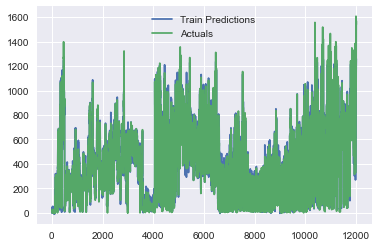

In [9]:
model = load_model('1H_Forecast/1H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(1,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)
train_predictions = model.predict(X_train).flatten()


train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 2 hours forecast

In [50]:
%%time

Trainer(2,6,12)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 8s 10ms/step - loss: 252311.1875 - mean_absolute_error: 412.5798 - val_loss: 367691.9688 - val_mean_absolute_error: 493.0078
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 249690.0156 - mean_absolute_error: 409.1801 - val_loss: 363585.2188 - val_mean_absolute_error: 488.6752
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 245534.8438 - mean_absolute_error: 404.3698 - val_loss: 358253.0000 - val_mean_absolute_error: 483.4920
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 241712.6094 - mean_absolute_error: 399.8851 - val_loss: 353848.6250 - val_mean_absolute_error: 479.1281
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 237928.6719 - mean_absolute_error: 395.5141 - val_loss: 349186.7500 - val_mean_absolute_error: 474.4878
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 234204.1875 - mean_absolute_error: 391.2233 - val_loss: 344646.7500 - val_mean_absolute_error: 470.0139
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 230425.0938 - mean_absolute_error: 386.9392 - val_loss: 340003.9375 - val_mean_absolute_error: 465.5069
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 226516.6875 - mean_absolute_error: 382.5526 - val_loss: 335159.4688 - val_mean_absolute_error: 460.8617
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 222448.3281 - mean_absolute_error: 378.0181 - val_loss: 330108.0938 - val_mean_absolute_error: 456.0453
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 218219.5469 - mean_absolute_error: 373.3178 - val_loss: 324852.7812 - val_mean_absolute_error: 451.0981
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 213849.0781 - mean_absolute_error: 368.5113 - val_loss: 319423.7812 - val_mean_absolute_error: 446.0341
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 209341.5312 - mean_absolute_error: 363.6272 - val_loss: 313808.5938 - val_mean_absolute_error: 440.8527
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 204720.6094 - mean_absolute_error: 358.5095 - val_loss: 308058.3438 - val_mean_absolute_error: 435.5910
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 199992.1094 - mean_absolute_error: 353.3609 - val_loss: 302151.8750 - val_mean_absolute_error: 430.1397
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 10ms/step - loss: 195103.6406 - mean_absolute_error: 348.0211 - val_loss: 295927.9375 - val_mean_absolute_error: 424.4290
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 190055.0625 - mean_absolute_error: 342.4831 - val_loss: 289655.1250 - val_mean_absolute_error: 418.5875
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 184991.9062 - mean_absolute_error: 336.8670 - val_loss: 283311.8438 - val_mean_absolute_error: 412.7168
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 179897.6719 - mean_absolute_error: 331.2119 - val_loss: 276891.3750 - val_mean_absolute_error: 406.6389
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 174764.7188 - mean_absolute_error: 325.4630 - val_loss: 270416.7500 - val_mean_absolute_error: 400.5796
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 169607.6250 - mean_absolute_error: 319.6257 - val_loss: 263879.7500 - val_mean_absolute_error: 394.3041
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 164429.7031 - mean_absolute_error: 313.7195 - val_loss: 257295.4062 - val_mean_absolute_error: 387.7044
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 158916.9531 - mean_absolute_error: 306.9950 - val_loss: 250079.5781 - val_mean_absolute_error: 380.6191
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 153548.7188 - mean_absolute_error: 300.5909 - val_loss: 243364.8438 - val_mean_absolute_error: 373.7813
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 148319.9531 - mean_absolute_error: 294.0821 - val_loss: 236635.3125 - val_mean_absolute_error: 367.0434
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 143121.8594 - mean_absolute_error: 287.5819 - val_loss: 229933.3750 - val_mean_absolute_error: 359.7250
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 137961.9375 - mean_absolute_error: 280.8851 - val_loss: 223220.5938 - val_mean_absolute_error: 352.7162
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 132857.4062 - mean_absolute_error: 274.6274 - val_loss: 216552.9375 - val_mean_absolute_error: 345.6098
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 127825.9531 - mean_absolute_error: 268.0992 - val_loss: 209922.9219 - val_mean_absolute_error: 338.4424
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 122858.9844 - mean_absolute_error: 261.6022 - val_loss: 203360.1406 - val_mean_absolute_error: 331.2863
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 117953.3828 - mean_absolute_error: 255.1193 - val_loss: 196834.0312 - val_mean_absolute_error: 324.0492
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 113133.8516 - mean_absolute_error: 248.6045 - val_loss: 190384.2500 - val_mean_absolute_error: 316.8704
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 108394.5156 - mean_absolute_error: 242.1364 - val_loss: 183998.3281 - val_mean_absolute_error: 309.6039
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 103737.6172 - mean_absolute_error: 235.5938 - val_loss: 177702.5938 - val_mean_absolute_error: 302.3737
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 99166.7422 - mean_absolute_error: 229.0554 - val_loss: 171472.2812 - val_mean_absolute_error: 295.1835
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 94722.6094 - mean_absolute_error: 222.7170 - val_loss: 165355.3594 - val_mean_absolute_error: 288.2597
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 90390.5859 - mean_absolute_error: 216.4514 - val_loss: 159356.6250 - val_mean_absolute_error: 280.8058
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 86153.5703 - mean_absolute_error: 209.6816 - val_loss: 153443.4219 - val_mean_absolute_error: 273.8898
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 82060.9062 - mean_absolute_error: 203.6074 - val_loss: 147681.6719 - val_mean_absolute_error: 266.7529
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 78110.4375 - mean_absolute_error: 197.5911 - val_loss: 142016.5000 - val_mean_absolute_error: 260.1449
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 74283.5000 - mean_absolute_error: 191.7433 - val_loss: 136518.4531 - val_mean_absolute_error: 253.4862
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 70609.6172 - mean_absolute_error: 185.8796 - val_loss: 131146.0469 - val_mean_absolute_error: 246.7892
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 67073.2969 - mean_absolute_error: 180.1785 - val_loss: 125956.0547 - val_mean_absolute_error: 240.8265
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 63687.1836 - mean_absolute_error: 174.7558 - val_loss: 120852.2734 - val_mean_absolute_error: 234.1546
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 60465.5859 - mean_absolute_error: 169.5443 - val_loss: 115968.6094 - val_mean_absolute_error: 228.1361
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 57380.4961 - mean_absolute_error: 164.3904 - val_loss: 111188.2109 - val_mean_absolute_error: 222.0437
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 54436.3906 - mean_absolute_error: 159.4015 - val_loss: 106591.0312 - val_mean_absolute_error: 215.9547
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 51643.1445 - mean_absolute_error: 154.1344 - val_loss: 102151.0625 - val_mean_absolute_error: 210.5286
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 49005.6289 - mean_absolute_error: 149.7712 - val_loss: 97865.3438 - val_mean_absolute_error: 204.6276
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 46503.0469 - mean_absolute_error: 145.0200 - val_loss: 93815.2188 - val_mean_absolute_error: 199.6723
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 44141.2148 - mean_absolute_error: 140.6351 - val_loss: 89809.1875 - val_mean_absolute_error: 193.4201
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 41910.0898 - mean_absolute_error: 136.3434 - val_loss: 85991.9062 - val_mean_absolute_error: 188.6493
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 39832.9023 - mean_absolute_error: 132.3727 - val_loss: 82375.0391 - val_mean_absolute_error: 183.7528
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 37898.3789 - mean_absolute_error: 128.5074 - val_loss: 78892.9609 - val_mean_absolute_error: 179.2758
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 36081.0703 - mean_absolute_error: 125.0608 - val_loss: 75523.9453 - val_mean_absolute_error: 174.9390
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 34362.2773 - mean_absolute_error: 121.6847 - val_loss: 72315.7891 - val_mean_absolute_error: 170.1817
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 32782.9258 - mean_absolute_error: 118.3600 - val_loss: 69272.3125 - val_mean_absolute_error: 166.6333
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 31354.0840 - mean_absolute_error: 115.5809 - val_loss: 66515.5156 - val_mean_absolute_error: 163.2058
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 30030.1680 - mean_absolute_error: 112.8953 - val_loss: 63779.1641 - val_mean_absolute_error: 158.5579
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 28812.8711 - mean_absolute_error: 110.1696 - val_loss: 61209.6484 - val_mean_absolute_error: 156.5406
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 27690.0254 - mean_absolute_error: 107.9753 - val_loss: 58741.1797 - val_mean_absolute_error: 152.6270
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 7ms/step - loss: 26638.7324 - mean_absolute_error: 105.7468 - val_loss: 56488.8789 - val_mean_absolute_error: 149.2655
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 25663.3613 - mean_absolute_error: 103.3757 - val_loss: 54311.0586 - val_mean_absolute_error: 146.1908
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 24770.4375 - mean_absolute_error: 101.5590 - val_loss: 52238.3281 - val_mean_absolute_error: 142.9717
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 23961.4102 - mean_absolute_error: 99.7830 - val_loss: 50400.1016 - val_mean_absolute_error: 140.3694
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 23228.5117 - mean_absolute_error: 98.2555 - val_loss: 48595.6562 - val_mean_absolute_error: 138.1606
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 22577.3984 - mean_absolute_error: 96.9531 - val_loss: 46957.8359 - val_mean_absolute_error: 135.6048
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 21950.6191 - mean_absolute_error: 95.6523 - val_loss: 45574.9648 - val_mean_absolute_error: 133.2214
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 21406.6230 - mean_absolute_error: 94.2766 - val_loss: 43944.9648 - val_mean_absolute_error: 131.2273
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 20888.7168 - mean_absolute_error: 93.2167 - val_loss: 42536.8672 - val_mean_absolute_error: 129.6581
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 20442.9902 - mean_absolute_error: 92.1837 - val_loss: 41346.5586 - val_mean_absolute_error: 127.5539
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 20005.1133 - mean_absolute_error: 91.1830 - val_loss: 40081.9297 - val_mean_absolute_error: 125.8219
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 19552.5137 - mean_absolute_error: 90.2588 - val_loss: 38739.7617 - val_mean_absolute_error: 123.9842
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 19195.3770 - mean_absolute_error: 89.6541 - val_loss: 37705.1211 - val_mean_absolute_error: 122.3007
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 18871.8281 - mean_absolute_error: 88.6057 - val_loss: 36686.0742 - val_mean_absolute_error: 120.2894
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 18556.6270 - mean_absolute_error: 88.0264 - val_loss: 35829.0625 - val_mean_absolute_error: 118.8198
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 18302.7656 - mean_absolute_error: 87.7672 - val_loss: 35017.3516 - val_mean_absolute_error: 117.4496
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 18045.6875 - mean_absolute_error: 86.9598 - val_loss: 34114.6836 - val_mean_absolute_error: 117.3404972.0234 - mean_absolute_error: 86. - ETA: 0s - loss: 17843.5723 - mean_absolut
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 17799.7812 - mean_absolute_error: 86.5637 - val_loss: 33548.3828 - val_mean_absolute_error: 116.6703
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 17599.2266 - mean_absolute_error: 86.1725 - val_loss: 32916.0977 - val_mean_absolute_error: 115.0766
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 17416.4902 - mean_absolute_error: 85.6536 - val_loss: 32236.7715 - val_mean_absolute_error: 113.7307
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 17194.1621 - mean_absolute_error: 85.2868 - val_loss: 31520.0879 - val_mean_absolute_error: 112.9102
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 17078.3945 - mean_absolute_error: 84.9953 - val_loss: 30939.3887 - val_mean_absolute_error: 112.9140
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 16917.2539 - mean_absolute_error: 84.7845 - val_loss: 30373.0957 - val_mean_absolute_error: 111.8912
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 16772.7285 - mean_absolute_error: 84.2717 - val_loss: 29841.6719 - val_mean_absolute_error: 111.0188
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 16652.8281 - mean_absolute_error: 84.2747 - val_loss: 29442.6562 - val_mean_absolute_error: 109.7349
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 16546.9434 - mean_absolute_error: 83.8611 - val_loss: 29089.4766 - val_mean_absolute_error: 109.5357
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 16439.4180 - mean_absolute_error: 83.4522 - val_loss: 28770.3320 - val_mean_absolute_error: 109.4437
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 16310.4336 - mean_absolute_error: 83.3856 - val_loss: 28463.2949 - val_mean_absolute_error: 108.8005
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 16232.6885 - mean_absolute_error: 83.3416 - val_loss: 27914.0977 - val_mean_absolute_error: 108.0220
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 16163.2324 - mean_absolute_error: 83.1683 - val_loss: 27685.4609 - val_mean_absolute_error: 109.2355
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 7ms/step - loss: 16050.2168 - mean_absolute_error: 82.7115 - val_loss: 27228.7070 - val_mean_absolute_error: 107.2306
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 15958.6416 - mean_absolute_error: 82.5449 - val_loss: 26930.6602 - val_mean_absolute_error: 107.0912
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 7ms/step - loss: 15908.9082 - mean_absolute_error: 82.6948 - val_loss: 26787.8770 - val_mean_absolute_error: 106.5779
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 15836.6572 - mean_absolute_error: 82.3936 - val_loss: 26431.4043 - val_mean_absolute_error: 106.4245
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 7ms/step - loss: 15756.5322 - mean_absolute_error: 82.1985 - val_loss: 26405.9922 - val_mean_absolute_error: 105.5711
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 15711.2432 - mean_absolute_error: 82.1893 - val_loss: 26093.6328 - val_mean_absolute_error: 105.2646
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 15624.8691 - mean_absolute_error: 81.8091 - val_loss: 25738.0410 - val_mean_absolute_error: 104.8700
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 15550.8008 - mean_absolute_error: 81.6787 - val_loss: 25710.5078 - val_mean_absolute_error: 104.8871
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 2s 7ms/step - loss: 15501.0693 - mean_absolute_error: 81.5269 - val_loss: 25358.1348 - val_mean_absolute_error: 104.4839
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 15468.7588 - mean_absolute_error: 81.7472 - val_loss: 25211.1855 - val_mean_absolute_error: 105.4153
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 9ms/step - loss: 251189.5469 - mean_absolute_error: 410.9363 - val_loss: 364099.7500 - val_mean_absolute_error: 488.8614
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 242468.2031 - mean_absolute_error: 400.2572 - val_loss: 349543.5625 - val_mean_absolute_error: 474.4449
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 230596.9062 - mean_absolute_error: 386.9361 - val_loss: 336077.9688 - val_mean_absolute_error: 461.5177
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 220678.5469 - mean_absolute_error: 375.9607 - val_loss: 325082.6562 - val_mean_absolute_error: 451.1927
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 211868.1875 - mean_absolute_error: 366.2833 - val_loss: 314201.8750 - val_mean_absolute_error: 441.1193
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 202739.4844 - mean_absolute_error: 356.2291 - val_loss: 302787.2812 - val_mean_absolute_error: 430.6418
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 193581.5156 - mean_absolute_error: 346.2221 - val_loss: 291485.8125 - val_mean_absolute_error: 420.2327
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 184261.6406 - mean_absolute_error: 335.9852 - val_loss: 279595.5625 - val_mean_absolute_error: 409.0537
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 9ms/step - loss: 174795.6094 - mean_absolute_error: 325.3517 - val_loss: 267893.5312 - val_mean_absolute_error: 398.0057
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 165513.7812 - mean_absolute_error: 314.6756 - val_loss: 256210.7656 - val_mean_absolute_error: 386.4649
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 156338.8594 - mean_absolute_error: 303.8233 - val_loss: 244553.4844 - val_mean_absolute_error: 374.9715
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 147181.9688 - mean_absolute_error: 292.8580 - val_loss: 232544.2031 - val_mean_absolute_error: 362.8040
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 138064.0000 - mean_absolute_error: 281.7094 - val_loss: 220941.1250 - val_mean_absolute_error: 350.8446
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 129333.3906 - mean_absolute_error: 270.8602 - val_loss: 209600.2969 - val_mean_absolute_error: 338.7544
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 120901.3125 - mean_absolute_error: 260.0487 - val_loss: 198594.6094 - val_mean_absolute_error: 326.7542
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 112797.5391 - mean_absolute_error: 249.3538 - val_loss: 187824.8906 - val_mean_absolute_error: 315.1390
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 9ms/step - loss: 104752.2734 - mean_absolute_error: 238.4321 - val_loss: 176322.0469 - val_mean_absolute_error: 302.0648
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 96745.6797 - mean_absolute_error: 227.2201 - val_loss: 166068.1406 - val_mean_absolute_error: 290.0043
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 89575.0625 - mean_absolute_error: 216.5077 - val_loss: 156249.6250 - val_mean_absolute_error: 278.8600
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 82834.1328 - mean_absolute_error: 206.7675 - val_loss: 146807.2344 - val_mean_absolute_error: 267.6627
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 76437.1719 - mean_absolute_error: 196.6519 - val_loss: 137699.4688 - val_mean_absolute_error: 256.5165
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 70427.4141 - mean_absolute_error: 187.1088 - val_loss: 129065.7734 - val_mean_absolute_error: 245.9542
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 64883.6211 - mean_absolute_error: 178.3126 - val_loss: 120913.7500 - val_mean_absolute_error: 235.8737
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 59796.9023 - mean_absolute_error: 170.0738 - val_loss: 113203.5234 - val_mean_absolute_error: 226.7604
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 9ms/step - loss: 55117.7930 - mean_absolute_error: 162.4599 - val_loss: 105945.0312 - val_mean_absolute_error: 217.7423
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 50788.5273 - mean_absolute_error: 154.7331 - val_loss: 99069.9688 - val_mean_absolute_error: 208.6394
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 46764.1680 - mean_absolute_error: 146.5842 - val_loss: 92360.8906 - val_mean_absolute_error: 198.8899
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 43055.5898 - mean_absolute_error: 139.7372 - val_loss: 86275.1406 - val_mean_absolute_error: 191.1216
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 9ms/step - loss: 39770.8438 - mean_absolute_error: 133.0507 - val_loss: 80616.7578 - val_mean_absolute_error: 182.9540
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 36801.9961 - mean_absolute_error: 127.1339 - val_loss: 75267.1172 - val_mean_absolute_error: 176.2037
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 34181.5703 - mean_absolute_error: 122.0837 - val_loss: 70405.0000 - val_mean_absolute_error: 168.9512
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 31871.5000 - mean_absolute_error: 117.1501 - val_loss: 65934.3281 - val_mean_absolute_error: 163.2488
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 29881.7090 - mean_absolute_error: 113.1852 - val_loss: 61947.0469 - val_mean_absolute_error: 158.3584
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 28145.7285 - mean_absolute_error: 109.9223 - val_loss: 58235.5039 - val_mean_absolute_error: 153.0746
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 26631.9277 - mean_absolute_error: 106.8082 - val_loss: 54926.7539 - val_mean_absolute_error: 148.3847
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 25313.0684 - mean_absolute_error: 104.0945 - val_loss: 52037.8359 - val_mean_absolute_error: 144.6696
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 9ms/step - loss: 24182.6016 - mean_absolute_error: 102.0845 - val_loss: 49242.2344 - val_mean_absolute_error: 140.7834
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 23216.4336 - mean_absolute_error: 99.9985 - val_loss: 46814.1094 - val_mean_absolute_error: 137.3703
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 22380.0879 - mean_absolute_error: 98.1411 - val_loss: 44576.7500 - val_mean_absolute_error: 133.9796
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 21553.3906 - mean_absolute_error: 95.6901 - val_loss: 42472.3672 - val_mean_absolute_error: 130.7867
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 20835.6230 - mean_absolute_error: 93.9140 - val_loss: 40605.0938 - val_mean_absolute_error: 127.8402
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 20224.7188 - mean_absolute_error: 92.5061 - val_loss: 39007.3828 - val_mean_absolute_error: 125.3544
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 19699.9414 - mean_absolute_error: 91.1943 - val_loss: 37428.7891 - val_mean_absolute_error: 122.9078
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 19201.1270 - mean_absolute_error: 90.0651 - val_loss: 36018.5117 - val_mean_absolute_error: 120.5670
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 18812.7832 - mean_absolute_error: 89.3117 - val_loss: 35084.0469 - val_mean_absolute_error: 119.3387
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 18424.8320 - mean_absolute_error: 88.1451 - val_loss: 33509.4297 - val_mean_absolute_error: 116.5752
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 18061.0098 - mean_absolute_error: 87.1714 - val_loss: 32438.3203 - val_mean_absolute_error: 115.3498
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 17823.7422 - mean_absolute_error: 86.8781 - val_loss: 31497.3789 - val_mean_absolute_error: 114.7293
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 17525.4629 - mean_absolute_error: 86.2460 - val_loss: 30728.3555 - val_mean_absolute_error: 112.8424
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 17331.5762 - mean_absolute_error: 85.7503 - val_loss: 29925.6484 - val_mean_absolute_error: 111.5400
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 17121.8301 - mean_absolute_error: 85.4146 - val_loss: 29410.9395 - val_mean_absolute_error: 110.7279
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 16939.4258 - mean_absolute_error: 84.8943 - val_loss: 28660.1602 - val_mean_absolute_error: 110.1035
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 16775.6895 - mean_absolute_error: 84.6953 - val_loss: 28050.0176 - val_mean_absolute_error: 109.2223
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 16650.0859 - mean_absolute_error: 84.4007 - val_loss: 27324.3320 - val_mean_absolute_error: 108.1621
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 16484.1191 - mean_absolute_error: 84.1667 - val_loss: 26858.3711 - val_mean_absolute_error: 108.4835
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 16384.2168 - mean_absolute_error: 83.8834 - val_loss: 26510.6543 - val_mean_absolute_error: 106.1778
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 16263.5303 - mean_absolute_error: 83.5630 - val_loss: 26000.5488 - val_mean_absolute_error: 105.8974
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 16168.0322 - mean_absolute_error: 83.4449 - val_loss: 25575.2344 - val_mean_absolute_error: 104.9190
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 16116.3145 - mean_absolute_error: 83.2621 - val_loss: 25230.6836 - val_mean_absolute_error: 104.6017
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 15991.7891 - mean_absolute_error: 82.9075 - val_loss: 25206.5527 - val_mean_absolute_error: 104.3318
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 15910.0811 - mean_absolute_error: 82.9926 - val_loss: 25522.1602 - val_mean_absolute_error: 104.4777
Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 15866.7070 - mean_absolute_error: 82.6942 - val_loss: 24710.9004 - val_mean_absolute_error: 103.0996
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 9ms/step - loss: 15800.8271 - mean_absolute_error: 82.7164 - val_loss: 24299.2227 - val_mean_absolute_error: 102.5488
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 15709.4355 - mean_absolute_error: 82.2391 - val_loss: 23937.4746 - val_mean_absolute_error: 102.1700
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 11ms/step - loss: 15622.5068 - mean_absolute_error: 82.3549 - val_loss: 23651.1133 - val_mean_absolute_error: 103.0294
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 15589.3457 - mean_absolute_error: 82.1782 - val_loss: 23902.5840 - val_mean_absolute_error: 101.3864
Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 15541.1748 - mean_absolute_error: 82.0243 - val_loss: 23766.7793 - val_mean_absolute_error: 101.2515
Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 15491.9707 - mean_absolute_error: 81.7345 - val_loss: 23589.2461 - val_mean_absolute_error: 100.7366
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 15452.7236 - mean_absolute_error: 81.9234 - val_loss: 23183.8457 - val_mean_absolute_error: 100.7867
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 15396.2119 - mean_absolute_error: 81.6087 - val_loss: 23317.3262 - val_mean_absolute_error: 100.4865
Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 15340.3242 - mean_absolute_error: 81.4329 - val_loss: 22911.3828 - val_mean_absolute_error: 100.0141
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 15306.4590 - mean_absolute_error: 81.5595 - val_loss: 22769.7500 - val_mean_absolute_error: 99.2501
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 15287.6191 - mean_absolute_error: 81.4515 - val_loss: 22586.0430 - val_mean_absolute_error: 99.2379
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 15253.2295 - mean_absolute_error: 81.3367 - val_loss: 22819.0137 - val_mean_absolute_error: 99.2335
Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 15196.5098 - mean_absolute_error: 81.3805 - val_loss: 22595.2344 - val_mean_absolute_error: 99.4423
Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 15181.3926 - mean_absolute_error: 81.2516 - val_loss: 22465.2676 - val_mean_absolute_error: 100.4450
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 15127.2090 - mean_absolute_error: 80.9470 - val_loss: 23710.0215 - val_mean_absolute_error: 100.2269
Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 15092.4355 - mean_absolute_error: 80.8665 - val_loss: 22505.2129 - val_mean_absolute_error: 99.9606
Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 15064.4375 - mean_absolute_error: 80.7941 - val_loss: 22006.6523 - val_mean_absolute_error: 98.2815
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 15031.1602 - mean_absolute_error: 80.6989 - val_loss: 22233.0977 - val_mean_absolute_error: 98.4048
Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 15030.2715 - mean_absolute_error: 80.9007 - val_loss: 21733.2109 - val_mean_absolute_error: 98.4906
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 15001.1270 - mean_absolute_error: 80.7039 - val_loss: 21811.5469 - val_mean_absolute_error: 99.2188
Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 14979.3340 - mean_absolute_error: 80.6936 - val_loss: 21995.2988 - val_mean_absolute_error: 98.2468
Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 14946.3115 - mean_absolute_error: 80.6259 - val_loss: 22122.0293 - val_mean_absolute_error: 98.0678
Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 14977.1240 - mean_absolute_error: 80.7099 - val_loss: 21922.0566 - val_mean_absolute_error: 97.8495
Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 14875.7100 - mean_absolute_error: 80.3432 - val_loss: 21558.3535 - val_mean_absolute_error: 97.6275
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 14868.1182 - mean_absolute_error: 80.1921 - val_loss: 21971.9629 - val_mean_absolute_error: 97.9218
Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 14841.2637 - mean_absolute_error: 80.2486 - val_loss: 22125.1621 - val_mean_absolute_error: 98.6054
Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 14834.0527 - mean_absolute_error: 80.0528 - val_loss: 22223.4004 - val_mean_absolute_error: 98.0172
Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 14811.7529 - mean_absolute_error: 80.3310 - val_loss: 21638.0391 - val_mean_absolute_error: 97.5846
Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 14804.4648 - mean_absolute_error: 80.1119 - val_loss: 21781.9844 - val_mean_absolute_error: 97.3894
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 14745.2158 - mean_absolute_error: 79.8228 - 

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 14602.7959 - mean_absolute_error: 79.6423 - val_loss: 21390.1855 - val_mean_absolute_error: 96.9725
Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 14601.3047 - mean_absolute_error: 79.4675 - val_loss: 20989.7344 - val_mean_absolute_error: 97.2868
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 10ms/step - loss: 251323.5000 - mean_absolute_error: 411.3840 - val_loss: 363388.0938 - val_mean_absolute_error: 489.0546
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 245348.3906 - mean_absolute_error: 403.9929 - val_loss: 355036.3750 - val_mean_absolute_error: 480.1808
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 9ms/step - loss: 236766.3594 - mean_absolute_error: 393.9378 - val_loss: 344384.2500 - val_mean_absolute_error: 469.8347
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 228975.7031 - mean_absolute_error: 385.1678 - val_loss: 335376.8750 - val_mean_absolute_error: 461.1884
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 221656.4844 - mean_absolute_error: 377.0024 - val_loss: 325849.3438 - val_mean_absolute_error: 452.0955
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 213127.1719 - mean_absolute_error: 367.6078 - val_loss: 315289.3750 - val_mean_absolute_error: 442.3067
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 204494.3750 - mean_absolute_error: 358.2365 - val_loss: 304438.6562 - val_mean_absolute_error: 432.3577
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 195629.0156 - mean_absolute_error: 348.4514 - val_loss: 293624.1875 - val_mean_absolute_error: 422.4333
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 186849.7500 - mean_absolute_error: 338.7219 - val_loss: 282676.1562 - val_mean_absolute_error: 412.2166
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 11ms/step - loss: 178008.0938 - mean_absolute_error: 328.8400 - val_loss: 271574.7500 - val_mean_absolute_error: 401.7368
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 169037.2812 - mean_absolute_error: 318.5769 - val_loss: 259896.8750 - val_mean_absolute_error: 390.3721
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 159789.4844 - mean_absolute_error: 307.7027 - val_loss: 248459.0000 - val_mean_absolute_error: 379.2112
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 11ms/step - loss: 150934.4219 - mean_absolute_error: 297.2766 - val_loss: 237190.3594 - val_mean_absolute_error: 367.5760
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 142242.5156 - mean_absolute_error: 286.5458 - val_loss: 225998.2500 - val_mean_absolute_error: 355.9063
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 11ms/step - loss: 133724.5781 - mean_absolute_error: 275.7382 - val_loss: 214962.7656 - val_mean_absolute_error: 344.3929
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 125424.6406 - mean_absolute_error: 265.2707 - val_loss: 204100.8281 - val_mean_absolute_error: 332.6460
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 9ms/step - loss: 117411.3438 - mean_absolute_error: 254.8629 - val_loss: 193574.0938 - val_mean_absolute_error: 321.1576
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 109679.9141 - mean_absolute_error: 244.6110 - val_loss: 183247.9375 - val_mean_absolute_error: 309.9008
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 102220.8594 - mean_absolute_error: 234.5791 - val_loss: 173221.6562 - val_mean_absolute_error: 298.4919
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 95119.5625 - mean_absolute_error: 224.7353 - val_loss: 163526.7031 - val_mean_absolute_error: 287.4366
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 88332.8828 - mean_absolute_error: 214.8592 - val_loss: 154154.5469 - val_mean_absolute_error: 276.6020
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 81896.9375 - mean_absolute_error: 205.3702 - val_loss: 145140.9375 - val_mean_absolute_error: 266.1294
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 75681.9766 - mean_absolute_error: 195.6480 - val_loss: 136144.0156 - val_mean_absolute_error: 255.2737
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 69800.5547 - mean_absolute_error: 186.5918 - val_loss: 127733.2891 - val_mean_absolute_error: 245.4254
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 64384.7461 - mean_absolute_error: 177.8373 - val_loss: 119740.7031 - val_mean_absolute_error: 235.3046
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 59362.5508 - mean_absolute_error: 169.3645 - val_loss: 112154.5312 - val_mean_absolute_error: 225.7376
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 54767.1719 - mean_absolute_error: 161.7180 - val_loss: 105133.8047 - val_mean_absolute_error: 217.2925
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 9ms/step - loss: 50533.2734 - mean_absolute_error: 154.2189 - val_loss: 98351.5547 - val_mean_absolute_error: 207.8850
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 9ms/step - loss: 46646.4141 - mean_absolute_error: 146.9567 - val_loss: 92124.0547 - val_mean_absolute_error: 199.6764
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 43195.6602 - mean_absolute_error: 140.7254 - val_loss: 86356.0859 - val_mean_absolute_error: 192.2010
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 40038.8984 - mean_absolute_error: 134.3712 - val_loss: 80984.5859 - val_mean_absolute_error: 184.9221
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 37219.8633 - mean_absolute_error: 128.5748 - val_loss: 75842.7969 - val_mean_absolute_error: 177.7283
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 34656.1758 - mean_absolute_error: 123.1724 - val_loss: 71171.6328 - val_mean_absolute_error: 171.4961
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 32371.3457 - mean_absolute_error: 118.3402 - val_loss: 66778.0312 - val_mean_absolute_error: 165.6100
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 30340.4258 - mean_absolute_error: 114.3772 - val_loss: 62793.5078 - val_mean_absolute_error: 159.7716
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 28617.1133 - mean_absolute_error: 111.1198 - val_loss: 59169.3906 - val_mean_absolute_error: 155.2149
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 27125.9219 - mean_absolute_error: 108.1207 - val_loss: 55909.4688 - val_mean_absolute_error: 151.2074
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 25830.7676 - mean_absolute_error: 105.5849 - val_loss: 53041.6758 - val_mean_absolute_error: 147.2882
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 24688.9570 - mean_absolute_error: 103.1172 - val_loss: 50375.7266 - val_mean_absolute_error: 143.2039
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 23622.2461 - mean_absolute_error: 100.5367 - val_loss: 47906.9688 - val_mean_absolute_error: 139.6010
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 22729.7598 - mean_absolute_error: 98.4461 - val_loss: 45543.3438 - val_mean_absolute_error: 136.0450
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 21947.4082 - mean_absolute_error: 96.6263 - val_loss: 43420.4883 - val_mean_absolute_error: 132.4379
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 21233.5859 - mean_absolute_error: 95.1072 - val_loss: 41546.2227 - val_mean_absolute_error: 129.9388
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 20665.9277 - mean_absolute_error: 94.0975 - val_loss: 39954.1445 - val_mean_absolute_error: 128.2198
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 11ms/step - loss: 20127.2266 - mean_absolute_error: 92.8064 - val_loss: 38351.6680 - val_mean_absolute_error: 125.5584
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 19673.2598 - mean_absolute_error: 92.1435 - val_loss: 36981.1133 - val_mean_absolute_error: 123.4741
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 19279.9883 - mean_absolute_error: 91.2749 - val_loss: 35812.2305 - val_mean_absolute_error: 121.5168
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 18924.8203 - mean_absolute_error: 90.5150 - val_loss: 34708.5820 - val_mean_absolute_error: 120.6472
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 18609.8262 - mean_absolute_error: 89.7491 - val_loss: 33903.0117 - val_mean_absolute_error: 119.3016
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 18323.5898 - mean_absolute_error: 89.1285 - val_loss: 32990.4844 - val_mean_absolute_error: 117.5342
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 9ms/step - loss: 18086.9180 - mean_absolute_error: 88.6012 - val_loss: 31846.3887 - val_mean_absolute_error: 116.9399
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 17865.1777 - mean_absolute_error: 88.0983 - val_loss: 31335.3203 - val_mean_absolute_error: 115.2538
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 17641.5234 - mean_absolute_error: 87.6027 - val_loss: 30665.5469 - val_mean_absolute_error: 114.3028
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 9ms/step - loss: 17414.6914 - mean_absolute_error: 86.8010 - val_loss: 29795.2578 - val_mean_absolute_error: 112.4437
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 17192.9844 - mean_absolute_error: 86.3106 - val_loss: 28950.6504 - val_mean_absolute_error: 110.8415
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 16965.6523 - mean_absolute_error: 85.9809 - val_loss: 28367.9199 - val_mean_absolute_error: 110.4491
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 16810.3223 - mean_absolute_error: 85.4067 - val_loss: 27743.5781 - val_mean_absolute_error: 108.6233
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 9ms/step - loss: 16674.8770 - mean_absolute_error: 85.1813 - val_loss: 27146.8066 - val_mean_absolute_error: 108.0271
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 16520.5078 - mean_absolute_error: 84.6752 - val_loss: 26770.6406 - val_mean_absolute_error: 108.0708
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 16379.7236 - mean_absolute_error: 84.2950 - val_loss: 26230.9902 - val_mean_absolute_error: 105.8350
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 16282.9971 - mean_absolute_error: 84.0988 - val_loss: 25812.2031 - val_mean_absolute_error: 105.4028
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 16133.1162 - mean_absolute_error: 83.7482 - val_loss: 25474.4824 - val_mean_absolute_error: 105.1668
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 16006.2549 - mean_absolute_error: 83.3854 - val_loss: 26180.0254 - val_mean_absolute_error: 104.9782
Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 15918.1357 - mean_absolute_error: 83.2749 - val_loss: 25005.9219 - val_mean_absolute_error: 103.6534
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 9ms/step - loss: 15816.2725 - mean_absolute_error: 82.6947 - val_loss: 25932.5137 - val_mean_absolute_error: 104.3294
Epoch 66/100
376/376 [==============================] - 4s 9ms/step - loss: 15766.8096 - mean_absolute_error: 82.5976 - val_loss: 24417.1152 - val_mean_absolute_error: 102.0390
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 9ms/step - loss: 15682.9629 - mean_absolute_error: 82.6077 - val_loss: 24012.4688 - val_mean_absolute_error: 102.2336
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 15574.9092 - mean_absolute_error: 82.1823 - val_loss: 23901.6230 - val_mean_absolute_error: 100.7978
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 15497.9814 - mean_absolute_error: 81.6771 - val_loss: 23959.4180 - val_mean_absolute_error: 101.2258
Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 15421.6455 - mean_absolute_error: 81.7061 - val_loss: 23148.1484 - val_mean_absolute_error: 100.1402
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 15380.2705 - mean_absolute_error: 81.7071 - val_loss: 23156.0488 - val_mean_absolute_error: 100.4796
Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 15328.7285 - mean_absolute_error: 81.4560 - val_loss: 22957.6699 - val_mean_absolute_error: 99.3620
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 15272.1514 - mean_absolute_error: 81.1707 - val_loss: 22621.4121 - val_mean_absolute_error: 98.8989
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 9ms/step - loss: 15190.2510 - mean_absolute_error: 81.0906 - val_loss: 22363.7871 - val_mean_absolute_error: 99.7042
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 15123.4600 - mean_absolute_error: 80.7320 - val_loss: 22233.2969 - val_mean_absolute_error: 98.6330
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 15065.3223 - mean_absolute_error: 80.7022 - val_loss: 22179.6406 - val_mean_absolute_error: 97.9843
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 15031.8398 - mean_absolute_error: 80.5716 - val_loss: 22342.4844 - val_mean_absolute_error: 97.6471
Epoch 78/100
376/376 [==============================] - 4s 10ms/step - loss: 14938.4385 - mean_absolute_error: 80.3642 - val_loss: 22629.2246 - val_mean_absolute_error: 98.0731
Epoch 79/100
376/376 [==============================] - 4s 10ms/step - loss: 14965.8965 - mean_absolute_error: 80.4324 - val_loss: 22271.2988 - val_mean_absolute_error: 97.5007
Epoch 80/100
376/376 [==============================] - 4s 9ms/step - loss: 14886.1367 - mean_absolute_error: 80.1710 - val_loss: 21650.6543 - val_mean_absolute_error: 96.8860
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 14820.0166 - mean_absolute_error: 79.8411 - val_loss: 21478.3750 - val_mean_absolute_error: 97.4858
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 14789.5293 - mean_absolute_error: 79.9746 - val_loss: 21400.8477 - val_mean_absolute_error: 97.5418
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 14727.9736 - mean_absolute_error: 79.5397 - val_loss: 21525.2285 - val_mean_absolute_error: 97.0350
Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 14672.9658 - mean_absolute_error: 79.4946 - val_loss: 21661.3887 - val_mean_absolute_error: 96.6431
Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 14635.0820 - mean_absolute_error: 79.5114 - val_loss: 21515.3691 - val_mean_absolute_error: 96.2921
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 14589.2070 - mean_absolute_error: 79.4542 - val_loss: 21127.5234 - val_mean_absolute_error: 96.2237
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 4s 10ms/step - loss: 14576.8555 - mean_absolute_error: 79.2279 - val_loss: 20935.1875 - val_mean_absolute_error: 96.4433
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 4s 9ms/step - loss: 14557.1621 - mean_absolute_error: 78.9965 - val_loss: 21316.7070 - val_mean_absolute_error: 96.7690
Epoch 89/100
376/376 [==============================] - 4s 10ms/step - loss: 14518.2324 - mean_absolute_error: 79.2540 - val_loss: 20826.0625 - val_mean_absolute_error: 96.1386
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 14472.0098 - mean_absolute_error: 79.0695 - val_loss: 20992.8105 - val_mean_absolute_error: 95.7946
Epoch 91/100
376/376 [==============================] - 4s 9ms/step - loss: 14446.7236 - mean_absolute_error: 78.9451 - val_loss: 21075.8477 - val_mean_absolute_error: 95.4565
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 14401.5693 - mean_absolute_error: 78.9133 - val_loss: 20847.2480 - val_mean_absolute_error: 95.9644
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 14324.6846 - mean_absolute_error: 78.7263 - val_loss: 20921.1953 - val_mean_absolute_error: 96.1867
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 14344.0928 - mean_absolute_error: 78.7639 - val_loss: 20808.0605 - val_mean_absolute_error: 97.3693
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 14312.2900 - mean_absolute_error: 78.4794 - val_loss: 21056.2363 - val_mean_absolute_error: 95.9117
Epoch 96/100
376/376 [==============================] - 3s 9ms/step - loss: 14258.7197 - mean_absolute_error: 78.2929 - val_loss: 20906.4473 - val_mean_absolute_error: 95.7833
Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 14199.8691 - mean_absolute_error: 78.3678 - val_loss: 20891.1074 - val_mean_absolute_error: 95.6713
Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 14203.6553 - mean_absolute_error: 78.2930 - val_loss: 20609.2598 - val_mean_absolute_error: 95.9395
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 14145.8545 - mean_absolute_error: 78.0357 - val_loss: 20614.4590 - val_mean_absolute_error: 95.6751
Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 14145.4414 - mean_absolute_error: 78.0226 - val_loss: 20586.0977 - val_mean_absolute_error: 95.4963
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 8s 11ms/step - loss: 251735.0000 - mean_absolute_error: 411.6747 - val_loss: 364095.9375 - val_mean_absolute_error: 489.3702
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 243733.7500 - mean_absolute_error: 401.8175 - val_loss: 349344.7812 - val_mean_absolute_error: 474.6619
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 232238.5156 - mean_absolute_error: 388.8419 - val_loss: 338356.3125 - val_mean_absolute_error: 463.9149
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 222978.5625 - mean_absolute_error: 378.5091 - val_loss: 327202.9375 - val_mean_absolute_error: 453.3445
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 214090.1250 - mean_absolute_error: 368.6768 - val_loss: 316137.6562 - val_mean_absolute_error: 443.0280
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 10ms/step - loss: 204841.0156 - mean_absolute_error: 358.5466 - val_loss: 304865.0625 - val_mean_absolute_error: 432.7195
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 9ms/step - loss: 195573.3125 - mean_absolute_error: 348.3621 - val_loss: 293368.9062 - val_mean_absolute_error: 422.1671
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 186203.0156 - mean_absolute_error: 337.9737 - val_loss: 281719.5938 - val_mean_absolute_error: 411.2391
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 176736.5781 - mean_absolute_error: 327.3346 - val_loss: 269666.5000 - val_mean_absolute_error: 399.8743
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 9ms/step - loss: 166928.7656 - mean_absolute_error: 316.0305 - val_loss: 257311.9375 - val_mean_absolute_error: 387.8270
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 156940.8281 - mean_absolute_error: 304.4041 - val_loss: 244542.2188 - val_mean_absolute_error: 375.3871
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 147294.4062 - mean_absolute_error: 292.9508 - val_loss: 232289.8906 - val_mean_absolute_error: 362.9405
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 137926.0156 - mean_absolute_error: 281.2384 - val_loss: 220204.5312 - val_mean_absolute_error: 350.3706
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 128813.0547 - mean_absolute_error: 269.5275 - val_loss: 208387.6094 - val_mean_absolute_error: 337.5870
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 120021.0312 - mean_absolute_error: 258.1095 - val_loss: 196852.2812 - val_mean_absolute_error: 325.1605
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 111563.5938 - mean_absolute_error: 246.8847 - val_loss: 185688.6406 - val_mean_absolute_error: 312.8597
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 9ms/step - loss: 103456.0312 - mean_absolute_error: 235.7242 - val_loss: 174791.7812 - val_mean_absolute_error: 300.3574
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 95665.7500 - mean_absolute_error: 224.3408 - val_loss: 164228.1250 - val_mean_absolute_error: 288.3156
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 88337.1016 - mean_absolute_error: 213.9760 - val_loss: 154164.2344 - val_mean_absolute_error: 276.4956
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 9ms/step - loss: 81371.2422 - mean_absolute_error: 203.1720 - val_loss: 144358.7031 - val_mean_absolute_error: 264.1120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 11ms/step - loss: 74772.7188 - mean_absolute_error: 192.5907 - val_loss: 135028.5156 - val_mean_absolute_error: 252.8668
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 9ms/step - loss: 68625.2031 - mean_absolute_error: 182.7437 - val_loss: 126228.6328 - val_mean_absolute_error: 242.0428: 0s - loss: 69260.3594 - mean_absolute_erro
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 62961.8008 - mean_absolute_error: 173.7256 - val_loss: 117897.9766 - val_mean_absolute_error: 232.1656
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 57792.3789 - mean_absolute_error: 165.4918 - val_loss: 110151.6328 - val_mean_absolute_error: 222.9843
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 53080.9844 - mean_absolute_error: 157.5913 - val_loss: 102746.7422 - val_mean_absolute_error: 212.9833
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 48824.1211 - mean_absolute_error: 150.3447 - val_loss: 95992.9531 - val_mean_absolute_error: 204.4470
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 44899.1406 - mean_absolute_error: 143.0045 - val_loss: 89489.5547 - val_mean_absolute_error: 195.2162
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 41382.4023 - mean_absolute_error: 136.3522 - val_loss: 83646.7266 - val_mean_absolute_error: 187.9547
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 38287.2305 - mean_absolute_error: 130.5645 - val_loss: 78378.3672 - val_mean_absolute_error: 182.3567
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 35507.6641 - mean_absolute_error: 125.5907 - val_loss: 73038.0938 - val_mean_absolute_error: 174.0892
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 33033.4375 - mean_absolute_error: 120.7105 - val_loss: 68555.5547 - val_mean_absolute_error: 169.4687
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 30900.4512 - mean_absolute_error: 116.5553 - val_loss: 64238.3125 - val_mean_absolute_error: 162.6043
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 29030.5605 - mean_absolute_error: 112.7812 - val_loss: 60353.2734 - val_mean_absolute_error: 157.3573
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 27419.5371 - mean_absolute_error: 109.6478 - val_loss: 56766.2422 - val_mean_absolute_error: 153.3903
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 11ms/step - loss: 26008.7031 - mean_absolute_error: 106.7267 - val_loss: 53578.4883 - val_mean_absolute_error: 148.7016
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 9ms/step - loss: 24631.1230 - mean_absolute_error: 103.3119 - val_loss: 50645.0195 - val_mean_absolute_error: 143.8870
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 12ms/step - loss: 23572.4336 - mean_absolute_error: 101.2303 - val_loss: 48140.3125 - val_mean_absolute_error: 140.4329
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 22654.6055 - mean_absolute_error: 99.5055 - val_loss: 45875.7539 - val_mean_absolute_error: 136.9912
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 21862.9023 - mean_absolute_error: 97.8986 - val_loss: 44022.1758 - val_mean_absolute_error: 134.2152
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 11ms/step - loss: 21107.7637 - mean_absolute_error: 95.7676 - val_loss: 41736.3750 - val_mean_absolute_error: 131.3727
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 20402.7910 - mean_absolute_error: 93.9427 - val_loss: 40112.9492 - val_mean_absolute_error: 128.7657
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 11ms/step - loss: 19836.1406 - mean_absolute_error: 92.6643 - val_loss: 38648.1641 - val_mean_absolute_error: 126.5488
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 19319.4941 - mean_absolute_error: 91.4963 - val_loss: 36787.9023 - val_mean_absolute_error: 122.5298
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 18783.1406 - mean_absolute_error: 89.6961 - val_loss: 35512.2930 - val_mean_absolute_error: 121.0314
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 11ms/step - loss: 18379.6797 - mean_absolute_error: 88.9991 - val_loss: 34284.7969 - val_mean_absolute_error: 120.0027
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 18074.6270 - mean_absolute_error: 88.5182 - val_loss: 33207.0898 - val_mean_absolute_error: 117.9479
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 9ms/step - loss: 17765.1094 - mean_absolute_error: 87.7616 - val_loss: 32074.3262 - val_mean_absolute_error: 116.2905
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 17499.2344 - mean_absolute_error: 87.1514 - val_loss: 31300.8086 - val_mean_absolute_error: 115.9520
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 17251.9648 - mean_absolute_error: 86.5748 - val_loss: 30804.6543 - val_mean_absolute_error: 115.1093
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 17024.1621 - mean_absolute_error: 85.9638 - val_loss: 29777.7344 - val_mean_absolute_error: 113.2859
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 16823.9531 - mean_absolute_error: 85.5542 - val_loss: 29226.2383 - val_mean_absolute_error: 111.5649
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 16636.2949 - mean_absolute_error: 85.2018 - val_loss: 28778.3242 - val_mean_absolute_error: 112.3158
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 16463.0781 - mean_absolute_error: 84.7109 - val_loss: 28280.6387 - val_mean_absolute_error: 110.1149
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 16307.1729 - mean_absolute_error: 84.5093 - val_loss: 28272.2520 - val_mean_absolute_error: 110.7305
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 16193.6260 - mean_absolute_error: 83.9735 - val_loss: 27559.4180 - val_mean_absolute_error: 108.7170
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 16048.1826 - mean_absolute_error: 83.7515 - val_loss: 27151.1094 - val_mean_absolute_error: 109.2370
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 9ms/step - loss: 15928.8818 - mean_absolute_error: 83.3163 - val_loss: 26483.2246 - val_mean_absolute_error: 107.7104
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 15829.6201 - mean_absolute_error: 83.1674 - val_loss: 26676.9668 - val_mean_absolute_error: 106.8084
Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 15691.8877 - mean_absolute_error: 82.8153 - val_loss: 26393.4238 - val_mean_absolute_error: 107.9069
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 11ms/step - loss: 15599.2861 - mean_absolute_error: 82.2937 - val_loss: 27186.1484 - val_mean_absolute_error: 107.6835
Epoch 61/100
376/376 [==============================] - 4s 11ms/step - loss: 15491.2314 - mean_absolute_error: 82.0810 - val_loss: 25360.7461 - val_mean_absolute_error: 105.6190
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 15400.7500 - mean_absolute_error: 81.7504 - val_loss: 25811.7070 - val_mean_absolute_error: 104.8033
Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 15302.5713 - mean_absolute_error: 81.5647 - val_loss: 26240.7949 - val_mean_absolute_error: 105.2049
Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 15198.4248 - mean_absolute_error: 81.2105 - val_loss: 25621.5332 - val_mean_absolute_error: 105.1284
Epoch 65/100
376/376 [==============================] - 3s 9ms/step - loss: 15134.1504 - mean_absolute_error: 80.9602 - val_loss: 25032.3457 - val_mean_absolute_error: 103.1797
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 15066.3096 - mean_absolute_error: 80.6796 - val_loss: 25811.1230 - val_mean_absolute_error: 103.8295
Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 14966.2812 - mean_absolute_error: 80.5489 - val_loss: 24823.1270 - val_mean_absolute_error: 102.8333
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 14911.4668 - mean_absolute_error: 80.1291 - val_loss: 25266.2305 - val_mean_absolute_error: 101.8455
Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 14775.2324 - mean_absolute_error: 79.4184 - val_loss: 23869.5957 - val_mean_absolute_error: 101.4236
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 14718.8262 - mean_absolute_error: 79.4107 - val_loss: 25111.7871 - val_mean_absolute_error: 102.1222
Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 14649.7803 - mean_absolute_error: 79.2568 - val_loss: 24573.3262 - val_mean_absolute_error: 101.5018
Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 14577.9570 - mean_absolute_error: 78.9490 - val_loss: 23409.3848 - val_mean_absolute_error: 101.0052
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 14530.4580 - mean_absolute_error: 78.8018 - val_loss: 24214.3809 - val_mean_absolute_error: 100.8118
Epoch 74/100
376/376 [==============================] - 3s 9ms/step - loss: 14451.6172 - mean_absolute_error: 78.7730 - val_loss: 22784.2031 - val_mean_absolute_error: 100.7030
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 14396.8438 - mean_absolute_error: 78.5472 - val_loss: 23699.0195 - val_mean_absolute_error: 99.9581
Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 14331.2109 - mean_absolute_error: 78.3096 - val_loss: 23753.8242 - val_mean_absolute_error: 99.8593
Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 14328.2305 - mean_absolute_error: 78.3389 - val_loss: 22804.6816 - val_mean_absolute_error: 98.9395
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 14236.0098 - mean_absolute_error: 78.1529 - val_loss: 23318.2539 - val_mean_absolute_error: 99.4437
Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 14204.8652 - mean_absolute_error: 77.6662 - val_loss: 22575.5508 - val_mean_absolute_error: 99.0390
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 14140.8662 - mean_absolute_error: 77.6171 - val_loss: 22945.1367 - val_mean_absolute_error: 98.3433
Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 14121.7920 - mean_absolute_error: 77.4419 - val_loss: 23196.3652 - val_mean_absolute_error: 100.1428
Epoch 82/100
376/376 [==============================] - 5s 12ms/step - loss: 14104.3994 - mean_absolute_error: 77.5425 - val_loss: 22640.0840 - val_mean_absolute_error: 97.5654
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 14012.5127 - mean_absolute_error: 77.0615 - val_loss: 21702.1270 - val_mean_absolute_error: 97.4350
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 4s 9ms/step - loss: 13974.2666 - mean_absolute_error: 76.8512 - val_loss: 23287.8242 - val_mean_absolute_error: 99.3554
Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 13954.6074 - mean_absolute_error: 76.8143 - val_loss: 22541.8301 - val_mean_absolute_error: 97.9833
Epoch 86/100
376/376 [==============================] - 3s 9ms/step - loss: 13911.1855 - mean_absolute_error: 76.9994 - val_loss: 22488.4824 - val_mean_absolute_error: 98.1630
Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 13905.4365 - mean_absolute_error: 76.7683 - val_loss: 22234.8926 - val_mean_absolute_error: 98.6939
Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 13878.7900 - mean_absolute_error: 76.6113 - val_loss: 22478.4883 - val_mean_absolute_error: 97.9576
Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 13790.8477 - mean_absolute_error: 76.3109 -

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 9ms/step - loss: 13702.7344 - mean_absolute_error: 76.1479 - val_loss: 21469.2598 - val_mean_absolute_error: 97.7457
Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 13683.2949 - mean_absolute_error: 76.0577 - val_loss: 21661.8945 - val_mean_absolute_error: 96.2433
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 13676.9951 - mean_absolute_error: 76.0947 - val_loss: 21485.7090 - val_mean_absolute_error: 95.8337
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 13658.2822 - mean_absolute_error: 76.0166 - val_loss: 21373.3828 - val_mean_absolute_error: 96.0671
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 13569.0088 - mean_absolute_error: 75.5040 - val_loss: 21839.4082 - val_mean_absolute_error: 97.0648
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 13559.9971 - mean_absolute_error: 75.7240 - 

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 4s 10ms/step - loss: 13546.1689 - mean_absolute_error: 75.6499 - val_loss: 21391.0723 - val_mean_absolute_error: 95.9859
Epoch 99/100
376/376 [==============================] - 4s 10ms/step - loss: 13498.8857 - mean_absolute_error: 75.4543 - val_loss: 21081.7305 - val_mean_absolute_error: 96.4929
Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 13464.9316 - mean_absolute_error: 75.3392 - val_loss: 21520.2773 - val_mean_absolute_error: 95.6656

-----------------------------------------------------------------------------------------------------------

CPU times: total: 2h 52min 48s
Wall time: 1h 11min 15s


In [10]:
%%time

modelsEvaluator(2,6,12)

(12009, 6, 5) (12009,) (4004, 6, 5) (4004,) (4004, 6, 5) (4004,)
Loading: 2H_Forecast/2H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 23651.5664 - mean_absolute_error: 98.9847
(12009, 7, 5) (12009,) (4003, 7, 5) (4003,) (4004, 7, 5) (4004,)
Loading: 2H_Forecast/2H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 21806.0918 - mean_absolute_error: 96.2035
(12009, 8, 5) (12009,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 21449.5547 - mean_absolute_error: 94.4694
(12008, 9, 5) (12008,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 20063.4980 - mean_absolute_error: 91.9699
CPU times: total: 57 s
Wall time: 37.4 s


126/126 [==============================] - 1s 2ms/step - loss: 23651.5664 - mean_absolute_error: 98.9847


,Test Predictions,Actuals
0,794.304382,451.705000
1,305.683777,443.681667
2,445.898682,452.508000
3,382.560730,354.636000
4,398.812073,308.158333
5,277.769806,252.036667
6,270.272949,234.740000
7,208.028854,188.511667
8,209.199509,136.190000
9,145.888138,150.125000


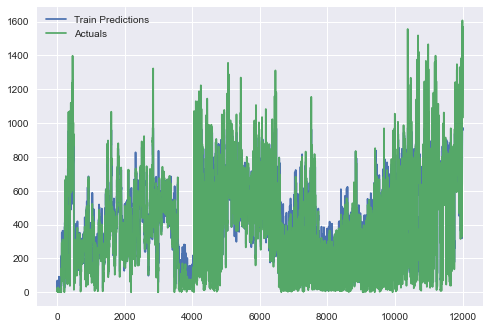

In [11]:
model = load_model('2H_Forecast/2H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(2,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 3 hours forecast

In [12]:
%%time

Trainer(3,6,12)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17920     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 8ms/step - loss: 249753.0625 - mean_absolute_error: 409.4987 - val_loss: 362439.7500 - val_mean_absolute_error: 487.7424
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 242956.7969 - mean_absolute_error: 401.1905 - val_loss: 351536.0312 - val_mean_absolute_error: 476.7814
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 6ms/step - loss: 232981.7500 - mean_absolute_error: 389.6683 - val_loss: 338628.0625 - val_mean_absolute_error: 464.2065
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 7ms/step - loss: 222971.4219 - mean_absolute_error: 378.5378 - val_loss: 327330.1562 - val_mean_absolute_error: 453.5025
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 7ms/step - loss: 214068.0156 - mean_absolute_error: 368.7118 - val_loss: 316364.8125 - val_mean_absolute_error: 443.1865
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 204723.6562 - mean_absolute_error: 358.6120 - val_loss: 304980.4375 - val_mean_absolute_error: 432.8991
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 195708.2656 - mean_absolute_error: 348.9982 - val_loss: 293761.7500 - val_mean_absolute_error: 422.7267
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 186662.2500 - mean_absolute_error: 339.3724 - val_loss: 282448.0938 - val_mean_absolute_error: 412.3960
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 7ms/step - loss: 177617.1719 - mean_absolute_error: 329.7470 - val_loss: 271068.8750 - val_mean_absolute_error: 401.9252
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 168611.5781 - mean_absolute_error: 319.7683 - val_loss: 259675.6719 - val_mean_absolute_error: 391.3579
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 159706.7344 - mean_absolute_error: 310.0517 - val_loss: 248375.7031 - val_mean_absolute_error: 380.6602
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 150943.4219 - mean_absolute_error: 300.0872 - val_loss: 237160.5625 - val_mean_absolute_error: 369.7868
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 7ms/step - loss: 142168.1562 - mean_absolute_error: 289.7574 - val_loss: 225638.7969 - val_mean_absolute_error: 358.4949
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 7ms/step - loss: 133649.3594 - mean_absolute_error: 279.9624 - val_loss: 214598.9688 - val_mean_absolute_error: 347.3217
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 7ms/step - loss: 125525.9609 - mean_absolute_error: 270.1097 - val_loss: 203935.3906 - val_mean_absolute_error: 336.2845
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 117729.1875 - mean_absolute_error: 260.4564 - val_loss: 193586.9844 - val_mean_absolute_error: 325.3668
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 110109.6406 - mean_absolute_error: 250.2705 - val_loss: 183121.2656 - val_mean_absolute_error: 314.0572
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 102789.7109 - mean_absolute_error: 240.7491 - val_loss: 173334.9219 - val_mean_absolute_error: 303.4990
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 7ms/step - loss: 96014.2578 - mean_absolute_error: 231.6386 - val_loss: 163940.5938 - val_mean_absolute_error: 293.1510
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 7ms/step - loss: 89606.2656 - mean_absolute_error: 222.4483 - val_loss: 154918.1562 - val_mean_absolute_error: 283.0541
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 83616.7578 - mean_absolute_error: 213.7770 - val_loss: 146255.2031 - val_mean_absolute_error: 273.1107
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 77906.6719 - mean_absolute_error: 204.6978 - val_loss: 137725.8125 - val_mean_absolute_error: 263.3907
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 72438.5625 - mean_absolute_error: 196.2491 - val_loss: 129674.8203 - val_mean_absolute_error: 253.9382
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 6ms/step - loss: 67498.3594 - mean_absolute_error: 188.2372 - val_loss: 122114.5938 - val_mean_absolute_error: 244.6148
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 7ms/step - loss: 62969.5391 - mean_absolute_error: 180.6417 - val_loss: 115008.4219 - val_mean_absolute_error: 236.5441
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 2s 7ms/step - loss: 58828.1523 - mean_absolute_error: 173.9391 - val_loss: 108160.4453 - val_mean_absolute_error: 227.2926
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 7ms/step - loss: 55079.1641 - mean_absolute_error: 167.3234 - val_loss: 101686.7656 - val_mean_absolute_error: 218.3071
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 51713.2578 - mean_absolute_error: 161.3790 - val_loss: 95844.5859 - val_mean_absolute_error: 210.7284
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 7ms/step - loss: 48620.7812 - mean_absolute_error: 155.1364 - val_loss: 90400.8516 - val_mean_absolute_error: 203.8448
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 45850.1680 - mean_absolute_error: 149.8212 - val_loss: 85468.1016 - val_mean_absolute_error: 196.6374
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 7ms/step - loss: 43461.1289 - mean_absolute_error: 145.2253 - val_loss: 80773.6250 - val_mean_absolute_error: 191.3070
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 41393.1328 - mean_absolute_error: 141.4385 - val_loss: 76464.5234 - val_mean_absolute_error: 185.2984
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 7ms/step - loss: 39514.2344 - mean_absolute_error: 137.4139 - val_loss: 72887.8750 - val_mean_absolute_error: 180.4508
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 37905.1484 - mean_absolute_error: 134.7313 - val_loss: 69223.5391 - val_mean_absolute_error: 175.9455
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 36406.3125 - mean_absolute_error: 131.4364 - val_loss: 65712.5781 - val_mean_absolute_error: 171.1765
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 2s 7ms/step - loss: 35102.9492 - mean_absolute_error: 128.6130 - val_loss: 62878.8594 - val_mean_absolute_error: 167.7958
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 6ms/step - loss: 33997.5547 - mean_absolute_error: 126.7911 - val_loss: 60094.9609 - val_mean_absolute_error: 164.1946
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 33068.9844 - mean_absolute_error: 124.8179 - val_loss: 58096.4219 - val_mean_absolute_error: 161.3274
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 32247.2793 - mean_absolute_error: 123.5224 - val_loss: 56027.3594 - val_mean_absolute_error: 158.5518
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 31555.6992 - mean_absolute_error: 121.8501 - val_loss: 54678.4297 - val_mean_absolute_error: 157.0023
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 30967.3828 - mean_absolute_error: 121.1423 - val_loss: 52246.0469 - val_mean_absolute_error: 153.7372
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 30441.2832 - mean_absolute_error: 119.6945 - val_loss: 51148.4102 - val_mean_absolute_error: 152.3701
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 29956.4492 - mean_absolute_error: 119.0639 - val_loss: 49265.5664 - val_mean_absolute_error: 150.1540
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 29494.1641 - mean_absolute_error: 117.5946 - val_loss: 48025.8398 - val_mean_absolute_error: 148.2193
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 29084.1543 - mean_absolute_error: 117.2790 - val_loss: 46729.1719 - val_mean_absolute_error: 146.2138
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 28770.8945 - mean_absolute_error: 116.0252 - val_loss: 46097.1836 - val_mean_absolute_error: 145.5110
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 28502.6309 - mean_absolute_error: 115.9599 - val_loss: 45228.2500 - val_mean_absolute_error: 144.1997
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 28220.0586 - mean_absolute_error: 115.2826 - val_loss: 44644.4180 - val_mean_absolute_error: 143.4821
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 28008.2812 - mean_absolute_error: 114.6783 - val_loss: 43799.3359 - val_mean_absolute_error: 142.3330
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 27830.3145 - mean_absolute_error: 114.8354 - val_loss: 42818.8945 - val_mean_absolute_error: 141.0469
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 27600.7695 - mean_absolute_error: 114.2721 - val_loss: 41931.3203 - val_mean_absolute_error: 140.1227
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 27427.2793 - mean_absolute_error: 113.7191 - val_loss: 41299.9297 - val_mean_absolute_error: 139.2565
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 7ms/step - loss: 27260.7891 - mean_absolute_error: 113.4224 - val_loss: 41417.7422 - val_mean_absolute_error: 138.9634
Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 27104.4023 - mean_absolute_error: 112.8482 - val_loss: 40381.3672 - val_mean_absolute_error: 137.6895
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 26969.7773 - mean_absolute_error: 112.9903 - val_loss: 39874.0391 - val_mean_absolute_error: 136.8594
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 26840.2617 - mean_absolute_error: 112.4921 - val_loss: 39738.3164 - val_mean_absolute_error: 136.3093
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 26687.6133 - mean_absolute_error: 112.1932 - val_loss: 38961.9492 - val_mean_absolute_error: 136.2049
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 26614.8301 - mean_absolute_error: 112.1190 - val_loss: 38547.5898 - val_mean_absolute_error: 135.3234
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 26513.6211 - mean_absolute_error: 112.0074 - val_loss: 38151.2930 - val_mean_absolute_error: 135.5665
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 26404.0938 - mean_absolute_error: 111.7491 - val_loss: 38198.6055 - val_mean_absolute_error: 134.2931
Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 26304.6445 - mean_absolute_error: 111.4621 - val_loss: 37572.4531 - val_mean_absolute_error: 133.7065
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 7ms/step - loss: 26227.2012 - mean_absolute_error: 111.2468 - val_loss: 37955.0156 - val_mean_absolute_error: 133.6360
Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 26158.8340 - mean_absolute_error: 111.1812 - val_loss: 37387.6680 - val_mean_absolute_error: 133.0707
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 7ms/step - loss: 26004.0781 - mean_absolute_error: 110.9599 - val_loss: 37001.6367 - val_mean_absolute_error: 132.6766
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 25943.1445 - mean_absolute_error: 110.6578 - val_loss: 37059.2266 - val_mean_absolute_error: 132.7160
Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 25873.8477 - mean_absolute_error: 110.7511 - val_loss: 36348.2148 - val_mean_absolute_error: 132.7332
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 25809.6035 - mean_absolute_error: 110.3974 - val_loss: 36294.4336 - val_mean_absolute_error: 133.0334
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 25682.4297 - mean_absolute_error: 110.3108 - val_loss: 36068.8242 - val_mean_absolute_error: 131.7488
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 25585.7734 - mean_absolute_error: 110.1590 - val_loss: 36192.5391 - val_mean_absolute_error: 131.3869
Epoch 70/100
376/376 [==============================] - 2s 7ms/step - loss: 25467.5312 - mean_absolute_error: 109.6783 - val_loss: 36185.7148 - val_mean_absolute_error: 131.6096
Epoch 71/100
376/376 [==============================] - 2s 7ms/step - loss: 25421.2070 - mean_absolute_error: 109.5338 - val_loss: 35653.8438 - val_mean_absolute_error: 131.3066
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 25346.8965 - mean_absolute_error: 109.5521 - val_loss: 35479.4609 - val_mean_absolute_error: 131.0715
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 25271.0996 - mean_absolute_error: 109.3361 - val_loss: 35778.3086 - val_mean_absolute_error: 130.5119
Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 25206.7168 - mean_absolute_error: 109.3099 - val_loss: 35267.1992 - val_mean_absolute_error: 131.4201
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 25163.5254 - mean_absolute_error: 108.9773 - val_loss: 34949.9023 - val_mean_absolute_error: 132.0597
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 25101.6621 - mean_absolute_error: 108.9871 - val_loss: 34796.5234 - val_mean_absolute_error: 130.4413
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 2s 7ms/step - loss: 24997.2891 - mean_absolute_error: 108.4016 - val_loss: 34673.8008 - val_mean_absolute_error: 130.8131
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 24982.6875 - mean_absolute_error: 108.5517 - val_loss: 35138.2578 - val_mean_absolute_error: 129.4766
Epoch 79/100
376/376 [==============================] - 2s 7ms/step - loss: 24907.6641 - mean_absolute_error: 108.1190 - val_loss: 34889.3945 - val_mean_absolute_error: 129.7415
Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 24844.8945 - mean_absolute_error: 107.9621 - val_loss: 34488.1172 - val_mean_absolute_error: 130.7047
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 24798.0566 - mean_absolute_error: 107.9485 - val_loss: 35147.1758 - val_mean_absolute_error: 129.2284
Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 24741.9766 - mean_absolute_error: 107.7044 - val_loss: 34448.8359 - val_mean_absolute_error: 128.5859
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 24697.4316 - mean_absolute_error: 107.6016 - val_loss: 34711.1289 - val_mean_absolute_error: 129.0064
Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 24718.1699 - mean_absolute_error: 107.7163 - val_loss: 34372.4609 - val_mean_absolute_error: 130.8020
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 24619.8438 - mean_absolute_error: 107.6584 - val_loss: 35620.4375 - val_mean_absolute_error: 129.9179
Epoch 86/100
376/376 [==============================] - 2s 6ms/step - loss: 24552.7930 - mean_absolute_error: 107.3580 - val_loss: 34613.4844 - val_mean_absolute_error: 130.1171
Epoch 87/100
376/376 [==============================] - 2s 6ms/step - loss: 24497.4238 - mean_absolute_error: 107.0170 - val_loss: 34126.0859 - val_mean_absolute_error: 128.9777
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 2s 6ms/step - loss: 24478.0273 - mean_absolute_error: 107.2607 - val_loss: 34036.8516 - val_mean_absolute_error: 129.0100
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 2s 6ms/step - loss: 24416.8066 - mean_absolute_error: 106.9696 - val_loss: 34294.9453 - val_mean_absolute_error: 128.6309
Epoch 90/100
376/376 [==============================] - 2s 7ms/step - loss: 24378.2578 - mean_absolute_error: 107.0319 - val_loss: 34280.7227 - val_mean_absolute_error: 128.1817
Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 24387.6582 - mean_absolute_error: 106.9034 - val_loss: 34392.0664 - val_mean_absolute_error: 128.2883
Epoch 92/100
376/376 [==============================] - 2s 6ms/step - loss: 24355.5332 - mean_absolute_error: 106.7146 - val_loss: 34213.9492 - val_mean_absolute_error: 128.1407
Epoch 93/100
376/376 [==============================] - 2s 6ms/step - loss: 24291.0703 - mean_absolute_error: 106.6105 - val_loss: 33622.3516 - val_mean_absolute_error: 127.8400
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 4s 10ms/step - loss: 24248.3906 - mean_absolute_error: 106.5173 - val_loss: 35422.1055 - val_mean_absolute_error: 129.5751
Epoch 95/100
376/376 [==============================] - 4s 12ms/step - loss: 24283.7129 - mean_absolute_error: 106.6372 - val_loss: 33917.0312 - val_mean_absolute_error: 127.9224
Epoch 96/100
376/376 [==============================] - 4s 10ms/step - loss: 24155.8301 - mean_absolute_error: 106.1700 - val_loss: 34044.0430 - val_mean_absolute_error: 129.6212
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 24150.8125 - mean_absolute_error: 106.1479 - val_loss: 33352.7852 - val_mean_absolute_error: 127.8952
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 24117.1309 - mean_absolute_error: 106.2269 - val_loss: 34214.3398 - val_mean_absolute_error: 128.5836
Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 24141.2402 - mean_absolute_error: 105.9939 - val_loss: 33832.4414 - val_mean_absolute_error: 127.0451
Epoch 100/100
376/376 [==============================] - 2s 7ms/step - loss: 24075.3008 - mean_absolute_error: 106.0490 - val_loss: 33817.6562 - val_mean_absolute_error: 127.6428

-----------------------------------------------------------------------------------------------------------

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
___

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 10ms/step - loss: 245858.5000 - mean_absolute_error: 404.4763 - val_loss: 356656.5000 - val_mean_absolute_error: 481.9444
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 239882.3438 - mean_absolute_error: 397.5800 - val_loss: 349485.1250 - val_mean_absolute_error: 474.9085
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 234382.5781 - mean_absolute_error: 391.3174 - val_loss: 343360.1250 - val_mean_absolute_error: 468.8965
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 9ms/step - loss: 229491.6094 - mean_absolute_error: 385.8038 - val_loss: 337539.9688 - val_mean_absolute_error: 463.2639
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 224525.6875 - mean_absolute_error: 380.2176 - val_loss: 331418.7188 - val_mean_absolute_error: 457.4498
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 219748.0156 - mean_absolute_error: 374.9367 - val_loss: 325607.8438 - val_mean_absolute_error: 451.9576
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 214694.3594 - mean_absolute_error: 369.4059 - val_loss: 319032.6562 - val_mean_absolute_error: 445.8248
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 209376.2656 - mean_absolute_error: 363.6272 - val_loss: 312518.4688 - val_mean_absolute_error: 439.8391
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 204026.4219 - mean_absolute_error: 357.8353 - val_loss: 306037.7812 - val_mean_absolute_error: 433.9506
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 198768.0469 - mean_absolute_error: 352.1813 - val_loss: 299493.6875 - val_mean_absolute_error: 427.9974
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 193100.5938 - mean_absolute_error: 346.0628 - val_loss: 292097.6250 - val_mean_absolute_error: 421.2784
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 187336.6875 - mean_absolute_error: 339.9162 - val_loss: 285129.0312 - val_mean_absolute_error: 414.9276
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 181787.6094 - mean_absolute_error: 333.9335 - val_loss: 278199.1875 - val_mean_absolute_error: 408.5869
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 176123.4844 - mean_absolute_error: 327.8448 - val_loss: 271023.5312 - val_mean_absolute_error: 402.0245
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 170545.0625 - mean_absolute_error: 321.7293 - val_loss: 264021.0938 - val_mean_absolute_error: 395.5373
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 164934.7500 - mean_absolute_error: 315.5628 - val_loss: 256756.0938 - val_mean_absolute_error: 388.7558
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 159257.7812 - mean_absolute_error: 309.2506 - val_loss: 249597.0938 - val_mean_absolute_error: 381.9442
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 153710.4062 - mean_absolute_error: 302.9105 - val_loss: 242502.2344 - val_mean_absolute_error: 375.2039
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 148222.3438 - mean_absolute_error: 296.5734 - val_loss: 235448.7500 - val_mean_absolute_error: 368.3256
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 142802.2031 - mean_absolute_error: 290.4044 - val_loss: 228443.7812 - val_mean_absolute_error: 361.3356
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 137481.7969 - mean_absolute_error: 283.9552 - val_loss: 221497.0156 - val_mean_absolute_error: 354.3421
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 11ms/step - loss: 132265.3594 - mean_absolute_error: 277.7295 - val_loss: 214648.9531 - val_mean_absolute_error: 347.3889
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 127158.3359 - mean_absolute_error: 271.5252 - val_loss: 207881.8906 - val_mean_absolute_error: 340.4963
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 122174.7656 - mean_absolute_error: 265.5272 - val_loss: 201252.9844 - val_mean_absolute_error: 333.4779
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 117284.1875 - mean_absolute_error: 259.1517 - val_loss: 194685.5000 - val_mean_absolute_error: 326.5499
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 112511.9766 - mean_absolute_error: 253.1711 - val_loss: 188240.6875 - val_mean_absolute_error: 319.7125
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 6ms/step - loss: 107875.7344 - mean_absolute_error: 247.1238 - val_loss: 181867.6094 - val_mean_absolute_error: 313.1208
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 103354.5234 - mean_absolute_error: 241.2379 - val_loss: 175660.0781 - val_mean_absolute_error: 306.3905
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 7ms/step - loss: 98948.2656 - mean_absolute_error: 235.1644 - val_loss: 169527.9688 - val_mean_absolute_error: 299.5859
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 94687.3438 - mean_absolute_error: 229.4957 - val_loss: 163560.7500 - val_mean_absolute_error: 292.7937
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 90565.7422 - mean_absolute_error: 223.4022 - val_loss: 157691.6875 - val_mean_absolute_error: 286.2107
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 86500.0156 - mean_absolute_error: 217.4520 - val_loss: 151692.2812 - val_mean_absolute_error: 279.4353
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 82216.3984 - mean_absolute_error: 210.8828 - val_loss: 145234.7812 - val_mean_absolute_error: 271.7474
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 78147.4609 - mean_absolute_error: 204.5750 - val_loss: 139478.4844 - val_mean_absolute_error: 264.5161
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 74319.5312 - mean_absolute_error: 198.3974 - val_loss: 133777.9531 - val_mean_absolute_error: 257.7863
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 70752.4688 - mean_absolute_error: 192.7983 - val_loss: 128360.1562 - val_mean_absolute_error: 251.2444
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 6ms/step - loss: 67420.6172 - mean_absolute_error: 187.5630 - val_loss: 123095.4531 - val_mean_absolute_error: 244.9416
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 7ms/step - loss: 64285.3203 - mean_absolute_error: 182.6434 - val_loss: 118193.1641 - val_mean_absolute_error: 239.0089
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 61346.3750 - mean_absolute_error: 177.8771 - val_loss: 113394.5547 - val_mean_absolute_error: 232.9309
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 58586.3477 - mean_absolute_error: 173.3215 - val_loss: 108842.0156 - val_mean_absolute_error: 227.0761
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 55949.6680 - mean_absolute_error: 168.6164 - val_loss: 104437.5234 - val_mean_absolute_error: 220.8975
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 53482.1602 - mean_absolute_error: 164.1661 - val_loss: 100122.3828 - val_mean_absolute_error: 215.6064
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 51160.7500 - mean_absolute_error: 159.9916 - val_loss: 96053.5391 - val_mean_absolute_error: 210.2821
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 49004.3516 - mean_absolute_error: 156.1411 - val_loss: 92294.8047 - val_mean_absolute_error: 204.7838
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 46925.2500 - mean_absolute_error: 152.1541 - val_loss: 88514.8516 - val_mean_absolute_error: 199.7542
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 45055.5938 - mean_absolute_error: 148.6154 - val_loss: 84868.6250 - val_mean_absolute_error: 195.1259
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 43409.0703 - mean_absolute_error: 145.4077 - val_loss: 81653.2812 - val_mean_absolute_error: 190.8925
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 7ms/step - loss: 41789.7109 - mean_absolute_error: 142.3403 - val_loss: 78823.0859 - val_mean_absolute_error: 187.2800
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 6ms/step - loss: 40365.7344 - mean_absolute_error: 139.8227 - val_loss: 76090.1250 - val_mean_absolute_error: 183.5470
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 7ms/step - loss: 39063.7383 - mean_absolute_error: 137.1287 - val_loss: 72769.5312 - val_mean_absolute_error: 179.3267
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 37825.5156 - mean_absolute_error: 134.4796 - val_loss: 71580.5156 - val_mean_absolute_error: 177.5693
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 36716.2617 - mean_absolute_error: 132.4014 - val_loss: 68156.5781 - val_mean_absolute_error: 173.6338
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 35719.0195 - mean_absolute_error: 130.5509 - val_loss: 65831.1562 - val_mean_absolute_error: 170.4988
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 34845.6016 - mean_absolute_error: 128.8276 - val_loss: 63469.8125 - val_mean_absolute_error: 168.0552
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 7ms/step - loss: 34082.0234 - mean_absolute_error: 127.1345 - val_loss: 61492.9219 - val_mean_absolute_error: 165.3888
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 33298.8281 - mean_absolute_error: 125.6998 - val_loss: 60029.4570 - val_mean_absolute_error: 163.6496
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 32671.1875 - mean_absolute_error: 124.4457 - val_loss: 58513.3438 - val_mean_absolute_error: 161.6025
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 32089.5410 - mean_absolute_error: 123.2294 - val_loss: 57038.0781 - val_mean_absolute_error: 160.0133
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 31506.9492 - mean_absolute_error: 121.7870 - val_loss: 55401.9688 - val_mean_absolute_error: 157.8879
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 31070.0957 - mean_absolute_error: 121.2121 - val_loss: 54341.3906 - val_mean_absolute_error: 155.8737
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 30562.5547 - mean_absolute_error: 119.9140 - val_loss: 53496.5039 - val_mean_absolute_error: 154.8054
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 30075.3496 - mean_absolute_error: 118.7645 - val_loss: 51968.5469 - val_mean_absolute_error: 153.1428
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 29704.9023 - mean_absolute_error: 118.0649 - val_loss: 51415.4727 - val_mean_absolute_error: 151.6571
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 29409.1855 - mean_absolute_error: 117.5110 - val_loss: 49699.1367 - val_mean_absolute_error: 149.3000
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 29009.8125 - mean_absolute_error: 116.3871 - val_loss: 48988.0273 - val_mean_absolute_error: 148.5572
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 28744.5156 - mean_absolute_error: 116.0140 - val_loss: 48189.8086 - val_mean_absolute_error: 147.5851
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 7ms/step - loss: 28491.0156 - mean_absolute_error: 115.5649 - val_loss: 47447.3047 - val_mean_absolute_error: 146.8813
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 28202.8477 - mean_absolute_error: 114.5934 - val_loss: 46876.5430 - val_mean_absolute_error: 145.9568
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 27928.2168 - mean_absolute_error: 114.2382 - val_loss: 45749.2500 - val_mean_absolute_error: 144.8581
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 6ms/step - loss: 27730.0938 - mean_absolute_error: 113.9002 - val_loss: 45457.3516 - val_mean_absolute_error: 144.0794
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 27477.4473 - mean_absolute_error: 113.0798 - val_loss: 44846.7656 - val_mean_absolute_error: 143.0087
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 27308.0273 - mean_absolute_error: 112.8364 - val_loss: 43549.9766 - val_mean_absolute_error: 142.1104
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 27166.2520 - mean_absolute_error: 112.2374 - val_loss: 43484.5508 - val_mean_absolute_error: 141.4339
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 26894.9121 - mean_absolute_error: 111.8974 - val_loss: 43022.3398 - val_mean_absolute_error: 140.5507
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 26620.2188 - mean_absolute_error: 111.2348 - val_loss: 42678.0273 - val_mean_absolute_error: 140.0172
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 26506.2305 - mean_absolute_error: 111.1931 - val_loss: 43320.4844 - val_mean_absolute_error: 140.9477
Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 26374.9727 - mean_absolute_error: 111.1710 - val_loss: 41781.2422 - val_mean_absolute_error: 138.3122
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 6ms/step - loss: 26123.8809 - mean_absolute_error: 110.3781 - val_loss: 41280.3789 - val_mean_absolute_error: 139.0423
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 25951.4961 - mean_absolute_error: 110.1432 - val_loss: 40643.7188 - val_mean_absolute_error: 136.7569
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 25853.9180 - mean_absolute_error: 109.7879 - val_loss: 40740.2383 - val_mean_absolute_error: 137.1806
Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 25888.4551 - mean_absolute_error: 109.7890 - val_loss: 40297.6250 - val_mean_absolute_error: 136.9376
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 25624.3848 - mean_absolute_error: 109.3213 - val_loss: 40772.0039 - val_mean_absolute_error: 137.6024
Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 25538.4375 - mean_absolute_error: 108.9969 - val_loss: 39618.6055 - val_mean_absolute_error: 135.2964
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 2s 7ms/step - loss: 25345.5586 - mean_absolute_error: 108.6223 - val_loss: 39454.3477 - val_mean_absolute_error: 134.9596
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 25209.9961 - mean_absolute_error: 108.3324 - val_loss: 39171.1914 - val_mean_absolute_error: 134.7934
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 25156.3281 - mean_absolute_error: 108.3478 - val_loss: 38990.0664 - val_mean_absolute_error: 135.4247
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 4s 9ms/step - loss: 25069.8008 - mean_absolute_error: 107.9508 - val_loss: 38716.5078 - val_mean_absolute_error: 135.6215
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 25098.4531 - mean_absolute_error: 108.3120 - val_loss: 39009.7930 - val_mean_absolute_error: 134.8822
Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 24972.3379 - mean_absolute_error: 107.7254 - val_loss: 38777.4648 - val_mean_absolute_error: 134.0871
Epoch 91/100
376/376 [==============================] - 3s 9ms/step - loss: 24806.1602 - mean_absolute_error: 107.3583 - val_loss: 38619.9062 - val_mean_absolute_error: 134.4619
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 24790.0176 - mean_absolute_error: 107.2676 - val_loss: 38019.9609 - val_mean_absolute_error: 132.8107
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 24683.4043 - mean_absolute_error: 107.2732 - val_loss: 37519.1055 - val_mean_absolute_error: 134.3972
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 24617.2754 - mean_absolute_error: 107.0441 - val_loss: 38491.2656 - val_mean_absolute_error: 133.5455
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 24580.4043 - mean_absolute_error: 107.0213 - val_loss: 38237.6602 - val_mean_absolute_error: 134.2734
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 24417.7383 - mean_absolute_error: 106.4256 - val_loss: 38007.5859 - val_mean_absolute_error: 132.5246
Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 24341.6738 - mean_absolute_error: 106.2256 - val_loss: 37091.7656 - val_mean_absolute_error: 131.6448
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 2s 7ms/step - loss: 24307.8594 - mean_absolute_error: 106.4121 - val_loss: 37079.0977 - val_mean_absolute_error: 130.2206
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 24315.2598 - mean_absolute_error: 106.2321 - val_loss: 36746.6758 - val_mean_absolute_error: 131.9309
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 24208.1367 - mean_absolute_error: 106.0360 - val_loss: 36272.4102 - val_mean_absolute_error: 129.8868
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 10ms/step - loss: 252127.6562 - mean_absolute_error: 412.1683 - val_loss: 365040.1562 - val_mean_absolute_error: 490.4140
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 246831.0781 - mean_absolute_error: 405.6916 - val_loss: 357908.7812 - val_mean_absolute_error: 483.2642
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 241457.6250 - mean_absolute_error: 399.5063 - val_loss: 352065.5000 - val_mean_absolute_error: 477.5197
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 237111.9375 - mean_absolute_error: 394.4559 - val_loss: 346874.6875 - val_mean_absolute_error: 472.2506
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 232166.6094 - mean_absolute_error: 388.8086 - val_loss: 340710.3125 - val_mean_absolute_error: 466.2847
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 227404.7969 - mean_absolute_error: 383.4590 - val_loss: 335137.0000 - val_mean_absolute_error: 460.9443
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 222828.4219 - mean_absolute_error: 378.3407 - val_loss: 329518.9688 - val_mean_absolute_error: 455.5811
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 218143.5469 - mean_absolute_error: 373.1655 - val_loss: 323733.0938 - val_mean_absolute_error: 450.1383
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 213327.0938 - mean_absolute_error: 367.8946 - val_loss: 317775.4375 - val_mean_absolute_error: 444.6073
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 208378.4531 - mean_absolute_error: 362.5155 - val_loss: 311621.0625 - val_mean_absolute_error: 438.9704
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 203315.2969 - mean_absolute_error: 357.0442 - val_loss: 305318.9062 - val_mean_absolute_error: 433.2417
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 198160.4844 - mean_absolute_error: 351.4789 - val_loss: 298898.6562 - val_mean_absolute_error: 427.4211
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 192924.4688 - mean_absolute_error: 345.8837 - val_loss: 292340.1562 - val_mean_absolute_error: 421.4566
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 187605.9375 - mean_absolute_error: 340.2014 - val_loss: 285675.7812 - val_mean_absolute_error: 415.3975
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 182239.6875 - mean_absolute_error: 334.4410 - val_loss: 278935.1875 - val_mean_absolute_error: 409.2236
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 176848.5938 - mean_absolute_error: 328.6046 - val_loss: 272131.5312 - val_mean_absolute_error: 403.0150
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 171434.2500 - mean_absolute_error: 322.7617 - val_loss: 265290.4375 - val_mean_absolute_error: 396.7510
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 166024.1094 - mean_absolute_error: 316.8053 - val_loss: 258417.9531 - val_mean_absolute_error: 390.3562
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 160618.0781 - mean_absolute_error: 310.8892 - val_loss: 251514.4062 - val_mean_absolute_error: 383.9278
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 155225.1562 - mean_absolute_error: 304.8083 - val_loss: 244213.2500 - val_mean_absolute_error: 376.8776
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 149384.1250 - mean_absolute_error: 298.1680 - val_loss: 236980.1406 - val_mean_absolute_error: 369.9538
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 143969.5938 - mean_absolute_error: 291.7559 - val_loss: 229993.7812 - val_mean_absolute_error: 363.0315
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 138653.6406 - mean_absolute_error: 285.5323 - val_loss: 223091.6719 - val_mean_absolute_error: 356.0695
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 133414.1250 - mean_absolute_error: 279.0432 - val_loss: 216196.1875 - val_mean_absolute_error: 349.0164
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 128265.1250 - mean_absolute_error: 272.6888 - val_loss: 209404.3594 - val_mean_absolute_error: 342.1009
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 123223.1562 - mean_absolute_error: 266.3406 - val_loss: 202716.7344 - val_mean_absolute_error: 335.1647
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 118290.1719 - mean_absolute_error: 260.3135 - val_loss: 196183.8125 - val_mean_absolute_error: 328.2104
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 113490.7422 - mean_absolute_error: 254.2355 - val_loss: 189640.8281 - val_mean_absolute_error: 321.3809
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 7ms/step - loss: 108802.4844 - mean_absolute_error: 248.2873 - val_loss: 183246.1875 - val_mean_absolute_error: 314.3734
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 9ms/step - loss: 104187.3281 - mean_absolute_error: 241.7154 - val_loss: 176935.4062 - val_mean_absolute_error: 307.4674
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 99724.9844 - mean_absolute_error: 235.9059 - val_loss: 170774.6562 - val_mean_absolute_error: 300.4758
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 95402.2734 - mean_absolute_error: 229.6622 - val_loss: 164752.9062 - val_mean_absolute_error: 293.8450
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 91200.7578 - mean_absolute_error: 223.6191 - val_loss: 158813.4062 - val_mean_absolute_error: 287.2416
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 87125.4453 - mean_absolute_error: 217.9671 - val_loss: 152934.6875 - val_mean_absolute_error: 280.3044
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 82986.2344 - mean_absolute_error: 211.9204 - val_loss: 146529.4062 - val_mean_absolute_error: 272.9568
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 78940.8516 - mean_absolute_error: 205.7390 - val_loss: 140888.1562 - val_mean_absolute_error: 266.7311
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 75235.7109 - mean_absolute_error: 200.2596 - val_loss: 135192.7969 - val_mean_absolute_error: 260.0882
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 71635.2422 - mean_absolute_error: 194.5769 - val_loss: 129775.5859 - val_mean_absolute_error: 253.7784
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 68310.8750 - mean_absolute_error: 189.4909 - val_loss: 124634.4375 - val_mean_absolute_error: 247.3027
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 65099.6289 - mean_absolute_error: 184.2583 - val_loss: 119546.8203 - val_mean_absolute_error: 241.3796
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 62005.2227 - mean_absolute_error: 178.9310 - val_loss: 114674.5859 - val_mean_absolute_error: 234.8176
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 59088.8438 - mean_absolute_error: 173.5646 - val_loss: 109844.8750 - val_mean_absolute_error: 228.4774
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 56389.7891 - mean_absolute_error: 169.1168 - val_loss: 105434.7422 - val_mean_absolute_error: 223.1439
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 53892.0469 - mean_absolute_error: 164.9303 - val_loss: 101163.1562 - val_mean_absolute_error: 217.8545
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 51558.1016 - mean_absolute_error: 161.0269 - val_loss: 97051.7812 - val_mean_absolute_error: 212.6269
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 49391.5273 - mean_absolute_error: 157.3586 - val_loss: 93198.7109 - val_mean_absolute_error: 207.5848
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 47388.8281 - mean_absolute_error: 153.4275 - val_loss: 89579.6094 - val_mean_absolute_error: 202.2309
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 45476.1406 - mean_absolute_error: 149.8884 - val_loss: 86016.3672 - val_mean_absolute_error: 198.0655
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 43743.2539 - mean_absolute_error: 146.6418 - val_loss: 82724.4688 - val_mean_absolute_error: 193.1250
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 42134.6211 - mean_absolute_error: 143.6771 - val_loss: 79764.3203 - val_mean_absolute_error: 189.9537
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 40628.6562 - mean_absolute_error: 140.9116 - val_loss: 76425.8125 - val_mean_absolute_error: 185.1137
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 39284.7148 - mean_absolute_error: 138.3980 - val_loss: 73622.7422 - val_mean_absolute_error: 181.6935
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 38059.8867 - mean_absolute_error: 136.1800 - val_loss: 71493.6562 - val_mean_absolute_error: 178.8110
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 36933.0703 - mean_absolute_error: 133.9213 - val_loss: 68736.9375 - val_mean_absolute_error: 175.2054
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 35920.1211 - mean_absolute_error: 131.9825 - val_loss: 66540.0781 - val_mean_absolute_error: 172.3779
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 34968.6328 - mean_absolute_error: 129.9701 - val_loss: 64462.3867 - val_mean_absolute_error: 170.0314
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 34098.1523 - mean_absolute_error: 128.4538 - val_loss: 62283.9258 - val_mean_absolute_error: 167.0383
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 33319.9102 - mean_absolute_error: 126.7555 - val_loss: 60598.9336 - val_mean_absolute_error: 165.1430
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 32660.4160 - mean_absolute_error: 125.7596 - val_loss: 58786.9844 - val_mean_absolute_error: 163.1450
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 32066.8594 - mean_absolute_error: 124.2733 - val_loss: 57103.1250 - val_mean_absolute_error: 160.9237
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 31461.9102 - mean_absolute_error: 123.2464 - val_loss: 56385.8477 - val_mean_absolute_error: 159.4000
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 30871.8848 - mean_absolute_error: 121.5050 - val_loss: 54642.1562 - val_mean_absolute_error: 157.4820
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 30375.6504 - mean_absolute_error: 120.8911 - val_loss: 53273.7070 - val_mean_absolute_error: 156.0918
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 29856.9277 - mean_absolute_error: 119.4256 - val_loss: 52010.0586 - val_mean_absolute_error: 153.2091
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 29393.9609 - mean_absolute_error: 118.0091 - val_loss: 51420.4023 - val_mean_absolute_error: 152.2724
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 28956.7383 - mean_absolute_error: 117.4372 - val_loss: 50125.7383 - val_mean_absolute_error: 150.1224
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 28527.5527 - mean_absolute_error: 116.6304 - val_loss: 49028.6914 - val_mean_absolute_error: 149.1176
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 28234.2910 - mean_absolute_error: 116.0824 - val_loss: 48533.1602 - val_mean_absolute_error: 149.0867
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 27956.8184 - mean_absolute_error: 115.4941 - val_loss: 47319.1367 - val_mean_absolute_error: 146.7657
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 27690.3477 - mean_absolute_error: 114.8946 - val_loss: 46191.6992 - val_mean_absolute_error: 146.8441
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 27509.3379 - mean_absolute_error: 114.6746 - val_loss: 45793.4688 - val_mean_absolute_error: 144.6581
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 27223.9492 - mean_absolute_error: 113.8516 - val_loss: 45351.8633 - val_mean_absolute_error: 144.8788
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 27039.7012 - mean_absolute_error: 113.5099 - val_loss: 44445.6055 - val_mean_absolute_error: 143.9346
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 26847.3027 - mean_absolute_error: 113.0758 - val_loss: 44011.3789 - val_mean_absolute_error: 144.0879
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 26663.3203 - mean_absolute_error: 112.5066 - val_loss: 43370.4531 - val_mean_absolute_error: 142.0182
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 26486.3027 - mean_absolute_error: 111.9203 - val_loss: 43264.5391 - val_mean_absolute_error: 142.2801
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 26198.2969 - mean_absolute_error: 111.3196 - val_loss: 42842.5547 - val_mean_absolute_error: 140.6336
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 25952.0078 - mean_absolute_error: 110.4819 - val_loss: 43446.1602 - val_mean_absolute_error: 141.0089
Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 25725.3965 - mean_absolute_error: 110.1821 - val_loss: 43019.8047 - val_mean_absolute_error: 140.0841
Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 25570.4961 - mean_absolute_error: 109.8171 - val_loss: 42772.5430 - val_mean_absolute_error: 140.4774
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 25436.7363 - mean_absolute_error: 109.3264 - val_loss: 41481.1836 - val_mean_absolute_error: 138.9995
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 25251.8691 - mean_absolute_error: 108.7954 - val_loss: 41528.3750 - val_mean_absolute_error: 137.8321
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 25111.0703 - mean_absolute_error: 108.6424 - val_loss: 41315.5977 - val_mean_absolute_error: 137.5685
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 25038.6777 - mean_absolute_error: 108.4621 - val_loss: 40764.1797 - val_mean_absolute_error: 137.4257
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 24906.9023 - mean_absolute_error: 108.0142 - val_loss: 40011.2539 - val_mean_absolute_error: 137.6904
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 24723.0195 - mean_absolute_error: 107.6935 - val_loss: 39974.6484 - val_mean_absolute_error: 136.6622
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 24681.4043 - mean_absolute_error: 107.5453 - val_loss: 39781.8086 - val_mean_absolute_error: 136.5876
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 24582.7188 - mean_absolute_error: 107.2721 - val_loss: 39997.6875 - val_mean_absolute_error: 136.9157
Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 24487.3711 - mean_absolute_error: 106.8130 - val_loss: 39544.4102 - val_mean_absolute_error: 136.5017
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 24398.8496 - mean_absolute_error: 106.4797 - val_loss: 39566.0195 - val_mean_absolute_error: 136.6507
Epoch 91/100
376/376 [==============================] - 2s 7ms/step - loss: 24284.9004 - mean_absolute_error: 106.3247 - val_loss: 38883.6328 - val_mean_absolute_error: 134.5263
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 24207.8105 - mean_absolute_error: 105.9315 - val_loss: 39506.7461 - val_mean_absolute_error: 135.1322
Epoch 93/100
376/376 [==============================] - 4s 10ms/step - loss: 24098.2227 - mean_absolute_error: 105.8157 - val_loss: 38962.8359 - val_mean_absolute_error: 135.1348
Epoch 94/100
376/376 [==============================] - 4s 10ms/step - loss: 24105.2051 - mean_absolute_error: 105.7203 - val_loss: 40287.7617 - val_mean_absolute_error: 135.6830
Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 24018.4551 - mean_absolute_error: 105.4963 - val_loss: 39887.4023 - val_mean_absolute_error: 134.7765
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 23861.8711 - mean_absolute_error: 105.1576 - val_loss: 38100.3594 - val_mean_absolute_error: 134.2464
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 23826.4668 - mean_absolute_error: 105.0400 - val_loss: 39530.6289 - val_mean_absolute_error: 134.7094
Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 23783.3359 - mean_absolute_error: 104.8619 - val_loss: 38513.2188 - val_mean_absolute_error: 133.8497
Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 23715.4219 - mean_absolute_error: 104.5836 - val_loss: 37284.4062 - val_mean_absolute_error: 133.0253
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 23674.2383 - mean_absolute_error: 104.3020 - val_loss: 37069.0234 - val_mean_absolute_error: 134.4270
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 9ms/step - loss: 251707.2344 - mean_absolute_error: 411.5224 - val_loss: 364019.0938 - val_mean_absolute_error: 489.2118
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 244387.8125 - mean_absolute_error: 402.6161 - val_loss: 352874.6250 - val_mean_absolute_error: 478.0033
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 235573.5312 - mean_absolute_error: 392.6486 - val_loss: 343511.1562 - val_mean_absolute_error: 468.9735
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 228922.1406 - mean_absolute_error: 385.1596 - val_loss: 336142.5312 - val_mean_absolute_error: 461.8611
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 222914.8125 - mean_absolute_error: 378.3974 - val_loss: 328856.0312 - val_mean_absolute_error: 454.8906
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 216813.5156 - mean_absolute_error: 371.6561 - val_loss: 321357.0938 - val_mean_absolute_error: 447.8434
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 210555.5938 - mean_absolute_error: 364.7772 - val_loss: 313638.3750 - val_mean_absolute_error: 440.7220
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 204119.8281 - mean_absolute_error: 357.7903 - val_loss: 305581.0625 - val_mean_absolute_error: 433.3494
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 197175.6094 - mean_absolute_error: 350.2610 - val_loss: 296875.8750 - val_mean_absolute_error: 425.4777
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 190331.4844 - mean_absolute_error: 342.8757 - val_loss: 288414.9062 - val_mean_absolute_error: 417.7750
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 183498.0312 - mean_absolute_error: 335.5753 - val_loss: 279862.6875 - val_mean_absolute_error: 409.9893
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 176635.8906 - mean_absolute_error: 328.0855 - val_loss: 271230.5000 - val_mean_absolute_error: 402.1356
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 169776.7656 - mean_absolute_error: 320.5873 - val_loss: 262599.6875 - val_mean_absolute_error: 394.2805
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 162949.0156 - mean_absolute_error: 312.9286 - val_loss: 253943.8594 - val_mean_absolute_error: 386.2068
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 156185.4531 - mean_absolute_error: 305.3461 - val_loss: 245358.5781 - val_mean_absolute_error: 378.1390
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 149495.3281 - mean_absolute_error: 297.6904 - val_loss: 236779.1875 - val_mean_absolute_error: 369.9390
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 142892.8281 - mean_absolute_error: 290.0417 - val_loss: 228246.8750 - val_mean_absolute_error: 361.4788
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 136407.6250 - mean_absolute_error: 282.3245 - val_loss: 219853.7344 - val_mean_absolute_error: 353.1634
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 130084.7812 - mean_absolute_error: 274.8120 - val_loss: 211561.0625 - val_mean_absolute_error: 344.8309
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 123954.1719 - mean_absolute_error: 267.4758 - val_loss: 203444.5625 - val_mean_absolute_error: 336.3929
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 117981.0312 - mean_absolute_error: 259.8816 - val_loss: 195454.9219 - val_mean_absolute_error: 328.0609
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 112201.8125 - mean_absolute_error: 252.8600 - val_loss: 187704.8438 - val_mean_absolute_error: 319.7279
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 106652.1875 - mean_absolute_error: 245.6111 - val_loss: 180144.0625 - val_mean_absolute_error: 311.8117
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 101286.9922 - mean_absolute_error: 238.5792 - val_loss: 172723.0000 - val_mean_absolute_error: 303.9196
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 96119.4297 - mean_absolute_error: 231.5431 - val_loss: 165473.0312 - val_mean_absolute_error: 296.2513
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 91133.0234 - mean_absolute_error: 224.4191 - val_loss: 158413.7969 - val_mean_absolute_error: 288.1748
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 86332.7578 - mean_absolute_error: 217.3281 - val_loss: 151596.6250 - val_mean_absolute_error: 280.9566
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 81752.4375 - mean_absolute_error: 210.5183 - val_loss: 144747.3438 - val_mean_absolute_error: 272.5763
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 77288.0781 - mean_absolute_error: 203.4807 - val_loss: 138159.0312 - val_mean_absolute_error: 264.8957
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 73034.0938 - mean_absolute_error: 196.6354 - val_loss: 131729.4375 - val_mean_absolute_error: 257.6827
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 69045.2734 - mean_absolute_error: 189.8648 - val_loss: 125727.3828 - val_mean_absolute_error: 249.9551
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 65313.6133 - mean_absolute_error: 183.7605 - val_loss: 119782.1172 - val_mean_absolute_error: 243.1766
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 61856.2852 - mean_absolute_error: 178.0721 - val_loss: 114234.5469 - val_mean_absolute_error: 235.8414
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 58576.7695 - mean_absolute_error: 172.3728 - val_loss: 108863.8984 - val_mean_absolute_error: 229.1126
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 55526.5000 - mean_absolute_error: 166.8252 - val_loss: 103733.1484 - val_mean_absolute_error: 222.0909
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 52743.4375 - mean_absolute_error: 161.9497 - val_loss: 98921.8203 - val_mean_absolute_error: 216.0689
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 50181.8945 - mean_absolute_error: 157.6586 - val_loss: 94469.7266 - val_mean_absolute_error: 210.8643
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 47875.3047 - mean_absolute_error: 153.4275 - val_loss: 90226.6328 - val_mean_absolute_error: 205.1086
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 45762.2812 - mean_absolute_error: 149.3649 - val_loss: 86252.6562 - val_mean_absolute_error: 199.8503
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 43758.4766 - mean_absolute_error: 145.0037 - val_loss: 82357.3047 - val_mean_absolute_error: 194.5384
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 41986.4375 - mean_absolute_error: 141.6251 - val_loss: 78834.2812 - val_mean_absolute_error: 189.7368
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 40388.4531 - mean_absolute_error: 138.8025 - val_loss: 75623.0469 - val_mean_absolute_error: 185.5138
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 38985.2188 - mean_absolute_error: 136.0881 - val_loss: 72767.2891 - val_mean_absolute_error: 181.7294
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 37677.2695 - mean_absolute_error: 133.3111 - val_loss: 69889.7188 - val_mean_absolute_error: 179.2444
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 36473.7266 - mean_absolute_error: 131.0226 - val_loss: 67230.0703 - val_mean_absolute_error: 175.8764
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 35444.7266 - mean_absolute_error: 129.1075 - val_loss: 64922.4297 - val_mean_absolute_error: 172.4086
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 34513.1484 - mean_absolute_error: 127.1024 - val_loss: 62775.6914 - val_mean_absolute_error: 169.5083
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 33650.2930 - mean_absolute_error: 125.6750 - val_loss: 60732.5586 - val_mean_absolute_error: 166.6527
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 32893.6367 - mean_absolute_error: 123.7989 - val_loss: 59023.4648 - val_mean_absolute_error: 164.1014
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 32086.2227 - mean_absolute_error: 121.9328 - val_loss: 56865.3984 - val_mean_absolute_error: 160.9612
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 31357.8359 - mean_absolute_error: 120.2228 - val_loss: 55259.4297 - val_mean_absolute_error: 159.0176
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 30787.5254 - mean_absolute_error: 119.3259 - val_loss: 53890.9531 - val_mean_absolute_error: 156.8242
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 30282.6211 - mean_absolute_error: 118.3025 - val_loss: 52488.9453 - val_mean_absolute_error: 155.4396
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 29811.8281 - mean_absolute_error: 117.4392 - val_loss: 51727.6758 - val_mean_absolute_error: 153.9239
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 29394.0020 - mean_absolute_error: 116.4480 - val_loss: 50009.1719 - val_mean_absolute_error: 152.2561
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 28996.8379 - mean_absolute_error: 115.7779 - val_loss: 50279.2930 - val_mean_absolute_error: 151.6261
Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 28625.8027 - mean_absolute_error: 114.7517 - val_loss: 47999.0430 - val_mean_absolute_error: 149.6208
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 28302.0820 - mean_absolute_error: 114.4858 - val_loss: 47199.8086 - val_mean_absolute_error: 147.9668
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 27973.2910 - mean_absolute_error: 113.6998 - val_loss: 47187.1914 - val_mean_absolute_error: 147.4919
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 27698.5098 - mean_absolute_error: 113.2526 - val_loss: 45904.6094 - val_mean_absolute_error: 146.1865
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 27351.8281 - mean_absolute_error: 112.0039 - val_loss: 45389.9141 - val_mean_absolute_error: 144.8432
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 26973.2148 - mean_absolute_error: 111.3206 - val_loss: 44282.2539 - val_mean_absolute_error: 143.3394
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 9ms/step - loss: 26671.3066 - mean_absolute_error: 110.6237 - val_loss: 44524.7812 - val_mean_absolute_error: 143.3700
Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 26364.5293 - mean_absolute_error: 110.0800 - val_loss: 42919.4648 - val_mean_absolute_error: 142.1399
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 26166.6914 - mean_absolute_error: 109.5708 - val_loss: 42084.1914 - val_mean_absolute_error: 140.6363
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 25901.8418 - mean_absolute_error: 108.9329 - val_loss: 41743.7266 - val_mean_absolute_error: 139.9797
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 25663.5840 - mean_absolute_error: 108.4690 - val_loss: 42092.8672 - val_mean_absolute_error: 139.8902
Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 25336.0410 - mean_absolute_error: 107.5533 - val_loss: 41702.1641 - val_mean_absolute_error: 138.3899
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 25129.4766 - mean_absolute_error: 106.8340 - val_loss: 40411.3359 - val_mean_absolute_error: 137.4346
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 24975.0410 - mean_absolute_error: 106.2947 - val_loss: 39870.7656 - val_mean_absolute_error: 136.3823
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 24762.6641 - mean_absolute_error: 106.1902 - val_loss: 41595.9766 - val_mean_absolute_error: 137.6604
Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 24575.1602 - mean_absolute_error: 105.5762 - val_loss: 40211.2500 - val_mean_absolute_error: 136.2019
Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 24399.8145 - mean_absolute_error: 105.0387 - val_loss: 41169.0039 - val_mean_absolute_error: 137.2677
Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 24667.0234 - mean_absolute_error: 105.4156 - val_loss: 41869.5547 - val_mean_absolute_error: 137.5883
Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 24383.7715 - mean_absolute_error: 104.9103 - val_loss: 41276.6289 - val_mean_absolute_error: 136.7251
Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 24249.0605 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 24058.3320 - mean_absolute_error: 103.8848 - val_loss: 41168.5586 - val_mean_absolute_error: 136.5573
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 23916.0801 - mean_absolute_error: 103.7125 - val_loss: 39141.0508 - val_mean_absolute_error: 134.0985
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 23744.0371 - mean_absolute_error: 103.3999 - val_loss: 38278.3750 - val_mean_absolute_error: 134.0684
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 23640.2051 - mean_absolute_error: 103.0068 - val_loss: 39687.7266 - val_mean_absolute_error: 134.1121
Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 23467.0625 - mean_absolute_error: 102.8752 - val_loss: 42425.1250 - val_mean_absolute_error: 135.0930
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 23427.1445 - mean_absolute_error: 102.6874 - val_loss: 39324.0508 - val_mean_absolute_error: 133.2572
Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 23350.0938 - mean_absolute_error: 102.3104 - val_loss: 39193.2930 - val_mean_absolute_error: 133.2428
Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 23111.8887 - mean_absolute_error: 101.8123 - val_loss: 37285.3750 - val_mean_absolute_error: 131.8171
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 23063.4121 - mean_absolute_error: 101.8822 - val_loss: 40342.0664 - val_mean_absolute_error: 134.5825
Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 22957.4277 - mean_absolute_error: 101.6792 - val_loss: 38891.9219 - val_mean_absolute_error: 132.4932
Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 22927.0371 - mean_absolute_error: 101.4153 - val_loss: 42053.6445 - val_mean_absolute_error: 134.1443
Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 22889.0742 - mean_absolute_error: 101.3452 - val_loss: 35957.0625 - val_mean_absolute_error: 130.1400
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 22706.4297 - mean_absolute_error: 100.8113 - val_loss: 38372.1758 - val_mean_absolute_error: 131.5195
Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 22730.4668 - mean_absolute_error: 100.8267 - val_loss: 37340.3984 - val_mean_absolute_error: 130.9215
Epoch 91/100
376/376 [==============================] - 4s 10ms/step - loss: 22643.1562 - mean_absolute_error: 100.6950 - val_loss: 38590.5742 - val_mean_absolute_error: 131.6893
Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 22489.2969 - mean_absolute_error: 100.4079 - val_loss: 37979.1094 - val_mean_absolute_error: 131.7528
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 22488.3887 - mean_absolute_error: 100.1781 - val_loss: 36158.6719 - val_mean_absolute_error: 129.4673
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 22398.9688 - mean_absolute_erro

In [13]:
%%time

modelsEvaluator(3,6,12)

(12009, 6, 5) (12009,) (4003, 6, 5) (4003,) (4004, 6, 5) (4004,)
Loading: 3H_Forecast/3H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 34248.6680 - mean_absolute_error: 128.1071
(12009, 7, 5) (12009,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 34205.1289 - mean_absolute_error: 127.3765
(12008, 8, 5) (12008,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 33494.2773 - mean_absolute_error: 123.3272A: 0s - loss: 33364.9844 - mean_absolute_error: 123.029
(12007, 9, 5) (12007,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 30950.9355 - mean_absolute_error: 120.9551
CPU times: total: 55.1 s
Wall time: 34.5 s


126/126 [==============================] - 1s 2ms/step - loss: 30950.9355 - mean_absolute_error: 120.9551


,Test Predictions,Actuals
0,673.065735,443.681667
1,332.627014,452.508000
2,442.430664,354.636000
3,362.611633,308.158333
4,386.150391,252.036667
5,270.321167,234.740000
6,239.692062,188.511667
7,189.181839,136.190000
8,200.445618,150.125000
9,131.161285,151.265000


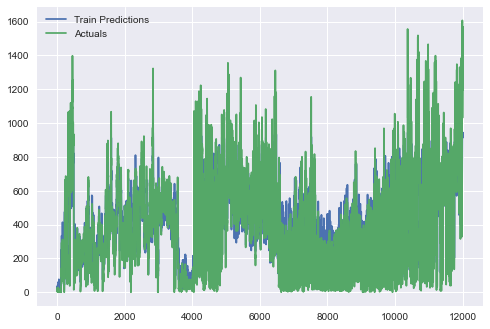

In [14]:
model = load_model('3H_Forecast/3H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(3,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 4 hours forecast

In [15]:
%%time

Trainer(4,6,12)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 9ms/step - loss: 252540.2344 - mean_absolute_error: 412.6982 - val_loss: 365989.7812 - val_mean_absolute_error: 491.4184
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 6ms/step - loss: 247991.7812 - mean_absolute_error: 407.0689 - val_loss: 358505.3125 - val_mean_absolute_error: 483.8359
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 5ms/step - loss: 241254.3438 - mean_absolute_error: 399.1537 - val_loss: 350743.9688 - val_mean_absolute_error: 476.0729
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 5ms/step - loss: 234425.5625 - mean_absolute_error: 391.3771 - val_loss: 342789.0000 - val_mean_absolute_error: 468.3780
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 228730.7031 - mean_absolute_error: 384.9346 - val_loss: 336019.0000 - val_mean_absolute_error: 461.8598
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 223080.8438 - mean_absolute_error: 378.6370 - val_loss: 329051.1250 - val_mean_absolute_error: 455.2091
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 217248.1719 - mean_absolute_error: 372.1936 - val_loss: 321817.5000 - val_mean_absolute_error: 448.4174
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 211229.5625 - mean_absolute_error: 365.6313 - val_loss: 314337.1875 - val_mean_absolute_error: 441.5159
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 205034.7656 - mean_absolute_error: 358.9555 - val_loss: 306597.8125 - val_mean_absolute_error: 434.4480
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 198434.1250 - mean_absolute_error: 351.8506 - val_loss: 298275.1875 - val_mean_absolute_error: 426.9077
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 6ms/step - loss: 191847.9375 - mean_absolute_error: 344.8254 - val_loss: 290095.0312 - val_mean_absolute_error: 419.4569
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 185230.7031 - mean_absolute_error: 337.8171 - val_loss: 281784.8750 - val_mean_absolute_error: 411.8867
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 178594.4219 - mean_absolute_error: 330.8069 - val_loss: 273411.6250 - val_mean_absolute_error: 404.2541
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 6ms/step - loss: 171958.7031 - mean_absolute_error: 323.7462 - val_loss: 265000.9375 - val_mean_absolute_error: 396.5996
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 165351.5000 - mean_absolute_error: 316.6657 - val_loss: 256580.3594 - val_mean_absolute_error: 388.8335
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 158763.9531 - mean_absolute_error: 309.6608 - val_loss: 247742.1406 - val_mean_absolute_error: 380.6930
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 151885.8438 - mean_absolute_error: 302.2032 - val_loss: 239208.5312 - val_mean_absolute_error: 372.7046
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 6ms/step - loss: 145440.8750 - mean_absolute_error: 295.1938 - val_loss: 230879.1250 - val_mean_absolute_error: 364.8476
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 6ms/step - loss: 139163.4219 - mean_absolute_error: 288.2327 - val_loss: 222673.2344 - val_mean_absolute_error: 356.9896
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 6ms/step - loss: 133059.1250 - mean_absolute_error: 281.3740 - val_loss: 214634.8281 - val_mean_absolute_error: 349.2031
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 127096.2109 - mean_absolute_error: 274.3316 - val_loss: 206767.3281 - val_mean_absolute_error: 341.3930
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 2s 6ms/step - loss: 121303.3125 - mean_absolute_error: 267.4447 - val_loss: 198997.2500 - val_mean_absolute_error: 333.6184
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 6ms/step - loss: 115742.6953 - mean_absolute_error: 260.9387 - val_loss: 191476.6719 - val_mean_absolute_error: 326.0616
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 6ms/step - loss: 110419.5781 - mean_absolute_error: 254.4995 - val_loss: 184180.4219 - val_mean_absolute_error: 318.7068
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 6ms/step - loss: 105319.2734 - mean_absolute_error: 248.3798 - val_loss: 177147.3281 - val_mean_absolute_error: 311.6470
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 2s 5ms/step - loss: 100468.7656 - mean_absolute_error: 242.4236 - val_loss: 170352.7344 - val_mean_absolute_error: 304.5712
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 6ms/step - loss: 95821.1797 - mean_absolute_error: 236.1510 - val_loss: 163737.3906 - val_mean_absolute_error: 297.7393
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 91348.8359 - mean_absolute_error: 229.8077 - val_loss: 157240.1875 - val_mean_absolute_error: 291.0181
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 6ms/step - loss: 87114.8984 - mean_absolute_error: 224.2005 - val_loss: 150909.1562 - val_mean_absolute_error: 283.7687
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 83119.0781 - mean_absolute_error: 218.4453 - val_loss: 144933.0000 - val_mean_absolute_error: 277.6089
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 6ms/step - loss: 79167.0547 - mean_absolute_error: 212.5917 - val_loss: 138716.5938 - val_mean_absolute_error: 270.5808
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 75446.8359 - mean_absolute_error: 206.6610 - val_loss: 133137.0156 - val_mean_absolute_error: 264.9125
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 6ms/step - loss: 72001.0156 - mean_absolute_error: 201.0052 - val_loss: 127460.4688 - val_mean_absolute_error: 257.6461
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 2s 6ms/step - loss: 68644.3906 - mean_absolute_error: 195.6868 - val_loss: 121839.5000 - val_mean_absolute_error: 250.5961
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 6ms/step - loss: 65492.2773 - mean_absolute_error: 190.1136 - val_loss: 116796.4766 - val_mean_absolute_error: 245.1015
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 2s 6ms/step - loss: 62652.0508 - mean_absolute_error: 185.1930 - val_loss: 111904.7734 - val_mean_absolute_error: 239.2926
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 6ms/step - loss: 60094.8398 - mean_absolute_error: 181.0009 - val_loss: 107238.0625 - val_mean_absolute_error: 233.3966
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 6ms/step - loss: 57784.3203 - mean_absolute_error: 177.2747 - val_loss: 102916.4062 - val_mean_absolute_error: 227.8087
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 6ms/step - loss: 55696.1016 - mean_absolute_error: 173.2772 - val_loss: 98916.3516 - val_mean_absolute_error: 222.6503
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 6ms/step - loss: 53687.0781 - mean_absolute_error: 168.9487 - val_loss: 95012.8359 - val_mean_absolute_error: 217.7943
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 51892.3945 - mean_absolute_error: 165.4424 - val_loss: 91462.9688 - val_mean_absolute_error: 212.3097
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 50244.2461 - mean_absolute_error: 162.2396 - val_loss: 87951.4688 - val_mean_absolute_error: 208.3996
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 2s 6ms/step - loss: 48824.1602 - mean_absolute_error: 159.9484 - val_loss: 84893.9609 - val_mean_absolute_error: 204.2317
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 47492.4805 - mean_absolute_error: 156.8021 - val_loss: 82015.3906 - val_mean_absolute_error: 200.3570
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 46236.6719 - mean_absolute_error: 154.3248 - val_loss: 79382.6406 - val_mean_absolute_error: 197.0166
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 6ms/step - loss: 45193.2734 - mean_absolute_error: 152.6696 - val_loss: 76882.2188 - val_mean_absolute_error: 194.7597
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 6ms/step - loss: 44255.8008 - mean_absolute_error: 150.9781 - val_loss: 74596.8984 - val_mean_absolute_error: 191.3888
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 6ms/step - loss: 43440.7734 - mean_absolute_error: 149.1963 - val_loss: 73472.3047 - val_mean_absolute_error: 189.8386
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 6ms/step - loss: 42716.2578 - mean_absolute_error: 148.0736 - val_loss: 71220.7031 - val_mean_absolute_error: 187.2437
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 6ms/step - loss: 42034.4297 - mean_absolute_error: 146.8375 - val_loss: 68815.5938 - val_mean_absolute_error: 184.8968
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 41397.0703 - mean_absolute_error: 145.3642 - val_loss: 67376.9609 - val_mean_absolute_error: 182.6327
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 40801.9609 - mean_absolute_error: 144.0268 - val_loss: 65901.2734 - val_mean_absolute_error: 180.6265
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 40298.4258 - mean_absolute_error: 143.0278 - val_loss: 64604.3672 - val_mean_absolute_error: 178.8640
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 2s 6ms/step - loss: 39823.0078 - mean_absolute_error: 141.9358 - val_loss: 63527.5820 - val_mean_absolute_error: 177.0782
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 2s 6ms/step - loss: 39321.8828 - mean_absolute_error: 140.7064 - val_loss: 62251.1250 - val_mean_absolute_error: 175.3533
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 6ms/step - loss: 38907.9102 - mean_absolute_error: 139.9079 - val_loss: 60911.7930 - val_mean_absolute_error: 174.1256
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 38451.3125 - mean_absolute_error: 139.3442 - val_loss: 60513.9648 - val_mean_absolute_error: 172.6704
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 2s 6ms/step - loss: 38152.3203 - mean_absolute_error: 138.4782 - val_loss: 58671.7969 - val_mean_absolute_error: 171.0923
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 7ms/step - loss: 37818.5703 - mean_absolute_error: 138.1931 - val_loss: 58581.3086 - val_mean_absolute_error: 170.1575
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 37592.0156 - mean_absolute_error: 137.5157 - val_loss: 57517.9023 - val_mean_absolute_error: 169.6249
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 6ms/step - loss: 37344.5742 - mean_absolute_error: 137.3612 - val_loss: 56613.6953 - val_mean_absolute_error: 168.5838
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 6ms/step - loss: 37136.9492 - mean_absolute_error: 137.0559 - val_loss: 56447.4609 - val_mean_absolute_error: 167.7359
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 6ms/step - loss: 36938.4570 - mean_absolute_error: 136.5578 - val_loss: 55197.1016 - val_mean_absolute_error: 166.9819
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 36737.1016 - mean_absolute_error: 136.3558 - val_loss: 54773.4102 - val_mean_absolute_error: 166.7748
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 6ms/step - loss: 36570.3359 - mean_absolute_error: 136.0416 - val_loss: 54675.3008 - val_mean_absolute_error: 165.8684
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 2s 6ms/step - loss: 36382.8555 - mean_absolute_error: 135.6621 - val_loss: 53914.9961 - val_mean_absolute_error: 165.3854
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 36204.9102 - mean_absolute_error: 135.3026 - val_loss: 53535.8828 - val_mean_absolute_error: 164.2535
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 6ms/step - loss: 36040.2617 - mean_absolute_error: 134.9964 - val_loss: 52971.7773 - val_mean_absolute_error: 164.6178
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 6ms/step - loss: 35872.8359 - mean_absolute_error: 134.5707 - val_loss: 52913.2461 - val_mean_absolute_error: 162.7532
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 6ms/step - loss: 35695.9570 - mean_absolute_error: 134.1882 - val_loss: 52099.0078 - val_mean_absolute_error: 162.4887
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 6ms/step - loss: 35528.7188 - mean_absolute_error: 133.9997 - val_loss: 51882.3750 - val_mean_absolute_error: 163.2188
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 35414.0508 - mean_absolute_error: 133.9334 - val_loss: 51430.1836 - val_mean_absolute_error: 162.3775
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 2s 6ms/step - loss: 35291.9805 - mean_absolute_error: 133.8643 - val_loss: 51335.8164 - val_mean_absolute_error: 161.6975
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 6ms/step - loss: 35164.1406 - mean_absolute_error: 133.4455 - val_loss: 51254.8203 - val_mean_absolute_error: 161.6953
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 2s 6ms/step - loss: 35022.8008 - mean_absolute_error: 133.2260 - val_loss: 50289.8633 - val_mean_absolute_error: 161.5921
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 6ms/step - loss: 34929.3008 - mean_absolute_error: 132.3486 - val_loss: 50513.5664 - val_mean_absolute_error: 160.3304
Epoch 77/100
376/376 [==============================] - 2s 6ms/step - loss: 34751.7266 - mean_absolute_error: 132.7261 - val_loss: 49954.0781 - val_mean_absolute_error: 160.6289
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 2s 7ms/step - loss: 34598.6094 - mean_absolute_error: 132.4377 - val_loss: 49761.8672 - val_mean_absolute_error: 159.4369
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 6ms/step - loss: 34474.5352 - mean_absolute_error: 132.1826 - val_loss: 49523.4219 - val_mean_absolute_error: 159.7051
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 34277.0820 - mean_absolute_error: 131.8378 - val_loss: 50435.2930 - val_mean_absolute_error: 160.0626
Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 34239.3672 - mean_absolute_error: 131.6540 - val_loss: 49676.6797 - val_mean_absolute_error: 158.8022
Epoch 82/100
376/376 [==============================] - 2s 6ms/step - loss: 34092.4375 - mean_absolute_error: 131.1870 - val_loss: 49698.7930 - val_mean_absolute_error: 160.2710
Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 33975.0664 - mean_absolute_error: 131.1452 - val_loss: 48747.2188 - val_mean_absolute_error: 158.5792
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 2s 6ms/step - loss: 33804.2227 - mean_absolute_error: 131.1232 - val_loss: 50470.8047 - val_mean_absolute_error: 160.1211
Epoch 85/100
376/376 [==============================] - 2s 6ms/step - loss: 33751.7695 - mean_absolute_error: 130.7719 - val_loss: 48570.5898 - val_mean_absolute_error: 159.8640
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 2s 6ms/step - loss: 33588.6992 - mean_absolute_error: 130.4604 - val_loss: 49124.3438 - val_mean_absolute_error: 158.7563
Epoch 87/100
376/376 [==============================] - 2s 6ms/step - loss: 33540.9922 - mean_absolute_error: 130.2354 - val_loss: 49007.5586 - val_mean_absolute_error: 159.2018
Epoch 88/100
376/376 [==============================] - 2s 6ms/step - loss: 33417.1523 - mean_absolute_error: 130.2522 - val_loss: 48738.9688 - val_mean_absolute_error: 158.2567
Epoch 89/100
376/376 [==============================] - 2s 6ms/step - loss: 33335.8633 - mean_absolute_error: 129.9236 - val_loss: 48246.2539 - val_mean_absolute_error: 158.1677
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 6ms/step - loss: 33199.4961 - mean_absolute_error: 129.6714 - val_loss: 48178.1562 - val_mean_absolute_error: 157.3704
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 33185.1133 - mean_absolute_error: 129.3858 - val_loss: 49276.5898 - val_mean_absolute_error: 159.2377
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 33039.2266 - mean_absolute_error: 129.5091 - val_loss: 48051.5117 - val_mean_absolute_error: 157.8909
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 6ms/step - loss: 32997.4961 - mean_absolute_error: 129.2221 - val_loss: 48102.3164 - val_mean_absolute_error: 157.0311
Epoch 94/100
376/376 [==============================] - 2s 7ms/step - loss: 32863.1172 - mean_absolute_error: 128.8848 - val_loss: 49307.3945 - val_mean_absolute_error: 159.1819
Epoch 95/100
376/376 [==============================] - 2s 6ms/step - loss: 32815.7734 - mean_absolute_error: 129.0497 - val_loss: 47818.5938 - val_mean_absolute_error: 157.0265
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 2s 6ms/step - loss: 32709.0625 - mean_absolute_error: 128.6638 - val_loss: 49328.1680 - val_mean_absolute_error: 158.3486
Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 32691.8633 - mean_absolute_error: 128.5102 - val_loss: 48362.3320 - val_mean_absolute_error: 157.9074
Epoch 98/100
376/376 [==============================] - 2s 6ms/step - loss: 32608.4258 - mean_absolute_error: 128.3521 - val_loss: 47578.6367 - val_mean_absolute_error: 158.6694
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 2s 6ms/step - loss: 32514.5918 - mean_absolute_error: 128.2985 - val_loss: 48237.8359 - val_mean_absolute_error: 158.4734
Epoch 100/100
376/376 [==============================] - 2s 6ms/step - loss: 32423.1113 - mean_absolute_error: 127.9661 - val_loss: 48669.6055 - val_mean_absolute_error: 158.1201

-----------------------------------------------------------------------------------------------------------

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 242957.7656 - mean_absolute_error: 400.6858 - val_loss: 348738.1875 - val_mean_absolute_error: 473.4572
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 7ms/step - loss: 229169.1406 - mean_absolute_error: 385.3039 - val_loss: 333149.1875 - val_mean_absolute_error: 458.9735
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 218667.2812 - mean_absolute_error: 373.7237 - val_loss: 321250.6250 - val_mean_absolute_error: 447.7602
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 7ms/step - loss: 208654.1562 - mean_absolute_error: 362.8244 - val_loss: 308930.3750 - val_mean_absolute_error: 436.4570
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 198824.3750 - mean_absolute_error: 352.2978 - val_loss: 297094.7500 - val_mean_absolute_error: 425.7353
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 189409.5156 - mean_absolute_error: 342.2720 - val_loss: 285524.7188 - val_mean_absolute_error: 415.2205
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 180151.8281 - mean_absolute_error: 332.3994 - val_loss: 273954.0312 - val_mean_absolute_error: 404.6672
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 171015.1562 - mean_absolute_error: 322.6442 - val_loss: 262450.7812 - val_mean_absolute_error: 394.1889
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 162054.3594 - mean_absolute_error: 313.0851 - val_loss: 251104.3906 - val_mean_absolute_error: 383.7180
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 153303.2344 - mean_absolute_error: 303.6724 - val_loss: 239911.8750 - val_mean_absolute_error: 373.3095
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 144836.3594 - mean_absolute_error: 294.4050 - val_loss: 229045.7500 - val_mean_absolute_error: 363.0724
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 136670.9375 - mean_absolute_error: 285.3031 - val_loss: 218378.1250 - val_mean_absolute_error: 352.8224
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 128842.7969 - mean_absolute_error: 276.5357 - val_loss: 208134.4375 - val_mean_absolute_error: 342.8375
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 121390.0703 - mean_absolute_error: 268.0352 - val_loss: 198200.1562 - val_mean_absolute_error: 332.9612
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 7ms/step - loss: 114297.1875 - mean_absolute_error: 259.4146 - val_loss: 188616.4531 - val_mean_absolute_error: 323.4021
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 107572.2812 - mean_absolute_error: 251.2373 - val_loss: 179443.5469 - val_mean_absolute_error: 313.9386
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 101241.1797 - mean_absolute_error: 243.2239 - val_loss: 170755.9531 - val_mean_absolute_error: 305.0665
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 95337.8672 - mean_absolute_error: 235.5618 - val_loss: 162344.0781 - val_mean_absolute_error: 296.4291
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 89816.2422 - mean_absolute_error: 228.1977 - val_loss: 154316.1875 - val_mean_absolute_error: 287.6843
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 84572.1328 - mean_absolute_error: 220.6156 - val_loss: 146536.9844 - val_mean_absolute_error: 278.7832
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 79714.4922 - mean_absolute_error: 213.4246 - val_loss: 139136.5781 - val_mean_absolute_error: 270.7419
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 7ms/step - loss: 75109.0625 - mean_absolute_error: 205.9362 - val_loss: 131998.5312 - val_mean_absolute_error: 262.5919
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 70968.9609 - mean_absolute_error: 199.7552 - val_loss: 125494.3906 - val_mean_absolute_error: 255.7545
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 6ms/step - loss: 67110.3984 - mean_absolute_error: 193.2035 - val_loss: 119007.5312 - val_mean_absolute_error: 246.8951
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 2s 6ms/step - loss: 63403.5977 - mean_absolute_error: 185.8724 - val_loss: 112727.3047 - val_mean_absolute_error: 238.7729
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 60105.4141 - mean_absolute_error: 180.0262 - val_loss: 107234.2422 - val_mean_absolute_error: 232.9008
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 57226.1055 - mean_absolute_error: 175.4281 - val_loss: 101771.4375 - val_mean_absolute_error: 225.2771
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 6ms/step - loss: 54650.2266 - mean_absolute_error: 170.5653 - val_loss: 96750.3438 - val_mean_absolute_error: 217.7247
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 52264.1953 - mean_absolute_error: 166.0265 - val_loss: 92329.1719 - val_mean_absolute_error: 213.4812
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 6ms/step - loss: 50246.2031 - mean_absolute_error: 162.5819 - val_loss: 88232.8359 - val_mean_absolute_error: 208.4407
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 6ms/step - loss: 48354.2695 - mean_absolute_error: 158.6630 - val_loss: 84189.8906 - val_mean_absolute_error: 201.5098
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 46704.4336 - mean_absolute_error: 155.6161 - val_loss: 80752.1250 - val_mean_absolute_error: 198.0942
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 45151.4727 - mean_absolute_error: 152.6815 - val_loss: 77206.8984 - val_mean_absolute_error: 192.4349
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 43769.4805 - mean_absolute_error: 150.2108 - val_loss: 74476.5312 - val_mean_absolute_error: 189.5999
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 42680.3906 - mean_absolute_error: 147.9900 - val_loss: 71908.0000 - val_mean_absolute_error: 186.2116
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 7ms/step - loss: 41748.3281 - mean_absolute_error: 146.6769 - val_loss: 69633.5234 - val_mean_absolute_error: 183.6670
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 40939.5000 - mean_absolute_error: 145.1728 - val_loss: 67785.0547 - val_mean_absolute_error: 181.3855
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 6ms/step - loss: 40263.8242 - mean_absolute_error: 143.9138 - val_loss: 65416.4531 - val_mean_absolute_error: 180.5295
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 6ms/step - loss: 39620.1172 - mean_absolute_error: 142.5788 - val_loss: 63963.1055 - val_mean_absolute_error: 177.3081
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 39027.1953 - mean_absolute_error: 141.4749 - val_loss: 62508.6641 - val_mean_absolute_error: 175.6430
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 7ms/step - loss: 38583.8789 - mean_absolute_error: 140.6327 - val_loss: 61034.4727 - val_mean_absolute_error: 174.6766
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 38087.3945 - mean_absolute_error: 139.5317 - val_loss: 60449.3555 - val_mean_absolute_error: 172.7608
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 37575.4844 - mean_absolute_error: 138.2927 - val_loss: 59156.5977 - val_mean_absolute_error: 170.9829
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 37097.5000 - mean_absolute_error: 137.1351 - val_loss: 57470.9727 - val_mean_absolute_error: 169.0367
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 6ms/step - loss: 36666.1094 - mean_absolute_error: 136.2760 - val_loss: 56533.7031 - val_mean_absolute_error: 167.8775
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 6ms/step - loss: 36290.4922 - mean_absolute_error: 135.6195 - val_loss: 56095.7539 - val_mean_absolute_error: 167.1726
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 6ms/step - loss: 36021.6758 - mean_absolute_error: 135.0564 - val_loss: 54927.7930 - val_mean_absolute_error: 166.7729
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 6ms/step - loss: 35795.7266 - mean_absolute_error: 134.7415 - val_loss: 54393.3242 - val_mean_absolute_error: 164.4363
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 35455.9023 - mean_absolute_error: 133.5200 - val_loss: 54418.7227 - val_mean_absolute_error: 163.9615
Epoch 51/100
376/376 [==============================] - 3s 7ms/step - loss: 35325.8828 - mean_absolute_error: 133.1306 - val_loss: 53730.3086 - val_mean_absolute_error: 163.1137
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 34993.4414 - mean_absolute_error: 132.4590 - val_loss: 52777.9492 - val_mean_absolute_error: 162.3902
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 34793.3086 - mean_absolute_error: 132.0959 - val_loss: 51852.0469 - val_mean_absolute_error: 162.0141
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 34607.2969 - mean_absolute_error: 131.4806 - val_loss: 51549.8086 - val_mean_absolute_error: 162.1119
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 2s 7ms/step - loss: 34418.3477 - mean_absolute_error: 131.3865 - val_loss: 51203.9727 - val_mean_absolute_error: 160.0595
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 6ms/step - loss: 34191.2422 - mean_absolute_error: 130.6838 - val_loss: 50630.8398 - val_mean_absolute_error: 159.8988
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 33997.6836 - mean_absolute_error: 130.3320 - val_loss: 51286.1172 - val_mean_absolute_error: 159.6151
Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 33899.7305 - mean_absolute_error: 130.2434 - val_loss: 49938.5625 - val_mean_absolute_error: 159.3069
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 7ms/step - loss: 33784.2539 - mean_absolute_error: 129.8331 - val_loss: 49993.5234 - val_mean_absolute_error: 159.0172
Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 33560.6094 - mean_absolute_error: 129.5235 - val_loss: 51241.0938 - val_mean_absolute_error: 159.5118
Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 33340.5508 - mean_absolute_error: 128.7790 - val_loss: 50490.7109 - val_mean_absolute_error: 158.5207
Epoch 62/100
376/376 [==============================] - 2s 7ms/step - loss: 33246.2344 - mean_absolute_error: 128.7445 - val_loss: 50161.3203 - val_mean_absolute_error: 158.3168
Epoch 63/100
376/376 [==============================] - 2s 7ms/step - loss: 32917.9844 - mean_absolute_error: 127.9695 - val_loss: 49918.2109 - val_mean_absolute_error: 158.5468
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 32743.6582 - mean_absolute_error: 127.9328 - val_loss: 49007.0703 - val_mean_absolute_error: 157.4518
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 7ms/step - loss: 32569.9434 - mean_absolute_error: 127.3366 - val_loss: 49674.9609 - val_mean_absolute_error: 157.2413
Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 32319.7578 - mean_absolute_error: 126.6108 - val_loss: 49576.5312 - val_mean_absolute_error: 158.5717
Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 32182.8105 - mean_absolute_error: 126.4294 - val_loss: 48139.6914 - val_mean_absolute_error: 155.8277
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 32092.4219 - mean_absolute_error: 126.1280 - val_loss: 49490.8359 - val_mean_absolute_error: 156.8272
Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 31896.0449 - mean_absolute_error: 125.8270 - val_loss: 48336.0273 - val_mean_absolute_error: 156.3729
Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 31662.5449 - mean_absolute_error: 125.1501 - val_loss: 47780.9219 - val_mean_absolute_error: 155.2553
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 31612.7246 - mean_absolute_error: 125.0218 - val_loss: 48154.8242 - val_mean_absolute_error: 157.2786
Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 31518.6094 - mean_absolute_error: 124.7918 - val_loss: 49356.7930 - val_mean_absolute_error: 156.9642
Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 31379.2051 - mean_absolute_error: 124.4138 - val_loss: 47357.6992 - val_mean_absolute_error: 154.3761
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 6ms/step - loss: 31285.6660 - mean_absolute_error: 124.2349 - val_loss: 48443.3203 - val_mean_absolute_error: 154.8242
Epoch 75/100
376/376 [==============================] - 2s 6ms/step - loss: 31196.7832 - mean_absolute_error: 123.7510 - val_loss: 48195.4375 - val_mean_absolute_error: 154.6269
Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 31030.9590 - mean_absolute_error: 123.4012 - val_loss: 48393.2891 - val_mean_absolute_error: 154.4462
Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 30921.1641 - mean_absolute_error: 123.0230 - val_loss: 48114.1367 - val_mean_absolute_error: 155.5709
Epoch 78/100
376/376 [==============================] - 2s 7ms/step - loss: 30924.7441 - mean_absolute_error: 123.1772 - val_loss: 47972.9062 - val_mean_absolute_error: 153.5748
Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 30826.6406 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 2s 6ms/step - loss: 30164.9453 - mean_absolute_error: 120.6141 - val_loss: 48381.2109 - val_mean_absolute_error: 154.5254
Epoch 88/100
376/376 [==============================] - 2s 7ms/step - loss: 30067.3906 - mean_absolute_error: 120.7813 - val_loss: 47256.1055 - val_mean_absolute_error: 153.9308
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 2s 6ms/step - loss: 30071.8516 - mean_absolute_error: 120.4063 - val_loss: 46923.3711 - val_mean_absolute_error: 153.5108
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 6ms/step - loss: 30043.3789 - mean_absolute_error: 120.1483 - val_loss: 47131.1680 - val_mean_absolute_error: 152.7508
Epoch 91/100
376/376 [==============================] - 2s 7ms/step - loss: 29955.5391 - mean_absolute_error: 120.0529 - val_loss: 49138.4531 - val_mean_absolute_error: 153.2285
Epoch 92/100
376/376 [==============================] - 2s 6ms/step - loss: 29863.0078 - mean_absolute_error: 119.5816 - val_loss: 46600.6133 - val_mean_absolute_error: 152.3281
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 6ms/step - loss: 29758.8906 - mean_absolute_error: 119.6459 - val_loss: 46938.0977 - val_mean_absolute_error: 152.6772
Epoch 94/100
376/376 [==============================] - 3s 7ms/step - loss: 29856.8047 - mean_absolute_error: 119.5979 - val_loss: 46588.0352 - val_mean_absolute_error: 153.2701
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 2s 7ms/step - loss: 29663.5254 - mean_absolute_error: 119.3459 - val_loss: 47580.7852 - val_mean_absolute_error: 152.6653
Epoch 96/100
376/376 [==============================] - 2s 7ms/step - loss: 29623.8691 - mean_absolute_error: 119.2129 - val_loss: 46633.7852 - val_mean_absolute_error: 152.4590
Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 29619.6484 - mean_absolute_error: 118.9302 - val_loss: 46627.8398 - val_mean_absolute_error: 152.2061
Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 29604.0645 - mean_absolute_error: 119.1400 - val_loss: 46024.6094 - val_mean_absolute_error: 151.9086
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 29501.9727 - mean_absolute_error: 118.7296 - val_loss: 46455.1328 - val_mean_absolute_error: 151.2090
Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 29360.4297 - mean_absolute_error: 118.8014 - val_loss: 46096.0234 - val_mean_absolute_error: 152.3289

-----------------------------------------------------------------------------------------------------------

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 246775.0938 - mean_absolute_error: 405.4741 - val_loss: 356393.8750 - val_mean_absolute_error: 481.3848
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 237948.8750 - mean_absolute_error: 395.3325 - val_loss: 345806.8750 - val_mean_absolute_error: 471.2315
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 230511.0156 - mean_absolute_error: 386.9269 - val_loss: 337650.9688 - val_mean_absolute_error: 463.3142
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 223860.5156 - mean_absolute_error: 379.5581 - val_loss: 329599.5312 - val_mean_absolute_error: 455.6115
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 217101.9062 - mean_absolute_error: 372.0476 - val_loss: 321228.0000 - val_mean_absolute_error: 447.7490
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 210115.9375 - mean_absolute_error: 364.4395 - val_loss: 312535.9688 - val_mean_absolute_error: 439.7523
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 202929.1562 - mean_absolute_error: 356.6682 - val_loss: 303579.4688 - val_mean_absolute_error: 431.6140
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 195575.7031 - mean_absolute_error: 348.7923 - val_loss: 294395.2812 - val_mean_absolute_error: 423.2799
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 188106.9375 - mean_absolute_error: 340.7908 - val_loss: 285023.2188 - val_mean_absolute_error: 414.7586
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 180584.5312 - mean_absolute_error: 332.7831 - val_loss: 275550.0312 - val_mean_absolute_error: 406.1154
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 173048.5000 - mean_absolute_error: 324.7531 - val_loss: 266030.1875 - val_mean_absolute_error: 397.4580
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 165530.9531 - mean_absolute_error: 316.7548 - val_loss: 256189.4062 - val_mean_absolute_error: 388.4137
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 157664.3125 - mean_absolute_error: 308.2489 - val_loss: 246309.5625 - val_mean_absolute_error: 379.2528
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 150193.2969 - mean_absolute_error: 300.0978 - val_loss: 236789.0938 - val_mean_absolute_error: 370.3834
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 142927.7344 - mean_absolute_error: 291.9484 - val_loss: 227396.7031 - val_mean_absolute_error: 361.4435
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 135851.1250 - mean_absolute_error: 283.8726 - val_loss: 218243.4844 - val_mean_absolute_error: 352.7127
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 128992.7734 - mean_absolute_error: 275.7983 - val_loss: 209235.2500 - val_mean_absolute_error: 343.9583
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 122386.6094 - mean_absolute_error: 268.1207 - val_loss: 200495.9219 - val_mean_absolute_error: 335.3930
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 116087.4297 - mean_absolute_error: 260.8109 - val_loss: 192014.9219 - val_mean_absolute_error: 326.8529
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 110089.2344 - mean_absolute_error: 253.5423 - val_loss: 183874.0938 - val_mean_absolute_error: 318.6939
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 2s 7ms/step - loss: 104375.6484 - mean_absolute_error: 246.6484 - val_loss: 175969.7031 - val_mean_absolute_error: 310.6805
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 98950.6641 - mean_absolute_error: 239.8650 - val_loss: 168372.4531 - val_mean_absolute_error: 302.9155
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 93841.1953 - mean_absolute_error: 233.1748 - val_loss: 161035.2031 - val_mean_absolute_error: 295.2705
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 88943.5000 - mean_absolute_error: 226.2192 - val_loss: 153926.3906 - val_mean_absolute_error: 287.6811
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 84271.6172 - mean_absolute_error: 219.4685 - val_loss: 146991.6562 - val_mean_absolute_error: 279.5977
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 79884.8594 - mean_absolute_error: 212.6228 - val_loss: 140374.7656 - val_mean_absolute_error: 272.5001
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 75771.2969 - mean_absolute_error: 206.3011 - val_loss: 133964.9688 - val_mean_absolute_error: 265.2823
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 71954.0391 - mean_absolute_error: 200.5504 - val_loss: 127804.5000 - val_mean_absolute_error: 257.9782
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 68423.5078 - mean_absolute_error: 194.6969 - val_loss: 121966.7188 - val_mean_absolute_error: 250.7697
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 65059.9102 - mean_absolute_error: 188.4845 - val_loss: 116190.7422 - val_mean_absolute_error: 243.7025
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 62073.4922 - mean_absolute_error: 183.8739 - val_loss: 111035.0469 - val_mean_absolute_error: 237.6316
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 59293.6055 - mean_absolute_error: 178.9116 - val_loss: 105992.9453 - val_mean_absolute_error: 230.9732
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 56844.9453 - mean_absolute_error: 174.7666 - val_loss: 101423.1406 - val_mean_absolute_error: 225.4167
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 54576.7617 - mean_absolute_error: 170.3170 - val_loss: 96973.6250 - val_mean_absolute_error: 219.4881
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 52409.7578 - mean_absolute_error: 165.7113 - val_loss: 92821.6406 - val_mean_absolute_error: 213.8194
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 50486.9219 - mean_absolute_error: 162.0820 - val_loss: 89141.7812 - val_mean_absolute_error: 210.2399
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 48866.1875 - mean_absolute_error: 158.7873 - val_loss: 85711.6484 - val_mean_absolute_error: 205.2607
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 47357.6758 - mean_absolute_error: 155.9546 - val_loss: 82434.9375 - val_mean_absolute_error: 200.8804
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 46066.0312 - mean_absolute_error: 153.8122 - val_loss: 79614.4609 - val_mean_absolute_error: 197.6560
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 44927.8047 - mean_absolute_error: 151.6985 - val_loss: 77134.9062 - val_mean_absolute_error: 194.7016
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 43876.2695 - mean_absolute_error: 149.6357 - val_loss: 74621.7891 - val_mean_absolute_error: 191.5319
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 42963.6758 - mean_absolute_error: 148.4881 - val_loss: 71964.2969 - val_mean_absolute_error: 189.1592
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 41981.0391 - mean_absolute_error: 146.0017 - val_loss: 71032.0703 - val_mean_absolute_error: 186.6538
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 41017.4297 - mean_absolute_error: 143.9263 - val_loss: 68515.1016 - val_mean_absolute_error: 183.4923
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 40242.8555 - mean_absolute_error: 142.6512 - val_loss: 66358.8672 - val_mean_absolute_error: 181.0836
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 7ms/step - loss: 39571.7188 - mean_absolute_error: 141.3853 - val_loss: 64938.1562 - val_mean_absolute_error: 179.4050
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 39031.9766 - mean_absolute_error: 140.5343 - val_loss: 63791.3789 - val_mean_absolute_error: 178.1801
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 38502.6875 - mean_absolute_error: 139.7921 - val_loss: 62439.4727 - val_mean_absolute_error: 176.2494
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 38037.5508 - mean_absolute_error: 138.8160 - val_loss: 60967.5508 - val_mean_absolute_error: 174.4480
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 37558.4375 - mean_absolute_error: 137.8041 - val_loss: 59429.7227 - val_mean_absolute_error: 172.8465
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 37027.4336 - mean_absolute_error: 136.7580 - val_loss: 58669.4492 - val_mean_absolute_error: 171.2374
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 7ms/step - loss: 36658.7344 - mean_absolute_error: 135.8325 - val_loss: 57733.6133 - val_mean_absolute_error: 169.6770
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 36212.6484 - mean_absolute_error: 135.2575 - val_loss: 56972.6758 - val_mean_absolute_error: 169.5618
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 35882.6250 - mean_absolute_error: 134.9420 - val_loss: 56756.3594 - val_mean_absolute_error: 168.8149
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 35509.9766 - mean_absolute_error: 134.1050 - val_loss: 55869.1719 - val_mean_absolute_error: 167.5518
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 35245.9844 - mean_absolute_error: 133.6937 - val_loss: 55354.8672 - val_mean_absolute_error: 167.2056
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 35008.5859 - mean_absolute_error: 133.1843 - val_loss: 54820.7617 - val_mean_absolute_error: 166.5827
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 34746.6523 - mean_absolute_error: 132.8819 - val_loss: 54063.5156 - val_mean_absolute_error: 165.3967
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 34440.1484 - mean_absolute_error: 132.1610 - val_loss: 53673.9062 - val_mean_absolute_error: 165.4349
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 34254.0469 - mean_absolute_error: 131.5626 - val_loss: 53070.5703 - val_mean_absolute_error: 165.1757
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 33968.8047 - mean_absolute_error: 131.4007 - val_loss: 53381.3164 - val_mean_absolute_error: 164.5895
Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 33872.8203 - mean_absolute_error: 131.3596 - val_loss: 53115.0312 - val_mean_absolute_error: 164.2218
Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 33636.2891 - mean_absolute_error: 130.1745 - val_loss: 52288.2930 - val_mean_absolute_error: 163.2139
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 33526.8164 - mean_absolute_error: 130.3416 - val_loss: 52122.1484 - val_mean_absolute_error: 163.0806
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 33320.6445 - mean_absolute_error: 130.1031 - val_loss: 51517.1797 - val_mean_absolute_error: 161.8629
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 33160.7305 - mean_absolute_error: 129.0742 - val_loss: 52645.0156 - val_mean_absolute_error: 162.5590
Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 32926.3984 - mean_absolute_error: 128.7397 - val_loss: 50768.8750 - val_mean_absolute_error: 161.0824
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 32775.9375 - mean_absolute_error: 128.2149 - val_loss: 50556.8672 - val_mean_absolute_error: 161.1776
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 32638.9316 - mean_absolute_error: 128.0334 - val_loss: 50278.1211 - val_mean_absolute_error: 160.9334
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 32544.2793 - mean_absolute_error: 127.6119 - val_loss: 49973.8320 - val_mean_absolute_error: 160.0406
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 32380.7988 - mean_absolute_error: 127.4401 - val_loss: 50129.9258 - val_mean_absolute_error: 159.8539
Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 32203.0273 - mean_absolute_error: 126.8384 - val_loss: 51400.2109 - val_mean_absolute_error: 160.8872
Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 32126.1055 - mean_absolute_error: 126.4959 - val_loss: 49991.9922 - val_mean_absolute_error: 159.1360
Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 31963.7812 - mean_absolute_error: 126.0303 - val_loss: 50555.1719 - val_mean_absolute_error: 159.7984
Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 31815.4043 - mean_absolute_error: 125.7583 - val_loss: 49573.0078 - val_mean_absolute_error: 159.7650
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 31706.8965 - mean_absolute_error: 125.5986 - val_loss: 49387.0820 - val_mean_absolute_error: 160.5714
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 31633.3574 - mean_absolute_error: 125.1315 - val_loss: 50695.2070 - val_mean_absolute_error: 159.9438
Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 31549.5215 - mean_absolute_error: 125.1882 - val_loss: 49526.5117 - val_mean_absolute_error: 159.8982
Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 31424.6387 - mean_absolute_error: 124.8259 - val_loss: 49649.2461 - val_mean_absolute_error: 158.7248
Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 31239.4805 - mean_absolute_error: 124.3639 - val_loss: 49770.8359 - val_mean_absolute_error: 160.1326
Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 31243.5781 - mean_absolute_error: 124.3749 - val_loss: 49823.4102 - val_mean_absolute_error: 158.8645
Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 31153.2246 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 30971.2910 - mean_absolute_error: 123.3887 - val_loss: 49776.6562 - val_mean_absolute_error: 158.4381
Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 30862.9062 - mean_absolute_error: 123.2217 - val_loss: 47778.2422 - val_mean_absolute_error: 156.6536
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 30710.4180 - mean_absolute_error: 122.8617 - val_loss: 49051.7070 - val_mean_absolute_error: 157.0281
Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 30700.6406 - mean_absolute_error: 122.8386 - val_loss: 47528.2930 - val_mean_absolute_error: 156.4610
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 30556.2344 - mean_absolute_error: 122.3418 - val_loss: 48329.7070 - val_mean_absolute_error: 156.9236
Epoch 91/100
376/376 [==============================] - 3s 7ms/step - loss: 30492.1387 - mean_absolute_error: 122.2676 - val_loss: 48297.9414 - val_mean_absolute_error: 156.6989
Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 30396.0684 - mean_absolute_error: 122.2754 - val_loss: 47800.3594 - val_mean_absolute_error: 155.8138
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 30328.3320 - mean_absolute_error: 122.3015 - val_loss: 47220.9648 - val_mean_absolute_error: 157.3916
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 7ms/step - loss: 30268.8984 - mean_absolute_error: 121.5447 - val_loss: 47691.1250 - val_mean_absolute_error: 156.9682
Epoch 95/100
376/376 [==============================] - 3s 7ms/step - loss: 30134.2090 - mean_absolute_error: 121.1936 - val_loss: 48367.8789 - val_mean_absolute_error: 156.2220
Epoch 96/100
376/376 [==============================] - 3s 9ms/step - loss: 30137.1953 - mean_absolute_error: 121.1612 - val_loss: 48322.0547 - val_mean_absolute_error: 156.1242
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 30039.8828 - mean_absolute_error: 121.0668 - val_loss: 47618.3125 - val_mean_absolute_error: 156.4162
Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 30060.5762 - mean_absolute_error: 121.0392 - val_loss: 47375.3867 - val_mean_absolute_error: 156.8085
Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 29974.3105 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 246667.8125 - mean_absolute_error: 405.5934 - val_loss: 357525.0000 - val_mean_absolute_error: 482.8724
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 240416.1094 - mean_absolute_error: 398.2572 - val_loss: 349350.2500 - val_mean_absolute_error: 474.7208
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 233118.2500 - mean_absolute_error: 389.8926 - val_loss: 340193.2188 - val_mean_absolute_error: 465.8348
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 225982.6875 - mean_absolute_error: 381.8879 - val_loss: 331994.9688 - val_mean_absolute_error: 457.9483
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 219151.9062 - mean_absolute_error: 374.2686 - val_loss: 323582.3125 - val_mean_absolute_error: 449.9961
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 212126.4219 - mean_absolute_error: 366.5255 - val_loss: 314890.6562 - val_mean_absolute_error: 441.9427
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 204597.9219 - mean_absolute_error: 358.3069 - val_loss: 305139.3125 - val_mean_absolute_error: 433.0484
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 196619.2656 - mean_absolute_error: 349.7548 - val_loss: 295332.0312 - val_mean_absolute_error: 424.1306
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 188195.6562 - mean_absolute_error: 340.7179 - val_loss: 284709.1562 - val_mean_absolute_error: 414.4790
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 180111.9688 - mean_absolute_error: 332.0289 - val_loss: 274685.4062 - val_mean_absolute_error: 405.3523
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 172112.5625 - mean_absolute_error: 323.3991 - val_loss: 264510.5625 - val_mean_absolute_error: 396.0233
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 163578.9219 - mean_absolute_error: 314.1147 - val_loss: 253711.2188 - val_mean_absolute_error: 386.1771
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 10ms/step - loss: 155592.1250 - mean_absolute_error: 305.3724 - val_loss: 243622.5938 - val_mean_absolute_error: 376.8270
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 147820.8906 - mean_absolute_error: 296.5671 - val_loss: 233696.6094 - val_mean_absolute_error: 367.5358
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 140274.5938 - mean_absolute_error: 288.1118 - val_loss: 223999.5312 - val_mean_absolute_error: 358.4043
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 132992.3594 - mean_absolute_error: 279.7799 - val_loss: 214507.8438 - val_mean_absolute_error: 349.3069
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 125793.0469 - mean_absolute_error: 271.4862 - val_loss: 204813.0312 - val_mean_absolute_error: 339.8570
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 118851.4766 - mean_absolute_error: 263.2762 - val_loss: 195626.1875 - val_mean_absolute_error: 330.8336
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 112246.9922 - mean_absolute_error: 255.6626 - val_loss: 186896.9844 - val_mean_absolute_error: 322.0276
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 106089.6875 - mean_absolute_error: 247.8054 - val_loss: 178461.0000 - val_mean_absolute_error: 313.3829
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 100216.1328 - mean_absolute_error: 240.3197 - val_loss: 170278.5625 - val_mean_absolute_error: 304.5564
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 94615.2812 - mean_absolute_error: 232.8008 - val_loss: 162384.4219 - val_mean_absolute_error: 296.2596
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 89343.8906 - mean_absolute_error: 225.6073 - val_loss: 154819.9375 - val_mean_absolute_error: 288.3029
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 84384.6484 - mean_absolute_error: 218.7095 - val_loss: 147619.0625 - val_mean_absolute_error: 280.6328
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 79757.4297 - mean_absolute_error: 211.7570 - val_loss: 140597.9375 - val_mean_absolute_error: 273.0410
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 75271.6250 - mean_absolute_error: 204.6431 - val_loss: 133796.7500 - val_mean_absolute_error: 263.9075
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 70868.8516 - mean_absolute_error: 197.3093 - val_loss: 126759.1172 - val_mean_absolute_error: 255.5916
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 66901.9453 - mean_absolute_error: 191.0300 - val_loss: 120495.3906 - val_mean_absolute_error: 248.0625
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 63130.0117 - mean_absolute_error: 184.3915 - val_loss: 114334.6172 - val_mean_absolute_error: 240.6779
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 59744.3047 - mean_absolute_error: 178.9251 - val_loss: 108632.5000 - val_mean_absolute_error: 233.0786
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 56692.7266 - mean_absolute_error: 173.5518 - val_loss: 103580.1953 - val_mean_absolute_error: 227.3261
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 53949.8906 - mean_absolute_error: 169.2025 - val_loss: 98651.5000 - val_mean_absolute_error: 220.5950
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 51383.5938 - mean_absolute_error: 164.3870 - val_loss: 93702.7344 - val_mean_absolute_error: 214.2631
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 48931.3047 - mean_absolute_error: 159.5127 - val_loss: 89490.6484 - val_mean_absolute_error: 207.8310
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 9ms/step - loss: 46802.1953 - mean_absolute_error: 155.4915 - val_loss: 85845.7578 - val_mean_absolute_error: 203.3039
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 44958.5352 - mean_absolute_error: 151.7752 - val_loss: 82478.3125 - val_mean_absolute_error: 198.7632
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 43323.0352 - mean_absolute_error: 148.7241 - val_loss: 79276.5703 - val_mean_absolute_error: 194.8799
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 41826.6719 - mean_absolute_error: 145.8689 - val_loss: 75685.0625 - val_mean_absolute_error: 190.5206
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 40565.3516 - mean_absolute_error: 143.4871 - val_loss: 73715.2578 - val_mean_absolute_error: 188.4892
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 39429.8242 - mean_absolute_error: 140.9916 - val_loss: 71186.6641 - val_mean_absolute_error: 185.0778
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 38412.7070 - mean_absolute_error: 139.0188 - val_loss: 68702.3750 - val_mean_absolute_error: 182.3917
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 37513.7852 - mean_absolute_error: 137.0277 - val_loss: 66965.8672 - val_mean_absolute_error: 179.9966
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 36628.6016 - mean_absolute_error: 135.3048 - val_loss: 66602.5625 - val_mean_absolute_error: 179.7734
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 35921.2539 - mean_absolute_error: 133.7398 - val_loss: 63951.8984 - val_mean_absolute_error: 177.0667
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 35361.1602 - mean_absolute_error: 132.6006 - val_loss: 61956.4727 - val_mean_absolute_error: 174.4550
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 34822.0547 - mean_absolute_error: 131.6417 - val_loss: 61660.5195 - val_mean_absolute_error: 174.5326
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 34350.1484 - mean_absolute_error: 130.6124 - val_loss: 60628.1523 - val_mean_absolute_error: 172.2637
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 34042.3906 - mean_absolute_error: 129.5874 - val_loss: 59036.8711 - val_mean_absolute_error: 170.6310
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 33602.7109 - mean_absolute_error: 128.3518 - val_loss: 57718.1484 - val_mean_absolute_error: 169.4600
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 9ms/step - loss: 33160.2852 - mean_absolute_error: 127.4509 - val_loss: 56896.7500 - val_mean_absolute_error: 167.9154
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 32897.6055 - mean_absolute_error: 127.1427 - val_loss: 55940.1641 - val_mean_absolute_error: 167.1616
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 32614.7637 - mean_absolute_error: 126.3250 - val_loss: 54840.5820 - val_mean_absolute_error: 166.2187
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 32437.2285 - mean_absolute_error: 125.9280 - val_loss: 54537.9141 - val_mean_absolute_error: 165.5551
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 32156.7480 - mean_absolute_error: 125.2375 - val_loss: 54405.6758 - val_mean_absolute_error: 164.5736
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 31816.8066 - mean_absolute_error: 124.1582 - val_loss: 53654.8125 - val_mean_absolute_error: 164.1945
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 31659.7227 - mean_absolute_error: 124.0266 - val_loss: 53866.4336 - val_mean_absolute_error: 163.4424
Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 31476.6797 - mean_absolute_error: 123.2392 - val_loss: 52630.7891 - val_mean_absolute_error: 161.9129
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 31296.8027 - mean_absolute_error: 122.8717 - val_loss: 52986.9688 - val_mean_absolute_error: 162.0026
Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 31109.7148 - mean_absolute_error: 122.1538 - val_loss: 51764.1016 - val_mean_absolute_error: 160.1449
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 30907.4375 - mean_absolute_error: 121.8099 - val_loss: 52736.1445 - val_mean_absolute_error: 161.2148
Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 30698.4219 - mean_absolute_error: 121.2647 - val_loss: 50884.6523 - val_mean_absolute_error: 160.0867
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 30693.6934 - mean_absolute_error: 121.0814 - val_loss: 50277.1445 - val_mean_absolute_error: 158.8660
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 30508.3730 - mean_absolute_error: 120.7069 - val_loss: 50140.6133 - val_mean_absolute_error: 158.0155
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 9ms/step - loss: 30326.7090 - mean_absolute_error: 120.1370 - val_loss: 50329.9727 - val_mean_absolute_error: 157.9609
Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 30192.9551 - mean_absolute_error: 119.9676 - val_loss: 50544.6758 - val_mean_absolute_error: 159.2010
Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 30145.1855 - mean_absolute_error: 119.7483 - val_loss: 49773.4492 - val_mean_absolute_error: 157.8798
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 30104.3477 - mean_absolute_error: 119.6136 - val_loss: 49235.5977 - val_mean_absolute_error: 157.0339
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 30111.1074 - mean_absolute_error: 119.6840 - val_loss: 49840.0664 - val_mean_absolute_error: 156.7869
Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 29830.7324 - mean_absolute_error: 119.0163 - val_loss: 50334.0117 - val_mean_absolute_error: 156.9267
Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 29867.3281 - mean_absolute_error: 119.0559 - val_loss: 49167.4062 - val_mean_absolute_error: 155.9405
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 29661.6094 - mean_absolute_error: 118.4281 - val_loss: 48226.5547 - val_mean_absolute_error: 155.5272
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 29652.7305 - mean_absolute_error: 118.6362 - val_loss: 48499.0391 - val_mean_absolute_error: 155.6884
Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 29496.4629 - mean_absolute_error: 117.9863 - val_loss: 47835.8633 - val_mean_absolute_error: 154.7448
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 29417.3555 - mean_absolute_error: 117.9012 - val_loss: 48470.2383 - val_mean_absolute_error: 154.6576
Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 29347.0938 - mean_absolute_error: 117.3624 - val_loss: 48267.1055 - val_mean_absolute_error: 155.0089
Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 29499.3281 - mean_absolute_error: 117.9017 - val_loss: 48233.4961 - val_mean_absolute_error: 154.3606
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 29337.5176 - mean_absolute_error: 117.7756 - val_loss: 47173.1289 - val_mean_absolute_error: 153.9522
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 29310.5000 - mean_absolute_error: 117.6709 - val_loss: 49142.5703 - val_mean_absolute_error: 155.4189
Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 29160.9473 - mean_absolute_error: 117.2690 - val_loss: 47852.6133 - val_mean_absolute_error: 157.1121
Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 29089.5078 - mean_absolute_error: 117.2722 - val_loss: 47037.0898 - val_mean_absolute_error: 154.2838
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 28951.0547 - mean_absolute_error: 116.5734 - val_loss: 47188.7031 - val_mean_absolute_error: 154.6965
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 28949.4805 - mean_absolute_error: 116.4832 - val_loss: 47181.6172 - val_mean_absolute_error: 153.9839
Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 28909.9180 - mean_absolute_error: 116.3894 - val_loss: 48408.5117 - val_mean_absolute_error: 154.1458
Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 28800.2988 - mean_absolute_error: 116.1923 - val_loss: 47351.1445 - val_mean_absolute_error: 153.0324
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 28765.0469 - mean_absolute_error: 116.1538 - val_loss: 47489.0547 - val_mean_absolute_error: 154.7890
Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 28794.9980 - mean_absolute_error:

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 28702.7637 - mean_absolute_error: 115.8173 - val_loss: 47309.7500 - val_mean_absolute_error: 153.5824
Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 28728.6777 - mean_absolute_error: 116.2211 - val_loss: 48016.7305 - val_mean_absolute_error: 153.6122
Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 28632.7129 - mean_absolute_error: 115.9193 - val_loss: 48479.7734 - val_mean_absolute_error: 153.7531
Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 28646.2266 - mean_absolute_error: 116.2265 - val_loss: 46765.3828 - val_mean_absolute_error: 152.9911
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 28510.4277 - mean_absolute_error: 115.6264 - val_loss: 48009.9023 - val_mean_absolute_error: 153.6821
Epoch 93/100
376/376 [==============================] - 4s 10ms/step - loss: 28561.5371 - mean_absolute_error: 115.8441 - val_loss: 46921.9141 - val_mean_absolute_error: 153.5661
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 28377.9688 - mean_absolute_error: 115.2881 - val_loss: 48268.0742 - val_mean_absolute_error: 153.4584
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 28430.5957 - mean_absolute_error: 115.3589 - val_loss: 47561.3711 - val_mean_absolute_error: 153.4306
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 28332.5996 - mean_absolute_error: 115.2360 - val_loss: 47831.0195 - val_mean_absolute_error: 153.6886
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 28383.1250 - mean_absolute_error:

In [16]:
%%time

modelsEvaluator(4,6,12)

(12009, 6, 5) (12009,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 43314.2734 - mean_absolute_error: 152.0817
(12008, 7, 5) (12008,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 40331.6367 - mean_absolute_error: 142.6508
(12007, 8, 5) (12007,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 38558.2578 - mean_absolute_error: 141.6123
(12006, 9, 5) (12006,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 36508.0156 - mean_absolute_error: 135.9056
CPU times: total: 55.3 s
Wall time: 34.1 s


126/126 [==============================] - 1s 2ms/step - loss: 36508.0156 - mean_absolute_error: 135.9056


,Test Predictions,Actuals
0,308.511932,443.681667
1,554.898010,452.508000
2,334.872437,354.636000
3,357.453278,308.158333
4,327.422668,252.036667
5,340.595459,234.740000
6,252.537231,188.511667
7,234.130020,136.190000
8,190.951080,150.125000
9,190.480286,151.265000


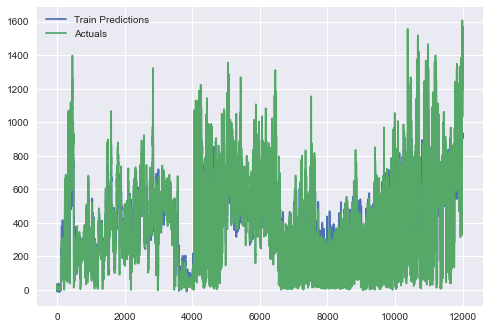

In [17]:
model = load_model('4H_Forecast/4H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(4,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 5 hours forecast

In [18]:
%%time

Trainer(5,6,12)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 7ms/step - loss: 250868.7500 - mean_absolute_error: 410.6928 - val_loss: 363518.6562 - val_mean_absolute_error: 488.9661
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 6ms/step - loss: 244435.7188 - mean_absolute_error: 402.8999 - val_loss: 353884.2812 - val_mean_absolute_error: 479.2463
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 6ms/step - loss: 237180.9375 - mean_absolute_error: 394.5095 - val_loss: 345577.6562 - val_mean_absolute_error: 471.0921
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 230483.0156 - mean_absolute_error: 386.9001 - val_loss: 337548.6875 - val_mean_absolute_error: 463.3345
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 223968.9219 - mean_absolute_error: 379.6304 - val_loss: 329605.4688 - val_mean_absolute_error: 455.7404
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 217005.7969 - mean_absolute_error: 371.9391 - val_loss: 320540.3125 - val_mean_absolute_error: 447.2273
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 208933.3750 - mean_absolute_error: 363.1391 - val_loss: 310093.5312 - val_mean_absolute_error: 437.6515
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 200871.3594 - mean_absolute_error: 354.5187 - val_loss: 300315.2500 - val_mean_absolute_error: 428.7711
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 192867.1562 - mean_absolute_error: 345.9437 - val_loss: 290473.8438 - val_mean_absolute_error: 419.8276
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 184561.0938 - mean_absolute_error: 337.1428 - val_loss: 279726.0625 - val_mean_absolute_error: 410.0396
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 6ms/step - loss: 176183.0625 - mean_absolute_error: 328.2877 - val_loss: 269323.3438 - val_mean_absolute_error: 400.5717
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 168077.6406 - mean_absolute_error: 319.6745 - val_loss: 259102.0625 - val_mean_absolute_error: 391.2091
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 160155.1250 - mean_absolute_error: 311.1791 - val_loss: 249005.0156 - val_mean_absolute_error: 381.8675
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 6ms/step - loss: 151850.1406 - mean_absolute_error: 302.3317 - val_loss: 238072.7188 - val_mean_absolute_error: 371.6508
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 143741.6406 - mean_absolute_error: 293.5882 - val_loss: 227557.6875 - val_mean_absolute_error: 361.7504
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 136220.0625 - mean_absolute_error: 285.4412 - val_loss: 217799.0938 - val_mean_absolute_error: 352.5323
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 129125.1172 - mean_absolute_error: 277.8360 - val_loss: 208419.2812 - val_mean_absolute_error: 343.6327
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 6ms/step - loss: 122379.2344 - mean_absolute_error: 270.2739 - val_loss: 199384.0156 - val_mean_absolute_error: 334.9239
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 6ms/step - loss: 116026.1797 - mean_absolute_error: 263.3426 - val_loss: 190751.5312 - val_mean_absolute_error: 326.7044
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 6ms/step - loss: 110057.2734 - mean_absolute_error: 256.7496 - val_loss: 182559.5000 - val_mean_absolute_error: 318.8597
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 104501.7969 - mean_absolute_error: 250.5297 - val_loss: 174762.4219 - val_mean_absolute_error: 311.2786
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 99257.5000 - mean_absolute_error: 244.3766 - val_loss: 167321.9688 - val_mean_absolute_error: 303.9585
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 6ms/step - loss: 94399.4922 - mean_absolute_error: 238.3712 - val_loss: 160239.6094 - val_mean_absolute_error: 297.0033
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 6ms/step - loss: 89753.2188 - mean_absolute_error: 232.1263 - val_loss: 153468.0312 - val_mean_absolute_error: 289.8915
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 6ms/step - loss: 85450.9609 - mean_absolute_error: 225.8574 - val_loss: 146829.5625 - val_mean_absolute_error: 283.0891
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 2s 6ms/step - loss: 81479.7969 - mean_absolute_error: 220.1927 - val_loss: 140397.0625 - val_mean_absolute_error: 275.8225
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 6ms/step - loss: 77727.1328 - mean_absolute_error: 214.7743 - val_loss: 134429.7656 - val_mean_absolute_error: 269.8552
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 6ms/step - loss: 74092.2188 - mean_absolute_error: 208.9434 - val_loss: 128483.0938 - val_mean_absolute_error: 262.9318
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 6ms/step - loss: 70877.1328 - mean_absolute_error: 204.0799 - val_loss: 123006.7812 - val_mean_absolute_error: 257.0795
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 67832.5938 - mean_absolute_error: 198.6793 - val_loss: 117603.0781 - val_mean_absolute_error: 250.1752
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 6ms/step - loss: 65014.1289 - mean_absolute_error: 193.7554 - val_loss: 112454.6562 - val_mean_absolute_error: 243.4396
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 6ms/step - loss: 62342.4805 - mean_absolute_error: 188.4410 - val_loss: 107400.4609 - val_mean_absolute_error: 236.5388
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 6ms/step - loss: 60001.7578 - mean_absolute_error: 184.4858 - val_loss: 103127.1172 - val_mean_absolute_error: 231.7062
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 2s 6ms/step - loss: 57953.2422 - mean_absolute_error: 180.6409 - val_loss: 98800.5312 - val_mean_absolute_error: 225.8948
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 6ms/step - loss: 56009.5234 - mean_absolute_error: 176.8821 - val_loss: 94696.0234 - val_mean_absolute_error: 219.5559
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 2s 6ms/step - loss: 54321.6211 - mean_absolute_error: 174.0279 - val_loss: 91158.0156 - val_mean_absolute_error: 215.2787
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 6ms/step - loss: 52917.6445 - mean_absolute_error: 171.6762 - val_loss: 88014.6953 - val_mean_absolute_error: 212.0925
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 5ms/step - loss: 51757.4531 - mean_absolute_error: 170.0514 - val_loss: 85250.8047 - val_mean_absolute_error: 208.7379
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 6ms/step - loss: 50761.2383 - mean_absolute_error: 168.2074 - val_loss: 82649.5469 - val_mean_absolute_error: 205.3988
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 6ms/step - loss: 49721.7812 - mean_absolute_error: 166.0672 - val_loss: 80241.0234 - val_mean_absolute_error: 202.9142
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 48720.0859 - mean_absolute_error: 164.1969 - val_loss: 78046.4766 - val_mean_absolute_error: 199.9969
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 47969.3711 - mean_absolute_error: 162.9704 - val_loss: 76636.0547 - val_mean_absolute_error: 199.0423
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 2s 6ms/step - loss: 47175.0547 - mean_absolute_error: 161.3904 - val_loss: 75743.5391 - val_mean_absolute_error: 199.5533
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 46475.3203 - mean_absolute_error: 160.1480 - val_loss: 73437.3516 - val_mean_absolute_error: 195.0780
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 45889.8125 - mean_absolute_error: 159.3403 - val_loss: 71882.6250 - val_mean_absolute_error: 192.7423
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 6ms/step - loss: 45454.4766 - mean_absolute_error: 158.5283 - val_loss: 70215.3516 - val_mean_absolute_error: 190.0519
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 5ms/step - loss: 45010.4688 - mean_absolute_error: 157.9007 - val_loss: 70402.7656 - val_mean_absolute_error: 191.3201
Epoch 48/100
376/376 [==============================] - 2s 6ms/step - loss: 44564.8281 - mean_absolute_error: 156.9495 - val_loss: 70376.2500 - val_mean_absolute_error: 193.1439
Epoch 49/100
376/376 [==============================] - 2s 6ms/step - loss: 44152.3203 - mean_absolute_error: 156.5078 - val_loss: 69209.7266 - val_mean_absolute_error: 190.5762
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 6ms/step - loss: 43551.2227 - mean_absolute_error: 154.9110 - val_loss: 66637.3516 - val_mean_absolute_error: 186.4309
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 43043.4570 - mean_absolute_error: 153.9644 - val_loss: 65997.5078 - val_mean_absolute_error: 185.4693
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 42643.2656 - mean_absolute_error: 153.0260 - val_loss: 65366.1523 - val_mean_absolute_error: 185.7477
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 42175.9297 - mean_absolute_error: 152.1138 - val_loss: 65722.6484 - val_mean_absolute_error: 186.1696
Epoch 54/100
376/376 [==============================] - 2s 6ms/step - loss: 41942.2188 - mean_absolute_error: 151.6927 - val_loss: 63501.2773 - val_mean_absolute_error: 182.8188
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 2s 6ms/step - loss: 41594.2500 - mean_absolute_error: 150.9237 - val_loss: 65041.8750 - val_mean_absolute_error: 183.4524
Epoch 56/100
376/376 [==============================] - 2s 6ms/step - loss: 41353.4531 - mean_absolute_error: 150.5915 - val_loss: 62780.4023 - val_mean_absolute_error: 183.0390
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 41006.3672 - mean_absolute_error: 149.8750 - val_loss: 62930.2148 - val_mean_absolute_error: 181.9698
Epoch 58/100
376/376 [==============================] - 2s 6ms/step - loss: 40654.3398 - mean_absolute_error: 149.2308 - val_loss: 62658.0938 - val_mean_absolute_error: 183.5889
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 6ms/step - loss: 40408.8906 - mean_absolute_error: 148.3983 - val_loss: 63521.8594 - val_mean_absolute_error: 184.4625
Epoch 60/100
376/376 [==============================] - 2s 6ms/step - loss: 40127.9102 - mean_absolute_error: 148.1853 - val_loss: 62017.1602 - val_mean_absolute_error: 181.3527
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 6ms/step - loss: 39929.5391 - mean_absolute_error: 147.6226 - val_loss: 61351.6445 - val_mean_absolute_error: 179.9510
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 6ms/step - loss: 39772.1875 - mean_absolute_error: 147.2906 - val_loss: 60900.9609 - val_mean_absolute_error: 180.5162
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 6ms/step - loss: 39431.2734 - mean_absolute_error: 146.6031 - val_loss: 60679.2109 - val_mean_absolute_error: 179.9418
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 39290.9609 - mean_absolute_error: 146.3002 - val_loss: 59642.4766 - val_mean_absolute_error: 177.8741
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 6ms/step - loss: 39116.0547 - mean_absolute_error: 145.9120 - val_loss: 60874.1133 - val_mean_absolute_error: 180.5945
Epoch 66/100
376/376 [==============================] - 2s 6ms/step - loss: 38858.7461 - mean_absolute_error: 145.1938 - val_loss: 61302.2109 - val_mean_absolute_error: 183.1904
Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 38706.6328 - mean_absolute_error: 144.9235 - val_loss: 59839.2891 - val_mean_absolute_error: 179.4775
Epoch 68/100
376/376 [==============================] - 2s 6ms/step - loss: 38639.9805 - mean_absolute_error: 144.8343 - val_loss: 60311.1211 - val_mean_absolute_error: 180.4518
Epoch 69/100
376/376 [==============================] - 2s 7ms/step - loss: 38446.2266 - mean_absolute_error: 144.4788 - val_loss: 59445.5195 - val_mean_absolute_error: 178.8456
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 6ms/step - loss: 38268.7070 - mean_absolute_error: 143.7697 - val_loss: 58358.3984 - val_mean_absolute_error: 176.0981
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 6ms/step - loss: 38173.4102 - mean_absolute_error: 143.7857 - val_loss: 60179.9883 - val_mean_absolute_error: 181.5679
Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 38138.9141 - mean_absolute_error: 143.7366 - val_loss: 58540.8203 - val_mean_absolute_error: 178.3548
Epoch 73/100
376/376 [==============================] - 2s 7ms/step - loss: 38032.5508 - mean_absolute_error: 143.0488 - val_loss: 58704.5078 - val_mean_absolute_error: 177.5426
Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 37847.2578 - mean_absolute_error: 143.0075 - val_loss: 62106.9531 - val_mean_absolute_error: 181.4459
Epoch 75/100
376/376 [==============================] - 2s 7ms/step - loss: 37773.1094 - mean_absolute_error: 142.8786 - val_loss: 57592.1250 - val_mean_absolute_error: 173.6893
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 6ms/step - loss: 37695.9102 - mean_absolute_error: 142.4365 - val_loss: 56437.3516 - val_mean_absolute_error: 173.3195
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 2s 6ms/step - loss: 37767.4844 - mean_absolute_error: 142.5760 - val_loss: 59408.2070 - val_mean_absolute_error: 177.1008
Epoch 78/100
376/376 [==============================] - 2s 6ms/step - loss: 37476.5586 - mean_absolute_error: 141.9341 - val_loss: 60150.9062 - val_mean_absolute_error: 179.4915
Epoch 79/100
376/376 [==============================] - 2s 6ms/step - loss: 37431.3320 - mean_absolute_error: 141.6984 - val_loss: 57775.5000 - val_mean_absolute_error: 175.7717
Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 37185.0352 - mean_absolute_error: 141.1780 - val_loss: 57708.8281 - val_mean_absolute_error: 173.3795
Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 37190.8047 - mean_absolute_error: 141.0858 - val_loss: 58088.9023 - val_mean_absolute_error: 177.5206
Epoch 82/100
376/376 [==============================] - 2s 7ms/step - loss: 37042.1914 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 2s 6ms/step - loss: 35726.9375 - mean_absolute_error: 137.0087 - val_loss: 56251.2930 - val_mean_absolute_error: 172.0649
Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 35732.3242 - mean_absolute_error: 137.0453 - val_loss: 56051.9414 - val_mean_absolute_error: 173.8175
Epoch 98/100
376/376 [==============================] - 2s 6ms/step - loss: 35705.3633 - mean_absolute_error: 136.9179 - val_loss: 55807.8203 - val_mean_absolute_error: 172.4539
Epoch 99/100
376/376 [==============================] - 2s 6ms/step - loss: 35625.1719 - mean_absolute_error: 136.7015 - val_loss: 59191.7773 - val_mean_absolute_error: 174.4100
Epoch 100/100
376/376 [==============================] - 2s 6ms/step - loss: 35463.6133 - mean_absolute_error: 135.6626 - val_loss: 58063.8945 - val_mean_absolute_error: 174.9685

-----------------------------------------------------------------------------------------------------------


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 247038.2969 - mean_absolute_error: 405.9597 - val_loss: 356700.2188 - val_mean_absolute_error: 481.9508
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 6ms/step - loss: 238764.8438 - mean_absolute_error: 396.3536 - val_loss: 347289.0625 - val_mean_absolute_error: 472.7197
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 7ms/step - loss: 231580.2031 - mean_absolute_error: 388.1561 - val_loss: 338764.0938 - val_mean_absolute_error: 464.4713
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 224583.1875 - mean_absolute_error: 380.3169 - val_loss: 329658.1250 - val_mean_absolute_error: 455.7539
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 217059.8125 - mean_absolute_error: 371.9898 - val_loss: 320796.0938 - val_mean_absolute_error: 447.4474
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 7ms/step - loss: 209753.7188 - mean_absolute_error: 364.0681 - val_loss: 311744.6875 - val_mean_absolute_error: 439.1213
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 202296.0469 - mean_absolute_error: 356.0080 - val_loss: 302474.9375 - val_mean_absolute_error: 430.6867
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 7ms/step - loss: 194683.4062 - mean_absolute_error: 347.8880 - val_loss: 292965.2812 - val_mean_absolute_error: 422.0452
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 186963.1719 - mean_absolute_error: 339.6620 - val_loss: 283291.0625 - val_mean_absolute_error: 413.2347
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 179193.7500 - mean_absolute_error: 331.3956 - val_loss: 273510.7500 - val_mean_absolute_error: 404.3176
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 171422.3438 - mean_absolute_error: 323.1579 - val_loss: 263660.8750 - val_mean_absolute_error: 395.3370
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 163712.6875 - mean_absolute_error: 314.9150 - val_loss: 253849.8906 - val_mean_absolute_error: 386.2953
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 156112.5156 - mean_absolute_error: 306.7659 - val_loss: 244124.3438 - val_mean_absolute_error: 377.2895
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 148575.9062 - mean_absolute_error: 298.6742 - val_loss: 234157.5625 - val_mean_absolute_error: 367.9648
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 7ms/step - loss: 141077.5000 - mean_absolute_error: 290.4753 - val_loss: 224553.1875 - val_mean_absolute_error: 358.8878
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 7ms/step - loss: 133983.6719 - mean_absolute_error: 282.7661 - val_loss: 215274.2344 - val_mean_absolute_error: 350.1661
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 127215.5859 - mean_absolute_error: 275.3386 - val_loss: 206321.1875 - val_mean_absolute_error: 341.6975
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 120777.9297 - mean_absolute_error: 268.3495 - val_loss: 197719.6562 - val_mean_absolute_error: 333.5627
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 6ms/step - loss: 114680.9922 - mean_absolute_error: 261.5026 - val_loss: 189429.3594 - val_mean_absolute_error: 325.7504
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 108926.5156 - mean_absolute_error: 255.1232 - val_loss: 181506.1406 - val_mean_absolute_error: 318.1626
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 103567.9688 - mean_absolute_error: 249.2888 - val_loss: 174000.4219 - val_mean_absolute_error: 311.0873
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 98524.6953 - mean_absolute_error: 243.0954 - val_loss: 166751.2812 - val_mean_absolute_error: 303.9256
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 93751.8359 - mean_absolute_error: 237.0458 - val_loss: 159828.4375 - val_mean_absolute_error: 297.0020
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 89337.1875 - mean_absolute_error: 231.3068 - val_loss: 153247.2969 - val_mean_absolute_error: 290.4507
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 85206.7188 - mean_absolute_error: 225.6402 - val_loss: 146852.2969 - val_mean_absolute_error: 283.7015
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 81429.1641 - mean_absolute_error: 220.5884 - val_loss: 141005.8906 - val_mean_absolute_error: 278.1183
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 7ms/step - loss: 77986.0078 - mean_absolute_error: 215.8914 - val_loss: 135176.1562 - val_mean_absolute_error: 271.5264
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 7ms/step - loss: 74584.8906 - mean_absolute_error: 210.0427 - val_loss: 129420.2500 - val_mean_absolute_error: 264.4601
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 71475.7891 - mean_absolute_error: 204.9393 - val_loss: 124167.3203 - val_mean_absolute_error: 259.2876
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 7ms/step - loss: 68640.5234 - mean_absolute_error: 200.2621 - val_loss: 118762.5859 - val_mean_absolute_error: 251.7580
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 65964.5000 - mean_absolute_error: 195.3339 - val_loss: 113921.4219 - val_mean_absolute_error: 245.9853
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 63705.5898 - mean_absolute_error: 191.3173 - val_loss: 109487.0703 - val_mean_absolute_error: 240.8523
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 2s 6ms/step - loss: 61713.5117 - mean_absolute_error: 188.0791 - val_loss: 105490.7891 - val_mean_absolute_error: 236.4005
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 6ms/step - loss: 59844.1523 - mean_absolute_error: 184.1492 - val_loss: 101585.2734 - val_mean_absolute_error: 230.7772
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 2s 6ms/step - loss: 58287.6250 - mean_absolute_error: 181.3016 - val_loss: 98138.4375 - val_mean_absolute_error: 226.9601
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 56988.8906 - mean_absolute_error: 179.4732 - val_loss: 95512.6328 - val_mean_absolute_error: 223.6714
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 6ms/step - loss: 55717.3203 - mean_absolute_error: 176.8370 - val_loss: 92438.2500 - val_mean_absolute_error: 219.9140
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 54669.3359 - mean_absolute_error: 175.0882 - val_loss: 89819.1016 - val_mean_absolute_error: 217.4427
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 53778.8320 - mean_absolute_error: 173.5735 - val_loss: 87638.2344 - val_mean_absolute_error: 214.9876
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 53039.6562 - mean_absolute_error: 172.3951 - val_loss: 85668.3828 - val_mean_absolute_error: 213.1296
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 7ms/step - loss: 52406.5703 - mean_absolute_error: 171.3022 - val_loss: 84158.8516 - val_mean_absolute_error: 211.3035
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 2s 7ms/step - loss: 51685.5938 - mean_absolute_error: 169.3552 - val_loss: 82453.2656 - val_mean_absolute_error: 208.7248
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 50907.1250 - mean_absolute_error: 167.2642 - val_loss: 80176.6094 - val_mean_absolute_error: 205.4451
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 50149.4766 - mean_absolute_error: 165.0962 - val_loss: 78843.8906 - val_mean_absolute_error: 203.6646
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 6ms/step - loss: 49624.8867 - mean_absolute_error: 164.4853 - val_loss: 77450.7500 - val_mean_absolute_error: 202.1343
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 49221.8672 - mean_absolute_error: 163.6920 - val_loss: 75699.1094 - val_mean_absolute_error: 200.5053
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 48834.2227 - mean_absolute_error: 163.1523 - val_loss: 75585.7969 - val_mean_absolute_error: 199.9077
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 6ms/step - loss: 48448.9609 - mean_absolute_error: 162.8134 - val_loss: 73684.3672 - val_mean_absolute_error: 198.0104
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 48110.4844 - mean_absolute_error: 162.1896 - val_loss: 73656.5391 - val_mean_absolute_error: 197.9976
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 47873.1992 - mean_absolute_error: 161.8757 - val_loss: 72126.5547 - val_mean_absolute_error: 196.1878
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 47613.6719 - mean_absolute_error: 161.3174 - val_loss: 71446.4844 - val_mean_absolute_error: 195.5912
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 47397.5039 - mean_absolute_error: 161.2423 - val_loss: 71561.5547 - val_mean_absolute_error: 195.5447
Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 47197.0820 - mean_absolute_error: 160.6186 - val_loss: 70387.9688 - val_mean_absolute_error: 194.2839
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 46969.7539 - mean_absolute_error: 160.4021 - val_loss: 70795.6562 - val_mean_absolute_error: 194.4769
Epoch 56/100
376/376 [==============================] - 2s 7ms/step - loss: 46771.4414 - mean_absolute_error: 159.9027 - val_loss: 68734.8828 - val_mean_absolute_error: 192.0216
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 46459.1758 - mean_absolute_error: 159.0013 - val_loss: 68500.0938 - val_mean_absolute_error: 191.2641
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 46247.8789 - mean_absolute_error: 158.6187 - val_loss: 68045.3594 - val_mean_absolute_error: 190.7883
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 6ms/step - loss: 46081.7500 - mean_absolute_error: 158.1093 - val_loss: 68211.7109 - val_mean_absolute_error: 190.8057
Epoch 60/100
376/376 [==============================] - 2s 6ms/step - loss: 45892.5430 - mean_absolute_error: 157.9379 - val_loss: 67646.5234 - val_mean_absolute_error: 190.1292
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 45757.0586 - mean_absolute_error: 157.5639 - val_loss: 66631.7578 - val_mean_absolute_error: 189.0865
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 45606.5039 - mean_absolute_error: 157.2304 - val_loss: 66566.0938 - val_mean_absolute_error: 188.8212
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 45456.8633 - mean_absolute_error: 157.1030 - val_loss: 66354.7812 - val_mean_absolute_error: 188.4641
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 45324.3555 - mean_absolute_error: 156.9061 - val_loss: 66230.8281 - val_mean_absolute_error: 188.2947
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 7ms/step - loss: 45182.4258 - mean_absolute_error: 156.3878 - val_loss: 65359.7656 - val_mean_absolute_error: 187.1520
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 45034.1367 - mean_absolute_error: 156.3608 - val_loss: 64521.4805 - val_mean_absolute_error: 186.1257
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 44889.5703 - mean_absolute_error: 155.9953 - val_loss: 65023.1758 - val_mean_absolute_error: 186.3920
Epoch 68/100
376/376 [==============================] - 2s 6ms/step - loss: 44749.9648 - mean_absolute_error: 155.3489 - val_loss: 64586.8672 - val_mean_absolute_error: 185.7480
Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 44521.8359 - mean_absolute_error: 154.8059 - val_loss: 64332.4766 - val_mean_absolute_error: 185.2166
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 44362.6797 - mean_absolute_error: 154.7384 - val_loss: 63258.0781 - val_mean_absolute_error: 184.4030
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 44244.7227 - mean_absolute_error: 154.5441 - val_loss: 63354.9922 - val_mean_absolute_error: 183.9181
Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 44092.3398 - mean_absolute_error: 154.3941 - val_loss: 63326.2109 - val_mean_absolute_error: 183.7445
Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 44042.8828 - mean_absolute_error: 154.2311 - val_loss: 62855.6172 - val_mean_absolute_error: 182.9268
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 6ms/step - loss: 43780.9102 - mean_absolute_error: 153.7636 - val_loss: 62131.8203 - val_mean_absolute_error: 182.1019
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 43690.7656 - mean_absolute_error: 153.4235 - val_loss: 62633.7305 - val_mean_absolute_error: 182.2846
Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 43449.8984 - mean_absolute_error: 152.9875 - val_loss: 61241.1875 - val_mean_absolute_error: 180.8704
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 43248.8320 - mean_absolute_error: 152.6407 - val_loss: 61012.9062 - val_mean_absolute_error: 180.3030
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 43089.7852 - mean_absolute_error: 152.0755 - val_loss: 60369.5000 - val_mean_absolute_error: 179.0678
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 42882.1523 - mean_absolute_error: 151.6117 - val_loss: 60405.4414 - val_mean_absolute_error: 178.7020
Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 42757.1055 - mean_absolute_error: 151.5094 - val_loss: 59832.0430 - val_mean_absolute_error: 178.4835
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 42606.0117 - mean_absolute_error: 151.1557 - val_loss: 60195.5391 - val_mean_absolute_error: 178.4121
Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 42427.7422 - mean_absolute_error: 151.0136 - val_loss: 60289.9453 - val_mean_absolute_error: 179.0311
Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 42352.2500 - mean_absolute_error: 151.1334 - val_loss: 61981.2539 - val_mean_absolute_error: 180.2971
Epoch 84/100
376/376 [==============================] - 2s 6ms/step - loss: 42147.1562 - mean_absolute_error: 150.4761 - val_loss: 60524.2773 - val_mean_absolute_error: 178.9970
Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 41976.1953 - mean_absolute_error: 150.6501 - val_loss: 59362.0352 - val_mean_absolute_error: 178.5453
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 41846.2070 - mean_absolute_error: 149.8405 - val_loss: 59741.5547 - val_mean_absolute_error: 178.1880
Epoch 87/100
376/376 [==============================] - 2s 7ms/step - loss: 41657.5781 - mean_absolute_error: 149.9678 - val_loss: 59367.9219 - val_mean_absolute_error: 178.0003
Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 41547.8711 - mean_absolute_error: 149.4395 - val_loss: 59359.7734 - val_mean_absolute_error: 177.3952
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 41366.7695 - mean_absolute_error: 149.1726 - val_loss: 59068.0469 - val_mean_absolute_error: 177.4569
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 41208.6836 - mean_absolute_error: 149.0477 - val_loss: 59355.1914 - val_mean_absolute_error: 177.3735
Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 41022.9844 - mean_absolute_error: 148.6894 - val_loss: 59627.5625 - val_mean_absolute_error: 176.8851
Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 40940.0234 - mean_absolute_error: 148.2239 - val_loss: 58877.1250 - val_mean_absolute_error: 176.9485
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 7ms/step - loss: 40789.0898 - mean_absolute_error: 148.1569 - val_loss: 58486.5781 - val_mean_absolute_error: 176.5112
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 7ms/step - loss: 40604.1211 - mean_absolute_error: 147.8452 - val_loss: 59054.2578 - val_mean_absolute_error: 176.6151
Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 40478.8750 - mean_absolute_error: 147.4807 - val_loss: 58069.2031 - val_mean_absolute_error: 175.7340
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 40307.0781 - mean_absolute_error: 146.9620 - val_loss: 58726.4297 - val_mean_absolute_error: 176.3481
Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 40233.5703 - mean_absolute_error: 146.6551 - val_loss: 57781.4336 - val_mean_absolute_error: 175.1286
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 2s 7ms/step - loss: 40039.8203 - mean_absolute_error: 146.4494 - val_loss: 57950.7227 - val_mean_absolute_error: 175.1873
Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 39873.0312 - mean_absolute_error: 146.0025 - val_loss: 56695.7578 - val_mean_absolute_error: 174.8887
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 39744.0586 - mean_absolute_error: 145.6768 - val_loss: 56629.9766 - val_mean_absolute_error: 173.5402
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 9ms/step - loss: 252049.1250 - mean_absolute_error: 412.1682 - val_loss: 364312.8125 - val_mean_absolute_error: 489.8045
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 245799.4219 - mean_absolute_error: 404.4654 - val_loss: 354504.6875 - val_mean_absolute_error: 479.8352
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 237491.7500 - mean_absolute_error: 394.9225 - val_loss: 345738.7500 - val_mean_absolute_error: 471.2840
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 230994.1406 - mean_absolute_error: 387.5392 - val_loss: 338373.8750 - val_mean_absolute_error: 464.1371
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 224862.4219 - mean_absolute_error: 380.6467 - val_loss: 330805.0312 - val_mean_absolute_error: 456.8793
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 218267.2656 - mean_absolute_error: 373.3268 - val_loss: 322413.8125 - val_mean_absolute_error: 448.9843
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 211424.3750 - mean_absolute_error: 365.8724 - val_loss: 313991.8750 - val_mean_absolute_error: 441.2034
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 203859.7344 - mean_absolute_error: 357.6880 - val_loss: 304040.0312 - val_mean_absolute_error: 432.1566
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 196062.6875 - mean_absolute_error: 349.3886 - val_loss: 294558.6875 - val_mean_absolute_error: 423.5536
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 188405.1875 - mean_absolute_error: 341.2224 - val_loss: 285003.1875 - val_mean_absolute_error: 414.8522
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 180744.5000 - mean_absolute_error: 333.1203 - val_loss: 275389.9688 - val_mean_absolute_error: 406.0829
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 173103.9062 - mean_absolute_error: 324.9260 - val_loss: 265747.2812 - val_mean_absolute_error: 397.3105
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 165523.4688 - mean_absolute_error: 316.8464 - val_loss: 256110.0156 - val_mean_absolute_error: 388.4471
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 158039.5312 - mean_absolute_error: 308.8755 - val_loss: 246541.3125 - val_mean_absolute_error: 379.6053
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 150708.1406 - mean_absolute_error: 301.0576 - val_loss: 237114.3750 - val_mean_absolute_error: 370.8076
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 9ms/step - loss: 143572.4219 - mean_absolute_error: 293.2586 - val_loss: 227873.0469 - val_mean_absolute_error: 362.1069
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 136653.3750 - mean_absolute_error: 285.7099 - val_loss: 218849.0000 - val_mean_absolute_error: 353.6469
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 129961.7422 - mean_absolute_error: 278.3074 - val_loss: 210024.6562 - val_mean_absolute_error: 345.2951
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 123502.6719 - mean_absolute_error: 270.8694 - val_loss: 201561.6406 - val_mean_absolute_error: 337.2960
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 117362.8516 - mean_absolute_error: 263.8277 - val_loss: 193398.2031 - val_mean_absolute_error: 329.6095
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 111533.9375 - mean_absolute_error: 257.1990 - val_loss: 185551.2344 - val_mean_absolute_error: 322.2519
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 106050.2422 - mean_absolute_error: 250.9727 - val_loss: 177976.5625 - val_mean_absolute_error: 315.0165
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 100923.2031 - mean_absolute_error: 245.0063 - val_loss: 170833.6875 - val_mean_absolute_error: 308.2702
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 96156.2344 - mean_absolute_error: 239.6105 - val_loss: 164081.9219 - val_mean_absolute_error: 301.6077
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 91659.0703 - mean_absolute_error: 233.5546 - val_loss: 157429.4531 - val_mean_absolute_error: 295.0116
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 87320.3281 - mean_absolute_error: 227.6913 - val_loss: 151045.7031 - val_mean_absolute_error: 288.1413
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 83208.0703 - mean_absolute_error: 221.3440 - val_loss: 144780.9375 - val_mean_absolute_error: 281.7240
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 79279.9922 - mean_absolute_error: 215.6393 - val_loss: 138531.5469 - val_mean_absolute_error: 274.5019
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 75547.6797 - mean_absolute_error: 209.7102 - val_loss: 132565.4375 - val_mean_absolute_error: 267.7069
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 72042.6484 - mean_absolute_error: 204.4080 - val_loss: 126860.3750 - val_mean_absolute_error: 261.5435
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 68844.1484 - mean_absolute_error: 199.3776 - val_loss: 121510.6797 - val_mean_absolute_error: 254.7607
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 65955.0938 - mean_absolute_error: 194.8654 - val_loss: 116362.8750 - val_mean_absolute_error: 248.3389
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 63225.9141 - mean_absolute_error: 190.0494 - val_loss: 111339.1875 - val_mean_absolute_error: 242.0063
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 60677.0391 - mean_absolute_error: 185.8468 - val_loss: 106808.9531 - val_mean_absolute_error: 236.3075
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 58128.1367 - mean_absolute_error: 181.0918 - val_loss: 102546.3359 - val_mean_absolute_error: 229.7355
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 55920.2227 - mean_absolute_error: 177.3429 - val_loss: 98110.5781 - val_mean_absolute_error: 225.2003
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 53863.7227 - mean_absolute_error: 173.6385 - val_loss: 94296.2344 - val_mean_absolute_error: 219.8656
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 52006.3203 - mean_absolute_error: 170.5367 - val_loss: 90543.0859 - val_mean_absolute_error: 214.8913
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 50334.5703 - mean_absolute_error: 167.4061 - val_loss: 87164.4531 - val_mean_absolute_error: 210.4395
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 48827.8320 - mean_absolute_error: 164.7561 - val_loss: 84175.6250 - val_mean_absolute_error: 206.8535
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 47286.6250 - mean_absolute_error: 161.3063 - val_loss: 81298.1797 - val_mean_absolute_error: 202.4274
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 45946.7188 - mean_absolute_error: 158.6763 - val_loss: 79301.7266 - val_mean_absolute_error: 199.9272
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 44656.1016 - mean_absolute_error: 155.8461 - val_loss: 76390.5234 - val_mean_absolute_error: 195.6498
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 43608.3164 - mean_absolute_error: 153.7070 - val_loss: 74969.3047 - val_mean_absolute_error: 193.2323
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 42516.1328 - mean_absolute_error: 151.0774 - val_loss: 73183.3359 - val_mean_absolute_error: 191.4334
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 41596.2695 - mean_absolute_error: 148.8211 - val_loss: 70652.3281 - val_mean_absolute_error: 188.7190
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 40708.6016 - mean_absolute_error: 146.4489 - val_loss: 69843.9766 - val_mean_absolute_error: 186.5400
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 39963.1328 - mean_absolute_error: 144.9743 - val_loss: 68176.3281 - val_mean_absolute_error: 185.3400
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 39316.0625 - mean_absolute_error: 143.8140 - val_loss: 67098.1328 - val_mean_absolute_error: 183.7367
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 38678.0859 - mean_absolute_error: 142.1998 - val_loss: 65361.4219 - val_mean_absolute_error: 183.2225
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 38276.8984 - mean_absolute_error: 141.3498 - val_loss: 64728.2812 - val_mean_absolute_error: 180.5872
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 37787.4805 - mean_absolute_error: 140.3178 - val_loss: 63934.4297 - val_mean_absolute_error: 179.8792
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 37483.9336 - mean_absolute_error: 139.6437 - val_loss: 63052.8516 - val_mean_absolute_error: 178.6318
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 37187.6133 - mean_absolute_error: 138.9497 - val_loss: 62209.1250 - val_mean_absolute_error: 176.9690
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 37001.3398 - mean_absolute_error: 138.4707 - val_loss: 62290.2695 - val_mean_absolute_error: 177.9943
Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 36572.3359 - mean_absolute_error: 137.2412 - val_loss: 61581.6367 - val_mean_absolute_error: 176.1755
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 36206.7227 - mean_absolute_error: 136.4637 - val_loss: 60632.7969 - val_mean_absolute_error: 176.2625
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 36095.9648 - mean_absolute_error: 135.9653 - val_loss: 59503.1719 - val_mean_absolute_error: 174.7388
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 35839.8633 - mean_absolute_error: 135.4353 - val_loss: 59395.7930 - val_mean_absolute_error: 174.5256
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 35648.1914 - mean_absolute_error: 134.9544 - val_loss: 60294.9297 - val_mean_absolute_error: 174.1470
Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 35500.7969 - mean_absolute_error: 134.3967 - val_loss: 59710.6641 - val_mean_absolute_error: 174.0875
Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 35264.2148 - mean_absolute_error: 133.8816 - val_loss: 59775.3633 - val_mean_absolute_error: 173.6793
Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 35175.6797 - mean_absolute_error: 133.6358 - val_loss: 58499.6953 - val_mean_absolute_error: 172.5710
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 35011.6758 - mean_absolute_error: 133.0758 - val_loss: 57886.3086 - val_mean_absolute_error: 171.6038
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 34824.5273 - mean_absolute_error: 132.7670 - val_loss: 58481.8359 - val_mean_absolute_error: 172.9835
Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 34719.7266 - mean_absolute_error: 132.4216 - val_loss: 58617.2070 - val_mean_absolute_error: 172.2789
Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 34696.9883 - mean_absolute_error: 132.4824 - val_loss: 57903.4180 - val_mean_absolute_error: 171.3327
Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 34509.1602 - mean_absolute_error: 131.8230 - val_loss: 59586.8711 - val_mean_absolute_error: 173.2807
Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 34439.7695 - mean_absolute_error: 131.8652 - val_loss: 58582.0859 - val_mean_absolute_error: 172.1462
Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 34305.4883 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 34234.2969 - mean_absolute_error: 131.0324 - val_loss: 57900.8242 - val_mean_absolute_error: 171.3409
Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 34292.1758 - mean_absolute_error: 131.2235 - val_loss: 57061.9102 - val_mean_absolute_error: 174.0122
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 34184.1836 - mean_absolute_error: 131.1958 - val_loss: 56819.8672 - val_mean_absolute_error: 170.8824
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 33935.2734 - mean_absolute_error: 130.3466 - val_loss: 57029.0156 - val_mean_absolute_error: 170.7264
Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 33903.7969 - mean_absolute_error: 130.1385 - val_loss: 56502.9844 - val_mean_absolute_error: 170.3011
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 33858.4414 - mean_absolute_error: 130.2130 - val_loss: 56837.3711 - val_mean_absolute_error: 169.9351
Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 33760.3906 - mean_absolute_error: 129.6956 - val_loss: 55971.9570 - val_mean_absolute_error: 169.4577
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 33653.0078 - mean_absolute_error: 129.5214 - val_loss: 56553.3789 - val_mean_absolute_error: 170.1082
Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 33701.4258 - mean_absolute_error: 129.4387 - val_loss: 56708.0977 - val_mean_absolute_error: 172.9040
Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 33522.4336 - mean_absolute_error: 128.9969 - val_loss: 57116.5391 - val_mean_absolute_error: 169.7749
Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 33492.7617 - mean_absolute_error: 128.8044 - val_loss: 55656.5117 - val_mean_absolute_error: 168.1050
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 33472.3984 - mean_absolute_error: 129.0103 - val_loss: 57161.8164 - val_mean_absolute_error: 169.9101
Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 33436.7500 - mean_absolute_error: 128.7800 - val_loss: 57269.3398 - val_mean_absolute_error: 169.3322
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 33410.6289 - mean_absolute_error: 128.5350 - val_loss: 58211.7617 - val_mean_absolute_error: 172.6777
Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 33163.0391 - mean_absolute_error: 127.6999 - val_loss: 56079.5195 - val_mean_absolute_error: 168.3241
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 33234.3438 - mean_absolute_error: 128.1197 - val_loss: 56003.4492 - val_mean_absolute_error: 168.0244
Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 33181.8984 - mean_absolute_error:

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 32945.4961 - mean_absolute_error: 127.1998 - val_loss: 55041.0234 - val_mean_absolute_error: 166.9950
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 32835.0664 - mean_absolute_error: 127.0945 - val_loss: 57055.4336 - val_mean_absolute_error: 169.2006
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 32984.4297 - mean_absolute_error: 127.0882 - val_loss: 56393.8867 - val_mean_absolute_error: 167.9085
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 32883.5938 - mean_absolute_error: 126.7633 - val_loss: 55644.5586 - val_mean_absolute_error: 168.9748
Epoch 95/100
376/376 [==============================] - 3s 7ms/step - loss: 32886.9844 - mean_absolute_error: 127.2667 - val_loss: 55640.0234 - val_mean_absolute_error: 168.4311
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 32760.3711 - mean_absolute_error: 126.4887 - val_loss: 54471.2695 - val_mean_absolute_error: 165.9208
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 32578.6582 - mean_absolute_error: 126.0626 - val_loss: 55190.6094 - val_mean_absolute_error: 166.9570
Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 32656.3789 - mean_absolute_error: 126.2459 - val_loss: 56543.3320 - val_mean_absolute_error: 168.5728
Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 32537.5371 - mean_absolute_error: 126.0516 - val_loss: 55359.0977 - val_mean_absolute_error: 166.9841
Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 32496.0742 - mean_absolute_error: 126.0959 - val_loss: 53570.4766 - val_mean_absolute_error: 165.5649
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 9ms/step - loss: 252175.7500 - mean_absolute_error: 412.4038 - val_loss: 365381.4375 - val_mean_absolute_error: 491.0834
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 247664.6719 - mean_absolute_error: 406.7325 - val_loss: 357600.1875 - val_mean_absolute_error: 483.0815
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 241372.1406 - mean_absolute_error: 399.3654 - val_loss: 351086.0938 - val_mean_absolute_error: 476.5053
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 235717.7500 - mean_absolute_error: 392.8803 - val_loss: 344051.1250 - val_mean_absolute_error: 469.7105
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 230326.6719 - mean_absolute_error: 386.7408 - val_loss: 337776.2812 - val_mean_absolute_error: 463.5727
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 224330.6719 - mean_absolute_error: 379.9972 - val_loss: 329850.8125 - val_mean_absolute_error: 456.0058
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 218195.5469 - mean_absolute_error: 373.1825 - val_loss: 322549.0938 - val_mean_absolute_error: 449.1121
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 211891.1719 - mean_absolute_error: 366.2878 - val_loss: 314652.0000 - val_mean_absolute_error: 441.8304
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 205569.1875 - mean_absolute_error: 359.4140 - val_loss: 306895.5938 - val_mean_absolute_error: 434.7556
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 199063.5781 - mean_absolute_error: 352.3919 - val_loss: 298512.5625 - val_mean_absolute_error: 427.1397
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 192238.7500 - mean_absolute_error: 345.0102 - val_loss: 290083.3750 - val_mean_absolute_error: 419.4580
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 185369.5469 - mean_absolute_error: 337.6685 - val_loss: 281562.3125 - val_mean_absolute_error: 411.6995
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 178582.6719 - mean_absolute_error: 330.3469 - val_loss: 273074.3125 - val_mean_absolute_error: 403.9603
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 171820.6875 - mean_absolute_error: 323.0282 - val_loss: 264536.4688 - val_mean_absolute_error: 396.1743
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 165100.2656 - mean_absolute_error: 315.7717 - val_loss: 256073.0781 - val_mean_absolute_error: 388.3931
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 158453.2031 - mean_absolute_error: 308.4437 - val_loss: 247624.2031 - val_mean_absolute_error: 380.5727
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 151899.6250 - mean_absolute_error: 301.2565 - val_loss: 239232.4688 - val_mean_absolute_error: 372.7732
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 145458.1250 - mean_absolute_error: 294.0708 - val_loss: 230964.6719 - val_mean_absolute_error: 365.0228
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 139174.1406 - mean_absolute_error: 286.9801 - val_loss: 222855.6562 - val_mean_absolute_error: 357.3799
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 133055.7188 - mean_absolute_error: 279.9873 - val_loss: 214893.6875 - val_mean_absolute_error: 349.8937
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 127146.1250 - mean_absolute_error: 273.2802 - val_loss: 207103.1094 - val_mean_absolute_error: 342.4470
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 121467.5078 - mean_absolute_error: 266.8559 - val_loss: 199603.3438 - val_mean_absolute_error: 335.3472
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 116029.6953 - mean_absolute_error: 260.6659 - val_loss: 192394.8750 - val_mean_absolute_error: 328.6392
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 110807.4141 - mean_absolute_error: 254.6327 - val_loss: 185262.4531 - val_mean_absolute_error: 321.6522
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 105866.9453 - mean_absolute_error: 249.2256 - val_loss: 178552.3438 - val_mean_absolute_error: 315.3076
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 100900.3359 - mean_absolute_error: 243.2474 - val_loss: 171181.5938 - val_mean_absolute_error: 307.9885
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 96202.4375 - mean_absolute_error: 237.2353 - val_loss: 164631.7656 - val_mean_absolute_error: 301.4236
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 91935.6719 - mean_absolute_error: 232.0376 - val_loss: 158431.4844 - val_mean_absolute_error: 295.1514
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 87914.6641 - mean_absolute_error: 226.6198 - val_loss: 152440.8125 - val_mean_absolute_error: 289.0528
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 9ms/step - loss: 84006.0859 - mean_absolute_error: 220.8627 - val_loss: 146591.2031 - val_mean_absolute_error: 282.4906
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 80192.1797 - mean_absolute_error: 215.1826 - val_loss: 140665.1406 - val_mean_absolute_error: 276.2075
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 76641.7891 - mean_absolute_error: 210.1787 - val_loss: 135365.2344 - val_mean_absolute_error: 269.6527
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 73295.3516 - mean_absolute_error: 204.8099 - val_loss: 130155.0781 - val_mean_absolute_error: 264.0152
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 70072.0781 - mean_absolute_error: 199.7502 - val_loss: 124131.4297 - val_mean_absolute_error: 256.2162
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 66770.5391 - mean_absolute_error: 194.1665 - val_loss: 118748.3359 - val_mean_absolute_error: 249.1661
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 63775.1406 - mean_absolute_error: 189.1217 - val_loss: 113581.7188 - val_mean_absolute_error: 242.4483
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 60949.3438 - mean_absolute_error: 184.4548 - val_loss: 109205.2969 - val_mean_absolute_error: 236.1890
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 58244.8242 - mean_absolute_error: 179.4759 - val_loss: 105103.6406 - val_mean_absolute_error: 230.6655
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 55766.9219 - mean_absolute_error: 175.0939 - val_loss: 101428.5234 - val_mean_absolute_error: 225.8077
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 53554.7891 - mean_absolute_error: 171.1022 - val_loss: 96991.4531 - val_mean_absolute_error: 219.6503
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 51718.0547 - mean_absolute_error: 167.6281 - val_loss: 92278.1328 - val_mean_absolute_error: 214.1851
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 49941.2461 - mean_absolute_error: 164.2658 - val_loss: 88666.7422 - val_mean_absolute_error: 209.3875
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 48471.7227 - mean_absolute_error: 161.4792 - val_loss: 86196.9141 - val_mean_absolute_error: 206.5130
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 47099.1484 - mean_absolute_error: 159.1374 - val_loss: 82729.8047 - val_mean_absolute_error: 202.1418
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 46060.4883 - mean_absolute_error: 156.9264 - val_loss: 81362.0469 - val_mean_absolute_error: 201.0730
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 45024.9492 - mean_absolute_error: 154.9157 - val_loss: 80066.8828 - val_mean_absolute_error: 199.2393
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 44124.7852 - mean_absolute_error: 153.0028 - val_loss: 79715.2031 - val_mean_absolute_error: 198.7028
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 43180.2500 - mean_absolute_error: 151.0386 - val_loss: 75049.3906 - val_mean_absolute_error: 192.9916
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 42486.1992 - mean_absolute_error: 149.9022 - val_loss: 75790.1562 - val_mean_absolute_error: 194.0308
Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 41672.8438 - mean_absolute_error: 148.3443 - val_loss: 72125.1328 - val_mean_absolute_error: 189.9189
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 9ms/step - loss: 40829.3047 - mean_absolute_error: 146.7748 - val_loss: 72060.4688 - val_mean_absolute_error: 189.5428
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 40234.5273 - mean_absolute_error: 145.0290 - val_loss: 68395.6953 - val_mean_absolute_error: 185.4722
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 9ms/step - loss: 39646.6523 - mean_absolute_error: 143.7122 - val_loss: 68301.1953 - val_mean_absolute_error: 186.2574
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 39096.5625 - mean_absolute_error: 142.5781 - val_loss: 66961.4062 - val_mean_absolute_error: 183.4747
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 38742.8555 - mean_absolute_error: 141.6549 - val_loss: 67971.7969 - val_mean_absolute_error: 184.9289
Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 38348.5820 - mean_absolute_error: 140.6651 - val_loss: 68073.0156 - val_mean_absolute_error: 184.1548
Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 37903.8281 - mean_absolute_error: 139.9784 - val_loss: 63952.2695 - val_mean_absolute_error: 179.8101
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 37534.9727 - mean_absolute_error: 138.7305 - val_loss: 66779.0625 - val_mean_absolute_error: 182.8711
Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 37292.4062 - mean_absolute_error: 138.2645 - val_loss: 65730.4844 - val_mean_absolute_error: 181.7533
Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 36788.2930 - mean_absolute_error: 137.2327 - val_loss: 64069.9375 - val_mean_absolute_error: 179.8739
Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 36790.1562 - mean_absolute_error: 136.8376 - val_loss: 63096.2148 - val_mean_absolute_error: 178.8763
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 36481.9180 - mean_absolute_error: 136.5206 - val_loss: 60775.1445 - val_mean_absolute_error: 175.6067
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 36327.6406 - mean_absolute_error: 135.6520 - val_loss: 64463.8008 - val_mean_absolute_error: 179.1593
Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 36149.4727 - mean_absolute_error: 134.9562 - val_loss: 61298.6797 - val_mean_absolute_error: 176.1888
Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 35833.6445 - mean_absolute_error: 134.3705 - val_loss: 60992.4727 - val_mean_absolute_error: 175.9903
Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 35710.9297 - mean_absolute_error: 133.8019 - val_loss: 61852.9336 - val_mean_absolute_error: 175.7888
Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 35517.3203 - mean_absolute_error: 133.3121 - val_loss: 61998.2852 - val_mean_absolute_error: 175.1843
Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 35334.9727 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 35006.5352 - mean_absolute_error: 131.9081 - val_loss: 60544.7266 - val_mean_absolute_error: 174.1079
Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 34830.3828 - mean_absolute_error: 131.5422 - val_loss: 60899.5820 - val_mean_absolute_error: 176.7424
Epoch 72/100
376/376 [==============================] - 4s 9ms/step - loss: 34742.6523 - mean_absolute_error: 131.3159 - val_loss: 61566.6602 - val_mean_absolute_error: 175.2347
Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 34655.9531 - mean_absolute_error: 131.2013 - val_loss: 58854.7734 - val_mean_absolute_error: 171.7655
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 34808.8242 - mean_absolute_error: 131.8828 - val_loss: 60130.9023 - val_mean_absolute_error: 173.3646
Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 34382.0820 - mean_absolute_error: 130.2100 - val_loss: 59958.3281 - val_mean_absolute_error: 173.1278
Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 34406.9062 - mean_absolute_error: 130.1746 - val_loss: 58373.9688 - val_mean_absolute_error: 171.5167
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 34247.2109 - mean_absolute_error: 130.1890 - val_loss: 59967.4414 - val_mean_absolute_error: 173.0186
Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 34078.4219 - mean_absolute_error: 129.5000 - val_loss: 61331.4961 - val_mean_absolute_error: 174.1112
Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 34192.9258 - mean_absolute_error: 129.6718 - val_loss: 58102.3633 - val_mean_absolute_error: 171.5937
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 33993.2695 - mean_absolute_error: 129.2556 - val_loss: 58577.3945 - val_mean_absolute_error: 170.8104
Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 33882.2031 - mean_absolute_error: 128.8336 - val_loss: 58218.6289 - val_mean_absolute_error: 170.7846
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 33725.0312 - mean_absolute_error: 128.3875 - val_loss: 57574.4180 - val_mean_absolute_error: 171.0260
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 33760.7188 - mean_absolute_error: 128.5005 - val_loss: 56810.7656 - val_mean_absolute_error: 168.8054
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 33583.7734 - mean_absolute_error: 127.7544 - val_loss: 58521.0664 - val_mean_absolute_error: 170.4920
Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 33563.1914 - mean_absolute_error: 127.8470 - val_loss: 57400.6953 - val_mean_absolute_error: 170.5313
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 33514.4766 - mean_absolute_error: 127.4890 - val_loss: 57929.3008 - val_mean_absolute_error: 170.1011
Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 33470.9453 - mean_absolute_error: 127.5570 - val_loss: 60163.3789 - val_mean_absolute_error: 171.7883
Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 33464.2109 - mean_absolute_error: 127.3962 - val_loss: 57077.5781 - val_mean_absolute_error: 169.9366
Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 33343.4336 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 33164.2109 - mean_absolute_error: 126.7229 - val_loss: 58891.9844 - val_mean_absolute_error: 170.5584
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 33176.0820 - mean_absolute_error: 126.7327 - val_loss: 56846.9297 - val_mean_absolute_error: 168.5045
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 33094.3281 - mean_absolute_error: 126.5889 - val_loss: 59310.1875 - val_mean_absolute_error: 170.8390
Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 32887.3945 - mean_absolute_error: 126.0327 - val_loss: 54190.5742 - val_mean_absolute_error: 165.3525
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 32938.7031 - mean_absolute_error: 125.9480 - val_loss: 56648.1133 - val_mean_absolute_error: 167.8592
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 32800.3398 - mean_absolute_error: 125.8894 - val_loss: 55254.3242 - val_mean_absolute_error: 167.2170
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 32829.0898 - mean_absolute_error: 125.8494 - val_loss: 56180.5547 - val_mean_absolute_error: 167.9504
Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 32893.0391 - mean_absolute_error: 126.3374 - val_loss: 55589.2305 - val_mean_absolute_error: 167.0294
Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 32659.5312 - mean_absolute_error: 125.3439 - val_loss: 56179.5273 - val_mean_absolute_error: 167.1803
Epoch 100/100
376/376 [==============================] - 4s 10ms/step - loss: 32674.9238 - mean_absolute_error

In [19]:
%%time

modelsEvaluator(5,6,12)

(12008, 6, 5) (12008,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 47501.0820 - mean_absolute_error: 163.4474
(12007, 7, 5) (12007,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 52507.8359 - mean_absolute_error: 174.1313
(12006, 8, 5) (12006,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 38292.2734 - mean_absolute_error: 142.5000
(12006, 9, 5) (12006,) (4002, 9, 5) (4002,) (4003, 9, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 38192.3477 - mean_absolute_error: 144.8080
CPU times: total: 56 s
Wall time: 35.4 s


126/126 [==============================] - 1s 2ms/step - loss: 38192.3477 - mean_absolute_error: 144.8080


,Test Predictions,Actuals
0,256.770233,443.681667
1,248.035339,452.508000
2,490.394897,354.636000
3,330.946960,308.158333
4,311.951050,252.036667
5,310.396423,234.740000
6,361.965759,188.511667
7,321.932190,136.190000
8,294.920319,150.125000
9,262.773468,151.265000


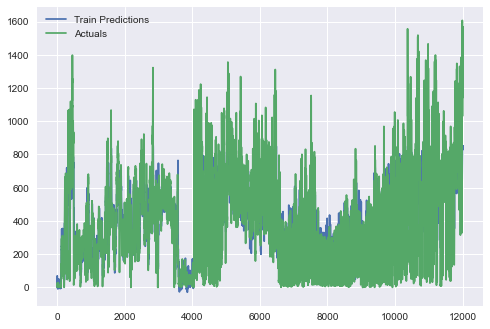

In [20]:
model = load_model('5H_Forecast/5H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(5,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 6 hours forecast

In [21]:
%%time

Trainer(6,6,12)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 8ms/step - loss: 252945.6562 - mean_absolute_error: 413.2133 - val_loss: 367800.7500 - val_mean_absolute_error: 493.3962
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 251158.6719 - mean_absolute_error: 411.0125 - val_loss: 364834.9688 - val_mean_absolute_error: 490.4865
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 6ms/step - loss: 248898.3125 - mean_absolute_error: 408.3795 - val_loss: 362421.4688 - val_mean_absolute_error: 488.0782
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 247061.6406 - mean_absolute_error: 406.1903 - val_loss: 360228.0625 - val_mean_absolute_error: 485.8528
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 245166.3906 - mean_absolute_error: 403.9230 - val_loss: 357975.2812 - val_mean_absolute_error: 483.5408
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 243160.4531 - mean_absolute_error: 401.5417 - val_loss: 355500.5938 - val_mean_absolute_error: 481.0605
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 241138.2344 - mean_absolute_error: 399.1577 - val_loss: 353024.8438 - val_mean_absolute_error: 478.5712
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 239023.3594 - mean_absolute_error: 396.7003 - val_loss: 350409.3750 - val_mean_absolute_error: 475.9560
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 236797.5000 - mean_absolute_error: 394.1318 - val_loss: 347662.1875 - val_mean_absolute_error: 473.2267
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 234466.8594 - mean_absolute_error: 391.4493 - val_loss: 344785.0625 - val_mean_absolute_error: 470.3881
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 6ms/step - loss: 232035.2656 - mean_absolute_error: 388.6895 - val_loss: 341788.2812 - val_mean_absolute_error: 467.4633
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 229507.7031 - mean_absolute_error: 385.8369 - val_loss: 338671.5938 - val_mean_absolute_error: 464.4501
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 226884.3594 - mean_absolute_error: 382.8946 - val_loss: 335427.1250 - val_mean_absolute_error: 461.3370
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 6ms/step - loss: 224168.1094 - mean_absolute_error: 379.8632 - val_loss: 332077.2500 - val_mean_absolute_error: 458.1343
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 221371.2188 - mean_absolute_error: 376.7563 - val_loss: 328620.9375 - val_mean_absolute_error: 454.8476
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 218434.7500 - mean_absolute_error: 373.5135 - val_loss: 324855.9688 - val_mean_absolute_error: 451.3054
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 215328.1875 - mean_absolute_error: 370.1294 - val_loss: 321113.8750 - val_mean_absolute_error: 447.8116
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 6ms/step - loss: 212239.1875 - mean_absolute_error: 366.7553 - val_loss: 317293.3750 - val_mean_absolute_error: 444.2752
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 7ms/step - loss: 209093.1719 - mean_absolute_error: 363.3440 - val_loss: 313400.2500 - val_mean_absolute_error: 440.7078
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 6ms/step - loss: 205895.9375 - mean_absolute_error: 359.9094 - val_loss: 309424.1250 - val_mean_absolute_error: 437.0837
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 202641.2188 - mean_absolute_error: 356.4085 - val_loss: 305373.7812 - val_mean_absolute_error: 433.4016
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 199339.9062 - mean_absolute_error: 352.8727 - val_loss: 301261.2500 - val_mean_absolute_error: 429.6696
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 6ms/step - loss: 195838.6562 - mean_absolute_error: 349.1512 - val_loss: 296754.8125 - val_mean_absolute_error: 425.5836
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 6ms/step - loss: 192295.5000 - mean_absolute_error: 345.3885 - val_loss: 292425.1250 - val_mean_absolute_error: 421.6411
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 6ms/step - loss: 188811.0938 - mean_absolute_error: 341.6891 - val_loss: 288059.3125 - val_mean_absolute_error: 417.6570
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 2s 6ms/step - loss: 185296.3125 - mean_absolute_error: 337.9913 - val_loss: 283638.4375 - val_mean_absolute_error: 413.6341
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 6ms/step - loss: 181719.4844 - mean_absolute_error: 334.1913 - val_loss: 278906.3750 - val_mean_absolute_error: 409.2707
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 6ms/step - loss: 177835.1250 - mean_absolute_error: 330.0887 - val_loss: 274187.9688 - val_mean_absolute_error: 405.0031
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 6ms/step - loss: 174201.1094 - mean_absolute_error: 326.2624 - val_loss: 269583.9375 - val_mean_absolute_error: 400.8186
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 170570.6406 - mean_absolute_error: 322.4284 - val_loss: 264974.6562 - val_mean_absolute_error: 396.6149
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 6ms/step - loss: 166952.0156 - mean_absolute_error: 318.5829 - val_loss: 260343.9688 - val_mean_absolute_error: 392.3599
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 6ms/step - loss: 163344.8906 - mean_absolute_error: 314.7450 - val_loss: 255724.0000 - val_mean_absolute_error: 388.0922
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 6ms/step - loss: 159747.9688 - mean_absolute_error: 310.9198 - val_loss: 251092.0625 - val_mean_absolute_error: 383.8072
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 2s 7ms/step - loss: 156169.0781 - mean_absolute_error: 307.1176 - val_loss: 246462.4844 - val_mean_absolute_error: 379.5096
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 6ms/step - loss: 152602.5938 - mean_absolute_error: 303.3270 - val_loss: 241836.9219 - val_mean_absolute_error: 375.2189
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 2s 6ms/step - loss: 149058.5625 - mean_absolute_error: 299.5101 - val_loss: 237204.8906 - val_mean_absolute_error: 370.8618
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 6ms/step - loss: 145559.6094 - mean_absolute_error: 295.7597 - val_loss: 232620.8594 - val_mean_absolute_error: 366.5407
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 6ms/step - loss: 142085.9844 - mean_absolute_error: 292.0004 - val_loss: 228051.9219 - val_mean_absolute_error: 362.2113
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 7ms/step - loss: 138651.1250 - mean_absolute_error: 288.3249 - val_loss: 223489.1719 - val_mean_absolute_error: 357.8963
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 6ms/step - loss: 135258.7344 - mean_absolute_error: 284.6567 - val_loss: 218965.4688 - val_mean_absolute_error: 353.6241
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 131768.0156 - mean_absolute_error: 280.8741 - val_loss: 214199.1875 - val_mean_absolute_error: 349.1311
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 128418.4531 - mean_absolute_error: 277.2419 - val_loss: 209714.1719 - val_mean_absolute_error: 344.8691
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 125181.8438 - mean_absolute_error: 273.7711 - val_loss: 205303.5625 - val_mean_absolute_error: 340.6731
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 122041.6406 - mean_absolute_error: 270.4131 - val_loss: 201001.0000 - val_mean_absolute_error: 336.5767
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 118984.5938 - mean_absolute_error: 267.1516 - val_loss: 196819.4219 - val_mean_absolute_error: 332.6714
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 7ms/step - loss: 115980.1406 - mean_absolute_error: 263.8693 - val_loss: 192679.5000 - val_mean_absolute_error: 328.8100
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 6ms/step - loss: 113059.2188 - mean_absolute_error: 260.7776 - val_loss: 188602.8281 - val_mean_absolute_error: 325.0452
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 6ms/step - loss: 110248.2500 - mean_absolute_error: 257.7723 - val_loss: 184608.6406 - val_mean_absolute_error: 321.2870
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 6ms/step - loss: 107527.9219 - mean_absolute_error: 254.9280 - val_loss: 180733.7969 - val_mean_absolute_error: 317.7002
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 6ms/step - loss: 104907.0781 - mean_absolute_error: 252.1732 - val_loss: 176960.7656 - val_mean_absolute_error: 314.1920
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 102398.4766 - mean_absolute_error: 249.6096 - val_loss: 173333.3281 - val_mean_absolute_error: 310.9215
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 99955.4219 - mean_absolute_error: 246.9283 - val_loss: 169778.3438 - val_mean_absolute_error: 307.6339
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 97578.9922 - mean_absolute_error: 244.1759 - val_loss: 166377.0000 - val_mean_absolute_error: 304.6133
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 2s 6ms/step - loss: 95288.7031 - mean_absolute_error: 241.4928 - val_loss: 162925.7812 - val_mean_absolute_error: 301.3996
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 93080.0938 - mean_absolute_error: 238.8085 - val_loss: 159619.2188 - val_mean_absolute_error: 298.3389
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 6ms/step - loss: 90933.8125 - mean_absolute_error: 236.0330 - val_loss: 156262.2344 - val_mean_absolute_error: 295.0879
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 88896.7656 - mean_absolute_error: 233.7937 - val_loss: 153112.1719 - val_mean_absolute_error: 292.1457
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 2s 6ms/step - loss: 86902.5156 - mean_absolute_error: 231.0987 - val_loss: 150113.0000 - val_mean_absolute_error: 289.2976
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 84934.4297 - mean_absolute_error: 228.3002 - val_loss: 146714.6406 - val_mean_absolute_error: 285.4986
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 2s 7ms/step - loss: 82980.6328 - mean_absolute_error: 225.4848 - val_loss: 143670.0781 - val_mean_absolute_error: 282.6478
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 6ms/step - loss: 81248.3438 - mean_absolute_error: 223.1817 - val_loss: 140739.9062 - val_mean_absolute_error: 279.6712
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 6ms/step - loss: 79506.9375 - mean_absolute_error: 220.3459 - val_loss: 137837.9531 - val_mean_absolute_error: 276.7413
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 6ms/step - loss: 77868.0547 - mean_absolute_error: 217.9342 - val_loss: 135047.4688 - val_mean_absolute_error: 273.7489
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 76305.6094 - mean_absolute_error: 215.4269 - val_loss: 132343.4531 - val_mean_absolute_error: 271.1844
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 6ms/step - loss: 74771.8516 - mean_absolute_error: 213.0359 - val_loss: 129558.7422 - val_mean_absolute_error: 268.0846
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 2s 6ms/step - loss: 73403.7734 - mean_absolute_error: 211.0772 - val_loss: 126926.5781 - val_mean_absolute_error: 265.2328
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 72062.0547 - mean_absolute_error: 209.0900 - val_loss: 124003.3906 - val_mean_absolute_error: 261.0029
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 70778.9844 - mean_absolute_error: 207.0554 - val_loss: 121764.3672 - val_mean_absolute_error: 259.2357
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 69581.2422 - mean_absolute_error: 205.3661 - val_loss: 119304.1406 - val_mean_absolute_error: 256.2801
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 7ms/step - loss: 68494.9922 - mean_absolute_error: 203.6937 - val_loss: 117030.4219 - val_mean_absolute_error: 253.7143
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 6ms/step - loss: 67395.3281 - mean_absolute_error: 201.7068 - val_loss: 114626.6250 - val_mean_absolute_error: 250.1947
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 66126.1328 - mean_absolute_error: 198.7391 - val_loss: 112214.8516 - val_mean_absolute_error: 247.2479
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 2s 6ms/step - loss: 64948.3438 - mean_absolute_error: 196.7251 - val_loss: 109921.4609 - val_mean_absolute_error: 244.4170
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 6ms/step - loss: 63892.6445 - mean_absolute_error: 194.8939 - val_loss: 107586.8438 - val_mean_absolute_error: 241.2308
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 2s 6ms/step - loss: 62778.0898 - mean_absolute_error: 192.6693 - val_loss: 105357.1484 - val_mean_absolute_error: 238.2198
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 6ms/step - loss: 61876.2734 - mean_absolute_error: 191.2898 - val_loss: 103042.6562 - val_mean_absolute_error: 234.7202
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 2s 6ms/step - loss: 60834.4453 - mean_absolute_error: 189.3834 - val_loss: 101201.2656 - val_mean_absolute_error: 232.6355
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 2s 6ms/step - loss: 59965.4570 - mean_absolute_error: 187.8461 - val_loss: 99308.4453 - val_mean_absolute_error: 230.1192
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 6ms/step - loss: 59232.9727 - mean_absolute_error: 186.7203 - val_loss: 97606.6250 - val_mean_absolute_error: 228.1077
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 58537.0742 - mean_absolute_error: 185.6880 - val_loss: 96070.1250 - val_mean_absolute_error: 225.5506
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 57913.3008 - mean_absolute_error: 184.6181 - val_loss: 94338.0781 - val_mean_absolute_error: 223.9160
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 2s 6ms/step - loss: 57223.5312 - mean_absolute_error: 183.3574 - val_loss: 92907.5078 - val_mean_absolute_error: 221.4267
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 56351.9648 - mean_absolute_error: 181.3722 - val_loss: 91191.4219 - val_mean_absolute_error: 218.9888
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 2s 6ms/step - loss: 55802.3828 - mean_absolute_error: 180.7524 - val_loss: 89777.2109 - val_mean_absolute_error: 217.3540
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 2s 6ms/step - loss: 55262.4844 - mean_absolute_error: 179.7293 - val_loss: 88530.1719 - val_mean_absolute_error: 216.7405
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 2s 6ms/step - loss: 54778.3594 - mean_absolute_error: 179.0327 - val_loss: 87328.9766 - val_mean_absolute_error: 213.9531
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 54280.9609 - mean_absolute_error: 178.2884 - val_loss: 86104.4766 - val_mean_absolute_error: 212.9419
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 2s 6ms/step - loss: 53609.9844 - mean_absolute_error: 176.7235 - val_loss: 84938.8281 - val_mean_absolute_error: 210.6663
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 2s 6ms/step - loss: 53106.8242 - mean_absolute_error: 175.8563 - val_loss: 83599.4453 - val_mean_absolute_error: 209.4937
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 6ms/step - loss: 52686.0117 - mean_absolute_error: 175.2145 - val_loss: 82644.9297 - val_mean_absolute_error: 208.4842
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 52380.3906 - mean_absolute_error: 174.5742 - val_loss: 81856.6719 - val_mean_absolute_error: 207.8227
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 2s 6ms/step - loss: 52014.9531 - mean_absolute_error: 173.8831 - val_loss: 80895.1875 - val_mean_absolute_error: 206.5195
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 6ms/step - loss: 51624.7266 - mean_absolute_error: 173.1150 - val_loss: 80637.3594 - val_mean_absolute_error: 205.3849
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 2s 6ms/step - loss: 51321.5664 - mean_absolute_error: 172.5681 - val_loss: 79563.8203 - val_mean_absolute_error: 205.0097
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 2s 6ms/step - loss: 50967.8672 - mean_absolute_error: 171.6145 - val_loss: 78465.5859 - val_mean_absolute_error: 202.7170
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 2s 6ms/step - loss: 50519.4375 - mean_absolute_error: 170.8289 - val_loss: 78353.9297 - val_mean_absolute_error: 202.4588
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 50121.8516 - mean_absolute_error: 169.5681 - val_loss: 77468.9688 - val_mean_absolute_error: 201.7672
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 2s 6ms/step - loss: 49739.5273 - mean_absolute_error: 168.7211 - val_loss: 76974.1406 - val_mean_absolute_error: 201.2952
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 2s 6ms/step - loss: 49343.7266 - mean_absolute_error: 168.0843 - val_loss: 76932.1562 - val_mean_absolute_error: 200.7800
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 2s 6ms/step - loss: 49056.1562 - mean_absolute_error: 167.5157 - val_loss: 77013.9688 - val_mean_absolute_error: 203.0557

-----------------------------------------------------------------------------------------------------------

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 8ms/step - loss: 253222.5938 - m

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 7ms/step - loss: 250044.2656 - mean_absolute_error: 409.5395 - val_loss: 362301.9062 - val_mean_absolute_error: 487.5866
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 6ms/step - loss: 245740.1562 - mean_absolute_error: 404.5825 - val_loss: 358196.5312 - val_mean_absolute_error: 483.6634
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 242796.3594 - mean_absolute_error: 401.1286 - val_loss: 354697.5938 - val_mean_absolute_error: 480.2327
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 240288.5625 - mean_absolute_error: 398.1835 - val_loss: 351847.2500 - val_mean_absolute_error: 477.3698
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 237906.8594 - mean_absolute_error: 395.4112 - val_loss: 348799.1250 - val_mean_absolute_error: 474.3265
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 235317.5469 - mean_absolute_error: 392.4277 - val_loss: 345758.4688 - val_mean_absolute_error: 471.3258
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 232789.1562 - mean_absolute_error: 389.5550 - val_loss: 342661.2812 - val_mean_absolute_error: 468.2952
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 230117.8750 - mean_absolute_error: 386.5448 - val_loss: 339171.0000 - val_mean_absolute_error: 464.9146
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 7ms/step - loss: 227227.2656 - mean_absolute_error: 383.2755 - val_loss: 335788.3125 - val_mean_absolute_error: 461.6657
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 7ms/step - loss: 224382.8906 - mean_absolute_error: 380.0931 - val_loss: 332121.8125 - val_mean_absolute_error: 458.1489
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 221274.8750 - mean_absolute_error: 376.6636 - val_loss: 328415.7812 - val_mean_absolute_error: 454.6368
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 218242.8594 - mean_absolute_error: 373.3112 - val_loss: 324693.1250 - val_mean_absolute_error: 451.1350
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 215164.3906 - mean_absolute_error: 369.9297 - val_loss: 320896.3750 - val_mean_absolute_error: 447.5929
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 212029.5938 - mean_absolute_error: 366.5303 - val_loss: 317020.5312 - val_mean_absolute_error: 444.0085
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 7ms/step - loss: 208835.1094 - mean_absolute_error: 363.0594 - val_loss: 313064.0938 - val_mean_absolute_error: 440.3857
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 205589.7344 - mean_absolute_error: 359.5907 - val_loss: 309030.8750 - val_mean_absolute_error: 436.7117
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 7ms/step - loss: 202292.9688 - mean_absolute_error: 356.0391 - val_loss: 304937.1250 - val_mean_absolute_error: 432.9921
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 198947.8594 - mean_absolute_error: 352.4603 - val_loss: 300769.0000 - val_mean_absolute_error: 429.2128
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 195561.8281 - mean_absolute_error: 348.8559 - val_loss: 296542.0625 - val_mean_absolute_error: 425.3803
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 192136.9531 - mean_absolute_error: 345.1857 - val_loss: 292255.3438 - val_mean_absolute_error: 421.4821
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 188678.4531 - mean_absolute_error: 341.4828 - val_loss: 287929.7812 - val_mean_absolute_error: 417.5408
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 185190.0469 - mean_absolute_error: 337.7466 - val_loss: 283549.5312 - val_mean_absolute_error: 413.5560
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 6ms/step - loss: 181681.7188 - mean_absolute_error: 334.0143 - val_loss: 279141.0938 - val_mean_absolute_error: 409.5314
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 178159.0000 - mean_absolute_error: 330.2410 - val_loss: 274691.6875 - val_mean_absolute_error: 405.4796
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 174622.9531 - mean_absolute_error: 326.4846 - val_loss: 270226.3438 - val_mean_absolute_error: 401.4186
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 171082.0469 - mean_absolute_error: 322.6769 - val_loss: 265723.6562 - val_mean_absolute_error: 397.3074
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 167536.7188 - mean_absolute_error: 318.9212 - val_loss: 261213.5938 - val_mean_absolute_error: 393.1809
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 163998.2031 - mean_absolute_error: 315.1052 - val_loss: 256692.3594 - val_mean_absolute_error: 389.0142
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 160341.7031 - mean_absolute_error: 311.1531 - val_loss: 251918.2188 - val_mean_absolute_error: 384.6141
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 156668.7969 - mean_absolute_error: 307.1811 - val_loss: 247199.0469 - val_mean_absolute_error: 380.2182
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 153080.9062 - mean_absolute_error: 303.3210 - val_loss: 242596.6719 - val_mean_absolute_error: 375.9301
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 149551.2031 - mean_absolute_error: 299.5005 - val_loss: 238029.1875 - val_mean_absolute_error: 371.6572
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 146063.7812 - mean_absolute_error: 295.7131 - val_loss: 233479.0781 - val_mean_absolute_error: 367.3802
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 142614.3750 - mean_absolute_error: 291.9636 - val_loss: 228975.3125 - val_mean_absolute_error: 363.1402
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 139206.1875 - mean_absolute_error: 288.2018 - val_loss: 224478.2812 - val_mean_absolute_error: 358.8707
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 135835.1875 - mean_absolute_error: 284.5194 - val_loss: 220025.4219 - val_mean_absolute_error: 354.6877
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 132519.5781 - mean_absolute_error: 280.9249 - val_loss: 215622.8125 - val_mean_absolute_error: 350.5534
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 129258.9453 - mean_absolute_error: 277.3360 - val_loss: 211276.7031 - val_mean_absolute_error: 346.4636
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 126064.8203 - mean_absolute_error: 273.8273 - val_loss: 206972.3594 - val_mean_absolute_error: 342.3643
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 122944.4453 - mean_absolute_error: 270.4066 - val_loss: 202763.5625 - val_mean_absolute_error: 338.3926
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 119885.7734 - mean_absolute_error: 267.0860 - val_loss: 198597.4688 - val_mean_absolute_error: 334.4315
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 116909.7812 - mean_absolute_error: 263.8698 - val_loss: 194507.6875 - val_mean_absolute_error: 330.5678
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 114016.2500 - mean_absolute_error: 260.7297 - val_loss: 190563.3125 - val_mean_absolute_error: 326.9873
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 111207.9375 - mean_absolute_error: 257.6583 - val_loss: 186666.8125 - val_mean_absolute_error: 323.3764
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 108491.6562 - mean_absolute_error: 254.7582 - val_loss: 182840.5469 - val_mean_absolute_error: 319.8150
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 105863.7500 - mean_absolute_error: 252.0013 - val_loss: 179163.4531 - val_mean_absolute_error: 316.5110
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 7ms/step - loss: 103321.5234 - mean_absolute_error: 249.2920 - val_loss: 175561.1250 - val_mean_absolute_error: 313.2570
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 7ms/step - loss: 100876.6328 - mean_absolute_error: 246.6731 - val_loss: 171968.6406 - val_mean_absolute_error: 309.8929
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 98542.9609 - mean_absolute_error: 244.2467 - val_loss: 168688.8750 - val_mean_absolute_error: 307.2332
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 7ms/step - loss: 96311.6094 - mean_absolute_error: 241.8202 - val_loss: 165302.8906 - val_mean_absolute_error: 304.0050
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 94130.6641 - mean_absolute_error: 239.4295 - val_loss: 161938.7656 - val_mean_absolute_error: 300.9158
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 7ms/step - loss: 91990.4531 - mean_absolute_error: 236.9164 - val_loss: 158690.4062 - val_mean_absolute_error: 297.8661
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 2s 6ms/step - loss: 89955.5547 - mean_absolute_error: 234.4188 - val_loss: 155529.2031 - val_mean_absolute_error: 294.8691
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 88033.0859 - mean_absolute_error: 232.1227 - val_loss: 152480.3125 - val_mean_absolute_error: 292.0201
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 86185.8125 - mean_absolute_error: 229.6887 - val_loss: 149457.1406 - val_mean_absolute_error: 289.1063
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 7ms/step - loss: 84301.4531 - mean_absolute_error: 226.8683 - val_loss: 146587.4531 - val_mean_absolute_error: 286.4338
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 82507.7969 - mean_absolute_error: 224.3441 - val_loss: 143524.4688 - val_mean_absolute_error: 282.9337
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 80722.5234 - mean_absolute_error: 221.4337 - val_loss: 140504.9062 - val_mean_absolute_error: 279.6080
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 2s 7ms/step - loss: 79052.8125 - mean_absolute_error: 219.0328 - val_loss: 137744.0938 - val_mean_absolute_error: 276.9533
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 77494.0312 - mean_absolute_error: 216.9038 - val_loss: 135018.9688 - val_mean_absolute_error: 274.2323
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 6ms/step - loss: 76022.3750 - mean_absolute_error: 214.7688 - val_loss: 132300.8594 - val_mean_absolute_error: 271.2646
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 74607.3047 - mean_absolute_error: 212.5925 - val_loss: 129814.3203 - val_mean_absolute_error: 268.8234
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 73099.8828 - mean_absolute_error: 209.7721 - val_loss: 127094.2109 - val_mean_absolute_error: 265.5557
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 7ms/step - loss: 71617.9219 - mean_absolute_error: 207.2442 - val_loss: 124329.1875 - val_mean_absolute_error: 262.1693
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 70302.8984 - mean_absolute_error: 204.9791 - val_loss: 122050.0703 - val_mean_absolute_error: 260.0538
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 69022.1484 - mean_absolute_error: 202.8319 - val_loss: 119242.0703 - val_mean_absolute_error: 255.8866
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 6ms/step - loss: 67857.4375 - mean_absolute_error: 200.9211 - val_loss: 117145.6562 - val_mean_absolute_error: 254.1119
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 7ms/step - loss: 66800.8203 - mean_absolute_error: 199.3753 - val_loss: 114961.0547 - val_mean_absolute_error: 251.5601
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 65803.9453 - mean_absolute_error: 197.7352 - val_loss: 112643.3203 - val_mean_absolute_error: 248.3758
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 64860.8398 - mean_absolute_error: 196.2483 - val_loss: 110806.7422 - val_mean_absolute_error: 246.3607
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 63761.9492 - mean_absolute_error: 194.0892 - val_loss: 108592.4766 - val_mean_absolute_error: 243.3239
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 62916.6758 - mean_absolute_error: 192.5978 - val_loss: 106713.3828 - val_mean_absolute_error: 240.8860
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 62117.9648 - mean_absolute_error: 191.2650 - val_loss: 104944.0859 - val_mean_absolute_error: 238.8889
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 61352.0547 - mean_absolute_error: 190.1562 - val_loss: 103260.4062 - val_mean_absolute_error: 236.5139
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 6ms/step - loss: 60511.5078 - mean_absolute_error: 188.3616 - val_loss: 101505.2734 - val_mean_absolute_error: 234.4627
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 59689.6172 - mean_absolute_error: 187.0268 - val_loss: 99637.8672 - val_mean_absolute_error: 231.9366
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 58940.3555 - mean_absolute_error: 185.3188 - val_loss: 97936.4062 - val_mean_absolute_error: 229.2938
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 7ms/step - loss: 58213.3789 - mean_absolute_error: 183.8183 - val_loss: 96381.3359 - val_mean_absolute_error: 227.1900
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 7ms/step - loss: 57504.0547 - mean_absolute_error: 182.5243 - val_loss: 95016.0312 - val_mean_absolute_error: 226.1209
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 56843.0820 - mean_absolute_error: 181.4332 - val_loss: 93436.0078 - val_mean_absolute_error: 223.4815
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 55986.0273 - mean_absolute_error: 179.1752 - val_loss: 91719.3203 - val_mean_absolute_error: 220.4360
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 55263.3906 - mean_absolute_error: 178.1704 - val_loss: 90166.4297 - val_mean_absolute_error: 218.3914
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 54638.6016 - mean_absolute_error: 176.9382 - val_loss: 88818.5234 - val_mean_absolute_error: 216.8347
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 53943.5625 - mean_absolute_error: 175.7770 - val_loss: 87370.0859 - val_mean_absolute_error: 214.8762
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 53417.6445 - mean_absolute_error: 174.7044 - val_loss: 86788.8594 - val_mean_absolute_error: 214.4886
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 2s 7ms/step - loss: 52801.5195 - mean_absolute_error: 173.7594 - val_loss: 84876.1406 - val_mean_absolute_error: 211.9526
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 2s 7ms/step - loss: 52241.3281 - mean_absolute_error: 172.6042 - val_loss: 83652.6562 - val_mean_absolute_error: 210.4571
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 51609.4492 - mean_absolute_error: 171.2489 - val_loss: 82624.8750 - val_mean_absolute_error: 208.8734
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 7ms/step - loss: 50927.1250 - mean_absolute_error: 169.8473 - val_loss: 81542.9922 - val_mean_absolute_error: 207.1031
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 50247.6133 - mean_absolute_error: 168.5708 - val_loss: 79972.2656 - val_mean_absolute_error: 204.6273
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 49675.5977 - mean_absolute_error: 167.3800 - val_loss: 78824.2500 - val_mean_absolute_error: 203.3040
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 6ms/step - loss: 49121.0234 - mean_absolute_error: 166.3758 - val_loss: 77896.7266 - val_mean_absolute_error: 201.9896
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 48590.1406 - mean_absolute_error: 165.1270 - val_loss: 77229.3359 - val_mean_absolute_error: 200.3987
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 2s 6ms/step - loss: 48062.7578 - mean_absolute_error: 163.8921 - val_loss: 77529.1328 - val_mean_absolute_error: 200.6591
Epoch 96/100
376/376 [==============================] - 3s 7ms/step - loss: 47465.3281 - mean_absolute_error: 162.8185 - val_loss: 74664.8359 - val_mean_absolute_error: 197.7694
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 47045.3828 - mean_absolute_error: 161.6581 - val_loss: 73802.6094 - val_mean_absolute_error: 197.1315
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 46466.2266 - mean_absolute_error: 160.2174 - val_loss: 73047.1953 - val_mean_absolute_error: 195.0532
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 46150.5781 - mean_absolute_error: 159.6895 - val_loss: 72623.8906 - val_mean_absolute_error: 195.6792
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 2s 6ms/step - loss: 45768.8984 - mean_absolute_error: 158.6837 - val_loss: 71876.5547 - val_mean_absolute_error: 194.3041
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 10ms/step - loss: 250832.1562 - mean_absolute_error: 410.5682 - val_loss: 363141.4375 - val_mean_absolute_error: 488.4048
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 245004.2031 - mean_absolute_error: 403.4980 - val_loss: 355158.0625 - val_mean_absolute_error: 480.3629
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 238864.5938 - mean_absolute_error: 396.3842 - val_loss: 347647.2500 - val_mean_absolute_error: 473.0349
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 232731.5000 - mean_absolute_error: 389.3792 - val_loss: 340426.9062 - val_mean_absolute_error: 465.9734
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 226627.8750 - mean_absolute_error: 382.5754 - val_loss: 332919.2812 - val_mean_absolute_error: 458.8805
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 220608.0156 - mean_absolute_error: 375.8748 - val_loss: 325519.0625 - val_mean_absolute_error: 451.8627
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 214502.8125 - mean_absolute_error: 369.1647 - val_loss: 318071.4062 - val_mean_absolute_error: 444.9317
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 208340.1562 - mean_absolute_error: 362.4919 - val_loss: 310425.8750 - val_mean_absolute_error: 437.9330
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 202001.6406 - mean_absolute_error: 355.6330 - val_loss: 302159.3125 - val_mean_absolute_error: 430.4110
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 195170.8906 - mean_absolute_error: 348.3190 - val_loss: 293905.8438 - val_mean_absolute_error: 422.9279
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 188530.1562 - mean_absolute_error: 341.1945 - val_loss: 285611.4062 - val_mean_absolute_error: 415.3695
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 181856.9531 - mean_absolute_error: 334.1408 - val_loss: 277227.9688 - val_mean_absolute_error: 407.7248
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 175151.6562 - mean_absolute_error: 326.9551 - val_loss: 268769.5938 - val_mean_absolute_error: 400.0365
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 168389.8281 - mean_absolute_error: 319.6844 - val_loss: 259893.4062 - val_mean_absolute_error: 391.8931
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 161402.4688 - mean_absolute_error: 312.1478 - val_loss: 251249.1406 - val_mean_absolute_error: 383.9305
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 154733.2031 - mean_absolute_error: 304.9320 - val_loss: 242716.0000 - val_mean_absolute_error: 376.0141
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 148182.2656 - mean_absolute_error: 297.7423 - val_loss: 234325.8281 - val_mean_absolute_error: 368.2051
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 141782.8594 - mean_absolute_error: 290.6984 - val_loss: 226012.0312 - val_mean_absolute_error: 360.3216
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 135566.9844 - mean_absolute_error: 283.8152 - val_loss: 217908.1562 - val_mean_absolute_error: 352.7278
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 129562.7500 - mean_absolute_error: 277.2000 - val_loss: 209995.3125 - val_mean_absolute_error: 345.2888
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 123708.9922 - mean_absolute_error: 270.7066 - val_loss: 202018.4844 - val_mean_absolute_error: 337.7114
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 117932.3906 - mean_absolute_error: 264.3344 - val_loss: 194454.0625 - val_mean_absolute_error: 330.7078
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 112607.0547 - mean_absolute_error: 258.3523 - val_loss: 187275.8750 - val_mean_absolute_error: 324.0176
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 107614.4688 - mean_absolute_error: 252.8875 - val_loss: 180359.6562 - val_mean_absolute_error: 317.4356
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 102959.9297 - mean_absolute_error: 247.9504 - val_loss: 173953.2344 - val_mean_absolute_error: 311.7137
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 98665.4844 - mean_absolute_error: 243.3023 - val_loss: 167801.9844 - val_mean_absolute_error: 306.0479
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 94701.5703 - mean_absolute_error: 239.0524 - val_loss: 161967.5938 - val_mean_absolute_error: 300.7241
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 91097.4141 - mean_absolute_error: 235.1601 - val_loss: 156589.3594 - val_mean_absolute_error: 296.0062
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 87715.0703 - mean_absolute_error: 231.0310 - val_loss: 151287.4219 - val_mean_absolute_error: 290.7084
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 84513.7734 - mean_absolute_error: 226.8332 - val_loss: 146173.4062 - val_mean_absolute_error: 285.7296
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 81553.2500 - mean_absolute_error: 222.9094 - val_loss: 141272.4688 - val_mean_absolute_error: 280.8023
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 78659.9141 - mean_absolute_error: 218.5988 - val_loss: 136342.5938 - val_mean_absolute_error: 275.4667
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 75931.4453 - mean_absolute_error: 214.2561 - val_loss: 132025.1719 - val_mean_absolute_error: 271.5005
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 73580.8281 - mean_absolute_error: 211.0842 - val_loss: 127452.5547 - val_mean_absolute_error: 266.0944
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 71298.3828 - mean_absolute_error: 207.5505 - val_loss: 123221.3750 - val_mean_absolute_error: 261.0281
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 69210.8906 - mean_absolute_error: 203.9726 - val_loss: 119349.3672 - val_mean_absolute_error: 256.7733
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 67391.2109 - mean_absolute_error: 200.6746 - val_loss: 115747.3750 - val_mean_absolute_error: 252.7819
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 65592.6953 - mean_absolute_error: 197.3901 - val_loss: 111865.5547 - val_mean_absolute_error: 247.4271
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 64134.8867 - mean_absolute_error: 195.0821 - val_loss: 108880.5156 - val_mean_absolute_error: 244.5425
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 62901.0781 - mean_absolute_error: 193.2463 - val_loss: 106498.2344 - val_mean_absolute_error: 242.6324
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 61776.0391 - mean_absolute_error: 191.3974 - val_loss: 103525.1094 - val_mean_absolute_error: 238.3462
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 60721.2344 - mean_absolute_error: 189.3310 - val_loss: 100970.7500 - val_mean_absolute_error: 235.3230
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 59750.9609 - mean_absolute_error: 187.6496 - val_loss: 98422.1562 - val_mean_absolute_error: 231.6682
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 58690.9648 - mean_absolute_error: 185.5709 - val_loss: 96436.9297 - val_mean_absolute_error: 229.5001
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 57656.9102 - mean_absolute_error: 183.2581 - val_loss: 93975.0312 - val_mean_absolute_error: 225.9740
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 56502.9922 - mean_absolute_error: 180.9247 - val_loss: 91455.2344 - val_mean_absolute_error: 222.4277
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 55593.1992 - mean_absolute_error: 179.5106 - val_loss: 89443.1250 - val_mean_absolute_error: 219.6488
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 54847.7773 - mean_absolute_error: 178.2542 - val_loss: 87913.4766 - val_mean_absolute_error: 217.9142
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 54104.1602 - mean_absolute_error: 177.0679 - val_loss: 86616.5312 - val_mean_absolute_error: 216.6351
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 53307.9023 - mean_absolute_error: 175.2851 - val_loss: 84784.2969 - val_mean_absolute_error: 214.3435
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 52529.4570 - mean_absolute_error: 173.7103 - val_loss: 83121.7656 - val_mean_absolute_error: 211.9139
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 51744.3750 - mean_absolute_error: 172.1749 - val_loss: 81566.8750 - val_mean_absolute_error: 209.7032
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 51101.0664 - mean_absolute_error: 171.2058 - val_loss: 81338.9688 - val_mean_absolute_error: 209.0224
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 50572.3281 - mean_absolute_error: 170.3865 - val_loss: 79826.0156 - val_mean_absolute_error: 207.3237
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 49952.6602 - mean_absolute_error: 168.9730 - val_loss: 78198.1328 - val_mean_absolute_error: 205.3594
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 49325.5859 - mean_absolute_error: 167.5715 - val_loss: 77310.9453 - val_mean_absolute_error: 203.8196
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 48717.8477 - mean_absolute_error: 166.0477 - val_loss: 75628.8828 - val_mean_absolute_error: 201.9832
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 48007.9766 - mean_absolute_error: 164.5839 - val_loss: 75391.7578 - val_mean_absolute_error: 201.0573
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 47462.6172 - mean_absolute_error: 163.5328 - val_loss: 74503.2266 - val_mean_absolute_error: 200.3367
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 46943.5195 - mean_absolute_error: 162.2848 - val_loss: 74235.3281 - val_mean_absolute_error: 199.5047
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 46505.9141 - mean_absolute_error: 161.3949 - val_loss: 73374.5625 - val_mean_absolute_error: 198.6903
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 46023.0039 - mean_absolute_error: 160.3889 - val_loss: 72863.9766 - val_mean_absolute_error: 197.6042
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 45429.6953 - mean_absolute_error: 159.1783 - val_loss: 72209.0234 - val_mean_absolute_error: 196.2975
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 45053.9961 - mean_absolute_error: 158.2029 - val_loss: 70910.4219 - val_mean_absolute_error: 195.3956
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 44585.2695 - mean_absolute_error: 157.2230 - val_loss: 70809.1250 - val_mean_absolute_error: 194.7595
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 44210.3281 - mean_absolute_error: 156.4379 - val_loss: 70997.9844 - val_mean_absolute_error: 194.7388
Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 43883.8750 - mean_absolute_error: 155.6481 - val_loss: 71115.0312 - val_mean_absolute_error: 194.4465
Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 43699.4102 - mean_absolute_error: 155.1632 - val_loss: 69147.1641 - val_mean_absolute_error: 192.8568
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 43383.8164 - mean_absolute_error: 154.6006 - val_loss: 70612.8047 - val_mean_absolute_error: 193.5386
Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 43220.4062 - mean_absolute_error: 154.1790 - val_loss: 69912.1406 - val_mean_absolute_error: 192.1203
Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 42945.5547 - mean_absolute_error: 153.2279 - val_loss: 70454.0938 - val_mean_absolute_error: 193.0434
Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 42503.1797 - mean_absolute_error: 152.2155 - val_loss: 69177.5391 - val_mean_absolute_error: 191.3501
Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 42178.2188 - mean_absolute_error: 151.5912 - val_loss: 68601.0391 - val_mean_absolute_error: 191.2617
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 41940.8398 - mean_absolute_error: 151.0382 - val_loss: 68439.5000 - val_mean_absolute_error: 190.5049
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 41607.5664 - mean_absolute_error: 150.1749 - val_loss: 67386.9688 - val_mean_absolute_error: 189.5113
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 41398.8711 - mean_absolute_error: 149.5168 - val_loss: 67368.4141 - val_mean_absolute_error: 190.3684
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 41225.4102 - mean_absolute_error: 149.3515 - val_loss: 67565.9922 - val_mean_absolute_error: 189.8939
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 41001.2070 - mean_absolute_error: 148.5262 - val_loss: 66056.5859 - val_mean_absolute_error: 189.2205
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 40811.8516 - mean_absolute_error: 148.1852 - val_loss: 68052.7578 - val_mean_absolute_error: 189.6940
Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 40545.7422 - mean_absolute_error: 147.3451 - val_loss: 68524.5234 - val_mean_absolute_error: 189.8495
Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 40416.5078 - mean_absolute_error: 147.3406 - val_loss: 66541.3359 - val_mean_absolute_error: 188.3643
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 40269.5039 - mean_absolute_error: 146.7683 - val_loss: 66626.8281 - val_mean_absolute_error: 186.7772
Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 40209.4844 - mean_absolute_error: 146.3889 - val_loss: 66017.1484 - val_mean_absolute_error: 187.2234
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 39865.4844 - mean_absolute_error: 145.7028 - val_loss: 65425.1484 - val_mean_absolute_error: 186.3494
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 39712.1602 - mean_absolute_error: 145.4020 - val_loss: 66096.4844 - val_mean_absolute_error: 186.5019
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 39554.9844 - mean_absolute_error: 144.8690 - val_loss: 65902.6250 - val_mean_absolute_error: 187.4839
Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 39449.8164 - mean_absolute_error: 144.5712 - val_loss: 67828.1641 - val_mean_absolute_error: 187.8456
Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 39411.3281 - mean_absolute_error: 144.6306 - val_loss: 64215.0703 - val_mean_absolute_error: 184.9487
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 39230.9102 - mean_absolute_error: 144.2143 - val_loss: 66378.1016 - val_mean_absolute_error: 187.1118
Epoch 90/100
376/376 [==============================] - 4s 10ms/step - loss: 39063.1328 - mean_absolute_error: 143.7008 - val_loss: 66125.1562 - val_mean_absolute_error: 186.0554
Epoch 91/100
376/376 [==============================] - 4s 10ms/step - loss: 38906.4961 - mean_absolute_error: 143.3425 - val_loss: 65678.7422 - val_mean_absolute_error: 185.4755
Epoch 92/100
376/376 [==============================] - 4s 9ms/step - loss: 38721.1719 - mean_absolute_error: 142.7320 - val_loss: 65049.3516 - val_mean_absolute_error: 184.1296
Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 38667.0547 - mean_absolute_error: 142.7078 - val_loss: 63757.8320 - val_mean_absolute_error: 183.8503
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 38530.0078 - mean_absolute_error: 141.9812 - val_loss: 63294.6836 - val_mean_absolute_error: 182.3880
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 7ms/step - loss: 38309.2773 - mean_absolute_error: 141.8389 - val_loss: 65214.4180 - val_mean_absolute_error: 184.0181
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 38232.1680 - mean_absolute_error: 141.4100 - val_loss: 66394.1328 - val_mean_absolute_error: 185.6082
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 38258.5039 - mean_absolute_error: 141.4002 - val_loss: 64368.1719 - val_mean_absolute_error: 184.4153
Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 37977.5547 - mean_absolute_error: 140.7925 - val_loss: 62998.1797 - val_mean_absolute_error: 182.5377
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 37814.7344 - mean_absolute_error: 140.2240 - val_loss: 64363.9336 - val_mean_absolute_error: 184.3320
Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 37773.0195 - mean_absolute_error: 140.3722 - val_loss: 63983.4961 - val_mean_absolute_error: 184.7118

-----------------------------------------------------------------------------------------------------------

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
No

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 248999.8594 - mean_absolute_error: 408.3577 - val_loss: 361048.1562 - val_mean_absolute_error: 486.5917
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 244960.3281 - mean_absolute_error: 403.5700 - val_loss: 356075.9062 - val_mean_absolute_error: 481.5991
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 241446.1719 - mean_absolute_error: 399.4571 - val_loss: 352427.8750 - val_mean_absolute_error: 478.0263
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 238764.9688 - mean_absolute_error: 396.3657 - val_loss: 349290.2500 - val_mean_absolute_error: 474.9042
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 236188.8906 - mean_absolute_error: 393.3979 - val_loss: 346194.9062 - val_mean_absolute_error: 471.8271
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 233580.9531 - mean_absolute_error: 390.4101 - val_loss: 343013.0000 - val_mean_absolute_error: 468.6991
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 230744.3594 - mean_absolute_error: 387.1899 - val_loss: 339331.8750 - val_mean_absolute_error: 465.1133
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 227760.2500 - mean_absolute_error: 383.8495 - val_loss: 335847.9688 - val_mean_absolute_error: 461.7614
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 224836.4844 - mean_absolute_error: 380.5844 - val_loss: 332262.0625 - val_mean_absolute_error: 458.3256
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 221840.7188 - mean_absolute_error: 377.2114 - val_loss: 328577.6250 - val_mean_absolute_error: 454.8146
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 218768.1250 - mean_absolute_error: 373.8462 - val_loss: 324798.5625 - val_mean_absolute_error: 451.2538
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 215627.3750 - mean_absolute_error: 370.3857 - val_loss: 320922.6562 - val_mean_absolute_error: 447.6320
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 212411.9219 - mean_absolute_error: 366.8728 - val_loss: 316953.5000 - val_mean_absolute_error: 443.9550
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 209127.9844 - mean_absolute_error: 363.3003 - val_loss: 312887.2812 - val_mean_absolute_error: 440.2314
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 205783.7188 - mean_absolute_error: 359.6693 - val_loss: 308741.5625 - val_mean_absolute_error: 436.4524
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 202389.1875 - mean_absolute_error: 355.9969 - val_loss: 304535.9062 - val_mean_absolute_error: 432.6335
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 198937.0469 - mean_absolute_error: 352.2194 - val_loss: 300248.0000 - val_mean_absolute_error: 428.7416
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 195446.1562 - mean_absolute_error: 348.4525 - val_loss: 295906.3750 - val_mean_absolute_error: 424.8059
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 191912.3594 - mean_absolute_error: 344.6120 - val_loss: 291480.1562 - val_mean_absolute_error: 420.7686
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 9ms/step - loss: 188165.7188 - mean_absolute_error: 340.5531 - val_loss: 286491.6562 - val_mean_absolute_error: 416.2400
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 184226.2031 - mean_absolute_error: 336.2650 - val_loss: 281778.3438 - val_mean_absolute_error: 411.9378
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 180461.4531 - mean_absolute_error: 332.2438 - val_loss: 277029.7500 - val_mean_absolute_error: 407.5818
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 176504.0156 - mean_absolute_error: 327.9635 - val_loss: 272030.3438 - val_mean_absolute_error: 403.0540
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 172665.9219 - mean_absolute_error: 323.8001 - val_loss: 267224.3125 - val_mean_absolute_error: 398.6851
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 168842.9375 - mean_absolute_error: 319.6165 - val_loss: 262389.8438 - val_mean_absolute_error: 394.2722
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 165034.0312 - mean_absolute_error: 315.4146 - val_loss: 257552.9062 - val_mean_absolute_error: 389.8206
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 161246.2344 - mean_absolute_error: 311.2621 - val_loss: 252741.8594 - val_mean_absolute_error: 385.3954
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 157461.0938 - mean_absolute_error: 307.0782 - val_loss: 247908.2969 - val_mean_absolute_error: 380.9258
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 153697.7500 - mean_absolute_error: 302.8700 - val_loss: 243085.4531 - val_mean_absolute_error: 376.4481
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 149968.8281 - mean_absolute_error: 298.6761 - val_loss: 238302.5781 - val_mean_absolute_error: 371.9871
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 146266.7500 - mean_absolute_error: 294.5433 - val_loss: 233539.3281 - val_mean_absolute_error: 367.5493
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 142599.5938 - mean_absolute_error: 290.3803 - val_loss: 228799.5000 - val_mean_absolute_error: 363.0939
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 138972.5938 - mean_absolute_error: 286.2070 - val_loss: 224066.8281 - val_mean_absolute_error: 358.5922
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 135401.6562 - mean_absolute_error: 282.1393 - val_loss: 219394.4844 - val_mean_absolute_error: 354.1852
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 131886.9844 - mean_absolute_error: 278.1514 - val_loss: 214793.3281 - val_mean_absolute_error: 349.8453
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 128432.9375 - mean_absolute_error: 274.1779 - val_loss: 210212.0938 - val_mean_absolute_error: 345.4754
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 9ms/step - loss: 125043.0469 - mean_absolute_error: 270.3913 - val_loss: 205714.2344 - val_mean_absolute_error: 341.2128
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 9ms/step - loss: 121733.6172 - mean_absolute_error: 266.6028 - val_loss: 201282.9375 - val_mean_absolute_error: 336.9548
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 118493.3281 - mean_absolute_error: 262.9323 - val_loss: 196888.7500 - val_mean_absolute_error: 332.7213
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 115345.8984 - mean_absolute_error: 259.3879 - val_loss: 192636.8438 - val_mean_absolute_error: 328.7105
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 112285.6094 - mean_absolute_error: 255.9166 - val_loss: 188408.0938 - val_mean_absolute_error: 324.6444
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 109357.9688 - mean_absolute_error: 252.8635 - val_loss: 184373.9375 - val_mean_absolute_error: 320.9386
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 106496.1406 - mean_absolute_error: 249.6550 - val_loss: 180415.5312 - val_mean_absolute_error: 317.3001
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 103758.3750 - mean_absolute_error: 246.6706 - val_loss: 176482.8906 - val_mean_absolute_error: 313.4623
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 101143.5938 - mean_absolute_error: 243.9588 - val_loss: 172799.1562 - val_mean_absolute_error: 310.1700
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 98643.4531 - mean_absolute_error: 241.2602 - val_loss: 169158.3750 - val_mean_absolute_error: 306.8497
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 96227.7578 - mean_absolute_error: 238.5848 - val_loss: 165642.7031 - val_mean_absolute_error: 303.6072
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 10ms/step - loss: 93939.8359 - mean_absolute_error: 236.1095 - val_loss: 162308.9375 - val_mean_absolute_error: 300.7256
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 91760.4141 - mean_absolute_error: 233.6329 - val_loss: 159035.9688 - val_mean_absolute_error: 297.8648
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 89613.4531 - mean_absolute_error: 231.1347 - val_loss: 155882.7344 - val_mean_absolute_error: 294.9022
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 87356.0625 - mean_absolute_error: 227.8795 - val_loss: 152545.8906 - val_mean_absolute_error: 291.6052
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 85155.9375 - mean_absolute_error: 224.6682 - val_loss: 149185.6094 - val_mean_absolute_error: 287.9375
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 82977.1250 - mean_absolute_error: 221.6566 - val_loss: 145953.2969 - val_mean_absolute_error: 284.6450
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 80810.9297 - mean_absolute_error: 218.5070 - val_loss: 142598.1094 - val_mean_absolute_error: 280.8404
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 78592.6875 - mean_absolute_error: 214.9518 - val_loss: 139251.5938 - val_mean_absolute_error: 276.9277
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 76338.4609 - mean_absolute_error: 211.2239 - val_loss: 135968.2344 - val_mean_absolute_error: 273.1851
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 74219.8359 - mean_absolute_error: 207.8373 - val_loss: 132617.4219 - val_mean_absolute_error: 269.2303
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 9ms/step - loss: 72273.7656 - mean_absolute_error: 204.8198 - val_loss: 129467.2969 - val_mean_absolute_error: 265.5412
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 70387.1562 - mean_absolute_error: 201.6942 - val_loss: 126315.2734 - val_mean_absolute_error: 261.3727
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 68555.1328 - mean_absolute_error: 198.8933 - val_loss: 123399.1172 - val_mean_absolute_error: 258.2253
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 66821.2812 - mean_absolute_error: 195.8744 - val_loss: 120023.0078 - val_mean_absolute_error: 253.5209
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 65103.7109 - mean_absolute_error: 193.1756 - val_loss: 117403.9375 - val_mean_absolute_error: 250.9557
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 63420.1133 - mean_absolute_error: 190.1299 - val_loss: 113924.7891 - val_mean_absolute_error: 245.7080
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 9ms/step - loss: 61779.3672 - mean_absolute_error: 187.2524 - val_loss: 110548.1797 - val_mean_absolute_error: 240.4084
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 60143.2305 - mean_absolute_error: 184.5692 - val_loss: 107691.2188 - val_mean_absolute_error: 236.0666
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 58462.0508 - mean_absolute_error: 181.4193 - val_loss: 104350.9766 - val_mean_absolute_error: 230.7915
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 56856.2812 - mean_absolute_error: 178.5477 - val_loss: 101565.1641 - val_mean_absolute_error: 227.3818
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 55346.7070 - mean_absolute_error: 175.4318 - val_loss: 98332.9375 - val_mean_absolute_error: 222.1051
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 54080.2461 - mean_absolute_error: 173.1221 - val_loss: 96269.7266 - val_mean_absolute_error: 219.3476
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 52829.7734 - mean_absolute_error: 170.6400 - val_loss: 93502.5781 - val_mean_absolute_error: 216.4343
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 51612.4375 - mean_absolute_error: 168.1952 - val_loss: 90833.1484 - val_mean_absolute_error: 211.9014
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 50605.6875 - mean_absolute_error: 166.3024 - val_loss: 89863.6016 - val_mean_absolute_error: 209.8183
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 49599.9453 - mean_absolute_error: 164.0578 - val_loss: 87675.3359 - val_mean_absolute_error: 206.9861
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 48693.3281 - mean_absolute_error: 162.1756 - val_loss: 85603.5859 - val_mean_absolute_error: 205.0032
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 47925.7617 - mean_absolute_error: 160.4051 - val_loss: 85605.3828 - val_mean_absolute_error: 204.2975
Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 47341.2539 - mean_absolute_error: 159.0494 - val_loss: 82003.5547 - val_mean_absolute_error: 200.5828
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 46713.0156 - mean_absolute_error: 157.3761 - val_loss: 81026.5312 - val_mean_absolute_error: 199.7073
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 46067.2266 - mean_absolute_error: 155.9054 - val_loss: 79146.0469 - val_mean_absolute_error: 197.6689
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 45343.4492 - mean_absolute_error: 154.1808 - val_loss: 77792.3750 - val_mean_absolute_error: 195.5689
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 44848.6016 - mean_absolute_error: 152.9386 - val_loss: 76853.3516 - val_mean_absolute_error: 194.6011
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 44464.9688 - mean_absolute_error: 151.9707 - val_loss: 75649.5234 - val_mean_absolute_error: 192.0231
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 44150.7578 - mean_absolute_error: 151.3151 - val_loss: 76954.8281 - val_mean_absolute_error: 198.7172
Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 43672.3281 - mean_absolute_error: 150.5353 - val_loss: 73950.5078 - val_mean_absolute_error: 192.2089
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 43327.3867 - mean_absolute_error: 149.5203 - val_loss: 72811.7734 - val_mean_absolute_error: 187.8229
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 42945.4453 - mean_absolute_error: 148.4672 - val_loss: 72045.8438 - val_mean_absolute_error: 186.2673
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 42432.5977 - mean_absolute_error: 147.6024 - val_loss: 72300.8047 - val_mean_absolute_error: 188.1481
Epoch 88/100
376/376 [==============================] - 4s 11ms/step - loss: 42053.4062 - mean_absolute_error: 146.8720 - val_loss: 71680.9844 - val_mean_absolute_error: 188.3055
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 41702.8477 - mean_absolute_error: 145.7815 - val_loss: 71540.3438 - val_mean_absolute_error: 186.6652
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 41490.5820 - mean_absolute_error: 145.5073 - val_loss: 70542.3281 - val_mean_absolute_error: 185.4292
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 9ms/step - loss: 41139.0156 - mean_absolute_error: 144.8830 - val_loss: 69763.5625 - val_mean_absolute_error: 185.8768
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 40660.0664 - mean_absolute_error: 143.6442 - val_loss: 70260.5234 - val_mean_absolute_error: 185.4293
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 40387.6211 - mean_absolute_error: 142.9080 - val_loss: 69758.7969 - val_mean_absolute_error: 185.3866
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 39986.5781 - mean_absolute_error: 141.9901 - val_loss: 67744.2344 - val_mean_absolute_error: 182.4962
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 39851.6758 - mean_absolute_error: 141.7734 - val_loss: 66693.3594 - val_mean_absolute_error: 181.8884
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 39548.9453 - mean_absolute_error: 141.1695 - val_loss: 67200.4844 - val_mean_absolute_error: 182.3539
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 39375.1641 - mean_absolute_error: 140.5776 - val_loss: 68109.1719 - val_mean_absolute_error: 189.5483
Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 39227.8281 - mean_absolute_error: 140.2920 - val_loss: 66264.2578 - val_mean_absolute_error: 181.9478
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 38836.3984 - mean_absolute_error: 139.4660 - val_loss: 66093.2109 - val_mean_absolute_error: 180.0363
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 38665.0195 - mean_absolute_error: 138.8717 - val_loss: 66171.3203 - val_mean_absolute_error: 183.0071

-----------------------------------------------------------------------------------------------------------

CPU times: total: 2h 58min 43s
Wall time: 1h 4min 43s


In [22]:
%%time

modelsEvaluator(6,6,12)

(12007, 6, 5) (12007,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 62712.5430 - mean_absolute_error: 202.1555
(12006, 7, 5) (12006,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 56995.2930 - mean_absolute_error: 187.4926
(12006, 8, 5) (12006,) (4002, 8, 5) (4002,) (4003, 8, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 42327.0156 - mean_absolute_error: 155.4640
(12006, 9, 5) (12006,) (4002, 9, 5) (4002,) (4002, 9, 5) (4002,)
Loading: 6H_Forecast/6H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 43020.2930 - mean_absolute_error: 150.4554
CPU times: total: 57.8 s
Wall time: 36.7 s


126/126 [==============================] - 1s 2ms/step - loss: 43020.2930 - mean_absolute_error: 150.4554


,Test Predictions,Actuals
0,149.616867,452.508000
1,137.507980,354.636000
2,284.806305,308.158333
3,198.936966,252.036667
4,173.063538,234.740000
5,171.445999,188.511667
6,179.905762,136.190000
7,162.639191,150.125000
8,160.946243,151.265000
9,167.022903,179.690000


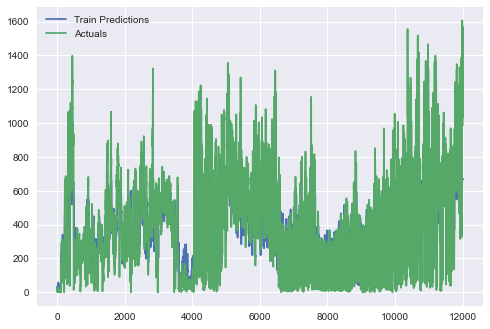

In [23]:
model = load_model('6H_Forecast/6H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(6,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)